![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## **ENTREGABLE 01:** Data Preparation - BMW Pricing
## **INTEGRANTES DEL GRUPO:** Lluís Miarnau, Ariadna Rubió, Sergio Vásquez y David Larré

____

## **INTRODUCCIÓN**
El objetivo general del entregable es desarrollar un modelo capaz de predecir el precio de vehículos de la marca BMW a partir de sus características. Sin embargo, en este primer entregable **no será necesario realizar la predicción**. <br><br>
El foco estará únicamente en la fase de data cleaning y data preprocessing del dataset proporcionado.<br><br>
Deberéis aplicar correctamente todos los conceptos y técnicas explicadas en clase, el resultado deberá ser un dataset limpio y preparado, listo para ser utilizado en una fase posterior de modelado.

## **COLUMNAS**

 Columna                          | Descripción |
|----------------------------------|-------------|
| **marca**                        | Marca del vehículo (en este caso, `BMW` o vacíos). |
| **modelo**                       | Modelo específico del coche (por ejemplo, `118`, `M4`, `320`...). |
| **km**                           | Kilómetros recorridos por el vehículo (indicador del uso). |
| **potencia**                     | Potencia del motor. |
| **fecha_registro**               | Fecha en que se matriculó por primera vez el coche. |
| **tipo_gasolina**                | Tipo de combustible que utiliza el vehículo (`diesel`, `petrol`, etc.). |
| **color**                        | Color del coche (`black`, `white`, etc.). |
| **tipo_coche**                   | Tipo de carrocería (`convertible`, `coupe`, etc.). |
| **volante_regulable**            | Indica si el coche tiene volante ajustable (`True` / `False`). |
| **aire_acondicionado**           | Indica si el coche tiene aire acondicionado (`True` / `False`). |
| **camara_trasera**               | Indica si el coche tiene cámara de marcha atrás (`True` / `False`). |
| **asientos_traseros_plegables**  | Indica si los asientos traseros pueden plegarse (`True` / `False`). |
| **elevalunas_electrico**         | Indica si los elevalunas son eléctricos (`True` / `False`). |
| **bluetooth**                    | Indica si el vehículo dispone de conexión Bluetooth (`True` / `False`). |
| **gps**                          | Indica si el vehículo incluye sistema de navegación GPS (`True` / `False`). |
| **alerta_lim_velocidad**         | Indica si tiene alerta de límite de velocidad (`True` / `False`). |
| **precio**                       | Precio de venta en euros (€). Es la variable objetivo (**target**). |
| **fecha_venta**                  | Fecha en la que se vendió el coche. |

## **00 - IMPORTACIÓN DE LIBRERÍAS**

Hacemos la importación de las librerías pandas, numpy, matplotlib.pyplot, plotly,graph_objects, seaborn, sklearn y warnings.

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

print('Librerías importadas correctamente')

Librerías importadas correctamente


## **01 - IMPORTACIÓN DE DATOS**


 Importamos los datos, realizamos una copia para guardar una versión original de los datos y mostramos el número de filas y columnas.

In [2]:
# Importación de los datos
bmw = pd.read_csv('/Users/davidlarre/Desktop/PROYECTOS/M10 - ENTREGABLES/ENTREGABLE 1/data/bmw_pricing.csv')
df_bmw = bmw.copy()

# Visualización del numero de filas y columnas del DataFrame
print(f'Hay {df_bmw.shape[0]} filas y {df_bmw.shape[1]} columnas') 

Hay 4843 filas y 18 columnas


## **02 - EDA**

*Con las siguientes funciones hemos analizado el dataset y hemos podido observar:*

1. Se trata de un *conjunto de datos de ventas* correspondiente al año **2018**, abarcando desde **enero hasta septiembre** (ambos incluidos), de vehículos de la marca **BMW**.

2. El dataset cuenta con **18 columnas**, de las cuales:  
   - **1** es de tipo *booleano*  
   - **3** son datos *numéricos*  
   - **14** son datos *categóricos*<br><br>

3. Contiene un total de **4843 registros**, sin que haya **ningún duplicado**.

4. De las 18 columnas, **17 presentan valores nulos**, aunque en **9 de ellas** estos valores faltantes no superan el **1%** del total de registros.  
   Por ello, **optamos por aplicar un doble enfoque para tratar los valores nulos**:
   - En las columnas con menos del **1%** de valores nulos, eliminaremos directamente las filas incompletas.
   - En las columnas con un porcentaje de nulos **igual o superior al 1%**, implementaremos técnicas de **imputación** para conservar la máxima información y enriquecer el análisis.

In [3]:
# Visualización general de la estructura del DataFrame
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [4]:
# Exploración preliminar de los primeros registros del DataFrame
df_bmw.head(10)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
6,BMW,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
7,BMW,118,115560.0,105.0,2009-08-01,petrol,white,convertible,True,True,False,NaN,False,True,True,False,6100.0,2018-02-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
9,BMW,320,139541.0,135.0,NaN,diesel,white,convertible,False,False,False,NaN,True,False,True,False,17300.0,2018-03-01


In [5]:
# Mostramos los estadísticos descriptivos básicos para las variables numéricas
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


**Observaciones sobre las Variables Numéricas**

- **`km`**:  
  Se ha detectado un **valor mínimo negativo**, lo que indica un posible error en el registro de datos. Aunque la cantidad de valores nulos es baja, tanto el **valor mínimo como el máximo** presentan valores atípicos que requieren una revisión más exhaustiva.

- **`potencia`**:  
  El **valor mínimo registrado es 0**, situación poco realista para un vehículo, lo que sugiere errores o codificación incorrecta en los datos. A pesar de que los **valores nulos son casi inexistentes**, existen otros aspectos que deben considerarse durante la limpieza.

- **`precio`**:  
  Al ser la variable objetivo (*target*) del ejercicio, **no se aplicarán modificaciones** sobre ella para preservar la integridad y validez del modelo predictivo.

In [6]:
# Listado de los nombres de todas las columnas presentes en el DataFrame
print("Columnas :", df_bmw.columns.tolist())

Columnas : ['marca', 'modelo', 'km', 'potencia', 'fecha_registro', 'tipo_gasolina', 'color', 'tipo_coche', 'volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad', 'precio', 'fecha_venta']


In [7]:
# Conteo de filas duplicadas en el DataFrame
print("Duplicados:", df_bmw.duplicated().sum(), "valores duplicados")

Duplicados: 0 valores duplicados


In [8]:
# Función para analizar la presencia de valores nulos en el DataFrame, el resultado se ordena de mayor a menor porcentaje de nulos

def tabla_nulos(dataset):
    nulos = dataset.isnull().sum()
    porcentaje = (dataset.isnull().mean() * 100).round(2)
    unicos = dataset.nunique()
    
    df_nulos = pd.DataFrame({
        'NULOS': nulos,
        '% NULOS': porcentaje,
        'VALORES UNICOS': unicos
        }).sort_values(by='% NULOS', ascending=False)
    return df_nulos
    
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3391,70.02,2
fecha_registro,2423,50.03,180
tipo_coche,1460,30.15,8
marca,970,20.03,1
alerta_lim_velocidad,728,15.03,2
bluetooth,728,15.03,2
aire_acondicionado,486,10.04,2
color,445,9.19,10
precio,6,0.12,437
tipo_gasolina,5,0.10,5


**Primeras impresiones y comentarios sobre la Estrategia de Tratamiento de Nulos basada en el EDA**

A continuación, se presentan las observaciones y las acciones propuestas para el manejo de valores nulos en las diferentes columnas del dataset, derivadas del análisis exploratorio inicial (EDA). La estrategia se fundamenta en criterios de completitud, relevancia de la variable, posibilidad de imputación fiable y su impacto en el análisis final.

- **`marca`**:  
  Aunque inicialmente solo aparece un valor registrado, existen **970 registros con valores nulos en esta columna**. Se analizará si el campo `modelo` coincide con registros donde `marca`no está presente, para permitir una **imputación más precisa** y minimizar la pérdida de información.

- **`modelo`**:  
  Con tan solo **3 valores nulos** frente a **76 valores únicos**, se opta por **eliminar directamente los registros incompletos**, dado que el impacto es mínimo y esta variable es clave para el análisis.

- **`km`**:  
  La proporción de nulos es baja, pero dado que es una variable sensible, imputar con la media podría inducir **distorsiones significativas**. Por tanto, se recomienda **no imputar y descartar dichos registros**.

- **`potencia`**:  
  Con tan solo **1 valor nulo** frente a **61 valores únicos**, se opta por **eliminar directamente el registro incompleto**, dado que el impacto es mínimo y esta variable es clave para el análisis.

- **`tipo_gasolina`**:  
  Con tan solo **5 valores nulos** frente a **5 valores únicos**, antes de eliminar directamente los registros incompletos, analizaremos la importancia de esta variable en el modelo para decidir si es preferible imputar los valores ausentes o descartarlos.

- **`color`**:  
  Al no poder inferirse con certeza, se plantea realizar una **categorización basada en la moda porcentual**.

- **`tipo_coche`**:  
  Requiere un análisis más detallado para determinar si puede inferirse desde otras variables o, de no ser posible, contemplar su exclusión en los casos nulos.

- **`volante_regulable`, `aire_acondicionado`, `camara_trasera`, `elevalunas_electrico`**:  
  Podríamos imputar estas variables de equipamiento por moda según el modelo o tipo de coche, siempre que exista un patrón claro. Sin embargo, antes de decidir la imputación, es importante analizar el porcentaje de nulos en cada variable y su relevancia en el análisis, para valorar si conviene imputar los valores ausentes o eliminar directamente los registros incompletos.

- **`asientos_plegables`**:  
  Posiblemente sea una característica limitada a pocos modelos. Se recomienda analizar su distribución por `modelo` antes de tomar una decisión.

- **`bluetooth` y `alerta_lim_velocidad`**:  
  Presentan un número idéntico de valores nulos, lo que sugiere una posible relación. Se sugiere analizarlas en conjunto para determinar si existe una lógica común en su ausencia..

## **03 - DUPLICADOS**

En este dataset no se encontraron registros duplicados, pero hemos implementado un sistema de seguridad (*failsafe*) para detectarlos y tratarlos si aparecieran. Esto nos permite estandarizar esta fase de limpieza y aplicar el mismo procedimiento en futuros proyectos del cliente, donde sí podrían existir duplicados.

La lógica que utilizamos compara filas completas para identificar duplicados exactos y, si se detectan, se eliminan dejando una sola ocurrencia de cada registro repetido.

Además, este método está diseñado para adaptarse fácilmente en caso de que en el futuro se necesite detectar duplicados parciales o basados en columnas específicas, lo que aporta flexibilidad al proceso.

In [9]:
# Función para eliminar duplicados en futuros nuevos DataFrames 

def eliminar_duplicados(df):
    duplicados_iniciales = df.duplicated().sum()

    if duplicados_iniciales == 0:
        print("No se encontraron duplicados.")
        return df
    else:
        print(f"Se eliminaron {duplicados_iniciales} registros duplicados.")
        df_limpio = df.drop_duplicates(keep='first').reset_index(drop=True)
        return df_limpio

In [10]:
# Ejecuta la función para eliminar filas duplicadas del DataFrame
eliminar_duplicados(df_bmw)

No se encontraron duplicados.


,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


## **04 - PREPROCESAMIENTO**

### **4.1 - TRANSFORMACIÓN DE TIPO DE DATOS**

En esta sección hemos listado los tipos de datos (*dtypes*) de las variables y detectado que las variables temporales estaban en formato `object`, por lo que las hemos transformado al tipo de dato `datetime`. También hemos identificado que las columnas relacionadas con el equipamiento estaban en formato `object`, los valores de las columnas son `True` o `False`, asi que hemos decidido convertirlas a tipo `boolean`.

Cabe destacar que la variable `gps` ya estaba originalmente en formato `bool`, pero para unificar todos los formatos de variables booleanas, también la hemos transformado a tipo `boolean`. La elección de `boolean` (en lugar de `bool`) se debe a que este tipo permite mantener los valores nulos (`NaN`) sin convertirlos automáticamente en `True`.

In [11]:
# Comprobamos el tipo de datos de cada columna
df_bmw.dtypes

marca                           object
modelo                          object
km                             float64
potencia                       float64
fecha_registro                  object
tipo_gasolina                   object
color                           object
tipo_coche                      object
volante_regulable               object
aire_acondicionado              object
camara_trasera                  object
asientos_traseros_plegables     object
elevalunas_electrico            object
bluetooth                       object
gps                               bool
alerta_lim_velocidad            object
precio                         float64
fecha_venta                     object
dtype: object

In [12]:
# Se modifica el dtype de las columnas 'fecha_registro' y 'fecha_venta' a datetime
for i in ['fecha_registro','fecha_venta']:
    df_bmw[i]=pd.to_datetime(df_bmw[i])
    
# Comprobamos el cambio de dtype.
print(df_bmw[['fecha_registro','fecha_venta']].dtypes)

fecha_registro    datetime64[ns]
fecha_venta       datetime64[ns]
dtype: object


In [13]:
# Convertimos columnas categóricas a tipo boolean
columnas_a_convertir = ['volante_regulable', 'aire_acondicionado','camara_trasera','asientos_traseros_plegables','elevalunas_electrico','bluetooth','alerta_lim_velocidad','gps']
df_bmw[columnas_a_convertir] = df_bmw[columnas_a_convertir].astype('boolean')

# Comprobamos el cambio de dtype
print(df_bmw[columnas_a_convertir].dtypes)

volante_regulable              boolean
aire_acondicionado             boolean
camara_trasera                 boolean
asientos_traseros_plegables    boolean
elevalunas_electrico           boolean
bluetooth                      boolean
alerta_lim_velocidad           boolean
gps                            boolean
dtype: object


### **4.2 - LIBRERIA DE FUNCIONES**

**DICCIONARIO_DISTRIBUCIONES**

Esta función recibe un dataset y devuelve un diccionario donde cada clave es el nombre de una columna, y su valor asociado es la distribución porcentual de todos los valores únicos presentes en esa columna. Incluye también los valores nulos (*NaN*), lo que nos permite analizar cómo se distribuyen los datos en cada variable, facilitando la comprensión del comportamiento de las categorías y la identificación de posibles desequilibrios o valores atípicos.

In [14]:
# Creamos una función que devuelve el diccionario 'distribuciones' con el porcentaje de distribución de los valores de cada columna respecto al total

def diccionario_distribuciones(dataset):
    distribuciones = {} 
    for i in dataset:
        distribuciones[i] = dataset[i].value_counts(normalize=True, dropna=False)
    return distribuciones

distribuciones = diccionario_distribuciones(df_bmw)

**COMPROBAR_COLUMNA_ELIMINADA**

Esta función recibe un DataFrame y el nombre de una columna para verificar si dicha columna ha sido eliminada del dataset. Comprueba si el nombre de la columna no está presente en el listado de columnas del DataFrame y muestra un mensaje indicando si la columna fue eliminada correctamente o si aún permanece en el conjunto de datos.

In [15]:
def comprobar_columna_eliminada(df, columna):
    if columna not in df.columns:
        print(f"La columna '{columna}' ha sido eliminada correctamente.")
    else:
        print(f"La columna '{columna}' todavía está en el DataFrame.")

**ELIMINA_NULOS**

Se define una función que elimina filas en aquellas columnas donde el porcentaje de nulos sea inferior a un umbral definido (en %). Esta estrategia permite descartar filas con pocos valores faltantes, minimizando la pérdida de información.

In [16]:
# Función para eliminar las filas que contienen valores nulos en columnas cuyo porcentaje de nulos es menor que el umbral indicado.

def elimina_nulos(dataset, umbral):
    lista_nulos = tabla_nulos(dataset)
    for i in lista_nulos.index:
        if lista_nulos['% NULOS'][i] < umbral:
            dataset.dropna(subset=[i], inplace=True)
    return dataset

### **4.3 - FEATURE ENGINEERING**

Añadimos una nueva columna haciendo referencia a la cantidad de equipamiento extra que tiene cada vehículo, realizando la suma de los valores `True`en las columnas (`volante_regulable`, `aire_acondicionado`, `camara_trasera`, `asientos_traseros_plegables`, `elevalunas_electrico`, `bluetooth`, `gps`, `alerta_lim_velocidad`)

In [17]:
# Creamos la columna 'cantidad_extras' para identificar cuantos extras tiene cada coche
df_bmw['cantidad_extras'] = df_bmw[['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'asientos_traseros_plegables', 'elevalunas_electrico', 'bluetooth', 'gps', 'alerta_lim_velocidad']].sum(axis=1)

# Ha creado la columna 'cantidad_extras' como un objecto, por lo que la convertimos a int
df_bmw['cantidad_extras'] = df_bmw['cantidad_extras'].astype(int)

# Comprobamos que se ha creado correctamente
df_bmw[columnas_a_convertir + ['cantidad_extras']].head(10)

,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,gps,cantidad_extras
0,True,True,False,<NA>,True,<NA>,<NA>,True,4
1,True,True,False,<NA>,False,True,True,True,5
2,False,False,False,<NA>,True,False,False,True,2
3,True,True,False,<NA>,True,True,<NA>,True,5
4,True,True,False,False,False,True,True,True,5
5,True,True,False,False,True,True,True,True,6
6,True,True,False,<NA>,True,True,True,True,6
7,True,True,False,<NA>,False,True,False,True,4
8,True,False,False,False,False,<NA>,False,True,2
9,False,False,False,<NA>,True,False,False,True,2


Una vez transformados los campos a datetime, se crearon nuevas columnas derivadas a partir de las fechas, tales como:

- **Año**, **mes** o **día** de una fecha relevante (por ejemplo, fecha de matriculación).
- **Edad del vehículo** (calculada como la diferencia entre la fecha de análisis y la fecha de registro).

Estas transformaciones permiten mejorar la capacidad explicativa de las variables temporales y facilitar su uso en etapas posteriores de modelado.

**NOTA:** En el código de limpieza utilizamos la variable 'year' en lugar de 'año'. Esta decisión se tomó para evitar posibles problemas relacionados con el uso de caracteres especiales (como la "ñ") que podrían generar errores al ejecutar el código en diferentes entornos.

In [18]:
# Consideramos que las fechas completas no aportan información relevante, por lo que vamos a crear nuevas columnas solo con el año
df_bmw['year_registro'] = df_bmw['fecha_registro'].dt.year
df_bmw['year_venta'] = df_bmw['fecha_venta'].dt.year

# Creamos una columna para identificar los años de antigüedad del coche
df_bmw['edad_coche'] = df_bmw['year_venta'] - df_bmw['year_registro']

# Comprobamos que se han creado correctamente
df_bmw[['year_registro','year_venta','edad_coche']].head(10)

,year_registro,year_venta,edad_coche
0,2012.0,2018.0,6.0
1,NaN,2018.0,NaN
2,2012.0,2018.0,6.0
3,NaN,2018.0,NaN
4,NaN,2018.0,NaN
5,2011.0,2018.0,7.0
6,NaN,2018.0,NaN
7,2009.0,2018.0,9.0
8,NaN,2018.0,NaN
9,NaN,2018.0,NaN


In [19]:
# Creamos una columna para identificar el mes de registro del coche
df_bmw['mes_registro'] = df_bmw['fecha_registro'].dt.month
# Creamos una columna para identificar el mes de venta del coche
df_bmw['mes_venta'] = df_bmw['fecha_venta'].dt.month
# Creamos una columna para identifiar el dia de registro del coche
df_bmw['dia_registro'] = df_bmw['fecha_registro'].dt.day
# Creamos una columna para identificar el dia de venta del coche
df_bmw['dia_venta'] = df_bmw['fecha_venta'].dt.day

### **4.4 - COPIA DEL DATAFRAME PARA ANÁLISIS COMPARATIVO**

Como parte del análisis, se genera una copia del DataFrame original antes de aplicar cualquier imputación de valores nulos. Esta copia nos permite comparar las distribuciones de las variables antes y después del tratamiento, asegurando que las imputaciones no introduzcan sesgos ni alteren significativamente el comportamiento original de los datos.

In [20]:
# Backup del DataFrame original para análisis comparativo previo/posterior a la imputación de valores nulos
df_antes = df_bmw.copy()

### **4.5 - ELMINACIÓN DE FILAS Y COLUMNAS**

En esta sección se lleva a cabo la depuración del dataset mediante la eliminación de registros inconsistentes y variables que no aportan valor informativo al modelo. La limpieza se basa en criterios de coherencia, relevancia y variabilidad.

#### **ELIMINACIÓN DE FILAS**

**FILAS FECHAS INCOHERENTES**

Como parte del proceso de limpieza, hemos revisado las columnas de tipo fecha para identificar posibles inconsistencias temporales, como registros con una fecha de registro posterior a la de venta.
Este control garantiza la coherencia cronológica de los datos y previene errores que puedan afectar al análisis o al modelo predictivo.

In [21]:
# Estadísticas descriptivas del DataFrame
df_bmw.describe()

,km,potencia,fecha_registro,precio,fecha_venta,cantidad_extras,year_registro,year_venta,edad_coche,mes_registro,mes_venta,dia_registro,dia_venta
count,4.841000e+03,4842.000000,2420,4837.000000,4842,4843.000000,2420.000000,4842.000000,2420.000000,2420.000000,4842.000000,2420.0,4842.0
mean,1.409593e+05,128.981826,2012-12-06 07:35:12.396694016,15831.920612,2018-04-26 11:45:07.806691584,3.589717,2012.507438,2017.992152,5.485124,6.101653,4.927096,1.0,1.0
min,-6.400000e+01,0.000000,1990-03-01 00:00:00,100.000000,2007-08-01 00:00:00,0.000000,1990.000000,2007.000000,-5.000000,1.000000,1.000000,1.0,1.0
25%,1.028840e+05,100.000000,2012-07-01 00:00:00,10800.000000,2018-03-01 00:00:00,2.000000,2012.000000,2018.000000,4.000000,3.000000,3.000000,1.0,1.0
50%,1.410800e+05,120.000000,2013-07-01 00:00:00,14200.000000,2018-05-01 00:00:00,4.000000,2013.000000,2018.000000,5.000000,6.000000,5.000000,1.0,1.0
75%,1.752170e+05,135.000000,2014-04-01 00:00:00,18600.000000,2018-07-01 00:00:00,5.000000,2014.000000,2018.000000,6.000000,9.000000,7.000000,1.0,1.0
max,1.000376e+06,423.000000,2017-11-01 00:00:00,178500.000000,2018-09-01 00:00:00,8.000000,2017.000000,2018.000000,28.000000,12.000000,9.000000,1.0,1.0
std,6.020853e+04,38.994839,NaN,9222.630708,NaN,1.717428,2.497362,0.274850,2.509714,3.340965,2.157660,0.0,0.0


In [22]:
# Comprobamos si hay registros donde la fecha de registro es posterior a la fecha de venta
df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,precio,fecha_venta,cantidad_extras,year_registro,year_venta,edad_coche,mes_registro,mes_venta,dia_registro,dia_venta
100,BMW,320,342768.0,135.0,2011-12-01,diesel,black,NaN,False,True,...,8200.0,2010-04-01,3,2011.0,2010.0,-1.0,12.0,4.0,1.0,1.0
256,BMW,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,<NA>,...,8800.0,2008-06-01,2,2013.0,2008.0,-5.0,12.0,6.0,1.0,1.0


In [23]:
# Eliminamos las filas donde la fecha de registro es posterior a la fecha de venta
indice_fechas = df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']].index
df_bmw = df_bmw.drop(index=indice_fechas)

# Comprobamos que se han eliminado correctamente las filas con fecha de registro posterior a la fecha de venta
df_bmw[df_bmw['fecha_registro'] > df_bmw['fecha_venta']]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,...,precio,fecha_venta,cantidad_extras,year_registro,year_venta,edad_coche,mes_registro,mes_venta,dia_registro,dia_venta


#### **ELIMINACIÓN DE COLUMNAS**

**VARIABLES CON BAJA VARIABILIDAD**

Se analizan las distribuciones para detectar columnas con más del 90% del mismo valor, lo que indica que no aportan información diferenciadora.

In [24]:
# Hacemos un print para mostrar las distribuciones que tienen más del 90% de un mismo valor respecto al total, para valorar si eliminarlas
for i in distribuciones:
    if (distribuciones[i] > 0.9).any():
        print(distribuciones[i][distribuciones[i] > 0.9],"\n")

tipo_gasolina
diesel    0.956225
Name: proportion, dtype: float64 

gps
True    0.932067
Name: proportion, dtype: Float64 



**COLUMNAS TEMPORALES SIN INFORMACIÓN RELEVANTE**

Tras revisar las nuevas variables temporales relacionadas con la venta y el registro de los vehículos, concluimos que no aportan información relevante para el modelo. Variables como mes_venta, dia_venta, mes_registro y dia_registro no presentan correlación significativa con el precio ni muestran un patrón útil para el análisis. Algunas de ellas incluso contienen valores arbitrarios o repetitivos que no reflejan un comportamiento real.

Por ello, se confirma su eliminación del conjunto de datos con el objetivo de reducir ruido y mejorar la calidad del modelo predictivo.

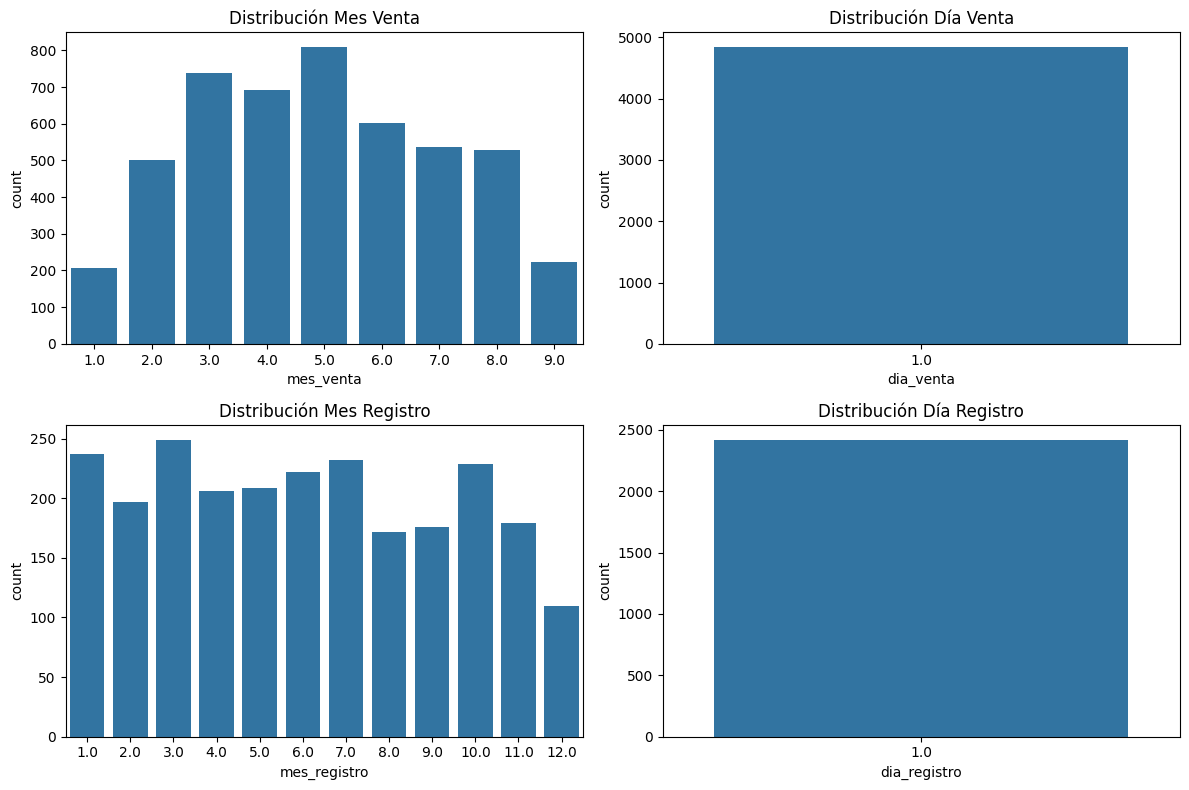

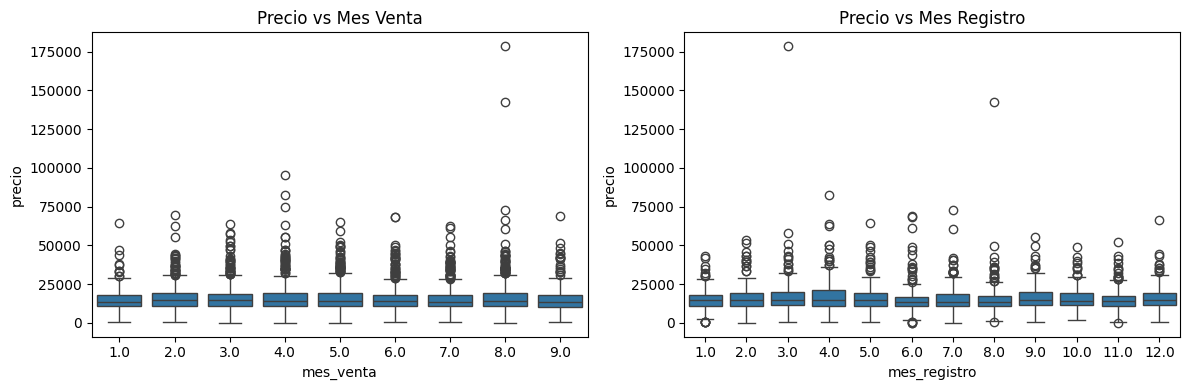

In [25]:
# Distribución de los meses y días de venta/registro
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x='mes_venta', data=df_bmw, ax=axes[0,0])
axes[0,0].set_title('Distribución Mes Venta')
sns.countplot(x='dia_venta', data=df_bmw, ax=axes[0,1])
axes[0,1].set_title('Distribución Día Venta')
sns.countplot(x='mes_registro', data=df_bmw, ax=axes[1,0])
axes[1,0].set_title('Distribución Mes Registro')
sns.countplot(x='dia_registro', data=df_bmw, ax=axes[1,1])
axes[1,1].set_title('Distribución Día Registro')
plt.tight_layout()
plt.show()

# Boxplot para ver si hay diferencias de precio según mes/día
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x='mes_venta', y='precio', data=df_bmw, ax=axes[0])
axes[0].set_title('Precio vs Mes Venta')
sns.boxplot(x='mes_registro', y='precio', data=df_bmw, ax=axes[1])
axes[1].set_title('Precio vs Mes Registro')
plt.tight_layout()
plt.show()

In [26]:
# Eliminamos las columnas 'mes_registro', 'mes_venta', 'dia_registro' y 'dia_venta', no aportan información relevante
df_bmw.drop(columns=['mes_registro', 'mes_venta', 'dia_registro', 'dia_venta'], inplace=True)
# Comprobamos que las columnas se han eliminado correctamente
columnas_eliminadas = ['mes_registro', 'mes_venta', 'dia_registro', 'dia_venta']
for col in columnas_eliminadas:
    comprobar_columna_eliminada(df_bmw, col)

La columna 'mes_registro' ha sido eliminada correctamente.
La columna 'mes_venta' ha sido eliminada correctamente.
La columna 'dia_registro' ha sido eliminada correctamente.
La columna 'dia_venta' ha sido eliminada correctamente.


In [27]:
# Eliminamos las siguientes columnas temporales, la nueva variable 'edad_coche' las resume de forma más eficiente
df_bmw.drop(columns=['fecha_registro','fecha_venta','year_registro','year_venta'], inplace=True)

# Comprobamos que se han eliminado correctamente
columnas_eliminadas = ['mes_registro', 'mes_venta', 'dia_registro', 'dia_venta']
for col in columnas_eliminadas:
    comprobar_columna_eliminada(df_bmw, col)

La columna 'mes_registro' ha sido eliminada correctamente.
La columna 'mes_venta' ha sido eliminada correctamente.
La columna 'dia_registro' ha sido eliminada correctamente.
La columna 'dia_venta' ha sido eliminada correctamente.


**COLUMNA TIPO_GASOLINA CON BAJA VARIABILIDAD**

Durante el análisis exploratorio, se observó que la columna `tipo_gasolina` presenta únicamente **5 valores nulos** sobre un total de **4.843 registros** (aproximadamente un **0,10%**), lo que no supone un problema relevante en términos de completitud.

Sin embargo, se detectó un **error tipográfico** en la codificación del tipo de combustible (`Diésel`), y al analizar su distribución, se comprobó que cerca del **96% de los vehículos utilizan diésel**, lo que evidencia una **baja variabilidad** en esta variable.

Dado que la información contenida en esta columna es **poco discriminativa** y su presencia podría introducir **sesgos en el modelo**, se concluye que **no aporta valor predictivo significativo**. Por ello, se decide eliminarla del dataset para reducir el ruido y mejorar la eficiencia del modelo.

In [28]:
# Revisamos la distribución de valores en la columna 'tipo_gasolina'
distribuciones['tipo_gasolina']

tipo_gasolina
diesel           0.956225
petrol           0.039438
hybrid_petrol    0.001652
NaN              0.001032
Diesel           0.001032
electro          0.000619
Name: proportion, dtype: float64

In [29]:
# Eliminamos la columna 'tipo_gasolina' debido a su baja variabilidad
df_bmw.drop(columns='tipo_gasolina', inplace= True)

# Verificamos que la columna ha sido eliminada correctamente
comprobar_columna_eliminada(df_bmw, 'tipo_gasolina')

La columna 'tipo_gasolina' ha sido eliminada correctamente.


**COLUMNA GPS CON BAJA VARIABILIDAD**

Durante el análisis exploratorio, se observó que la columna `gps` contiene un **93% de valores True**, lo que indica una **alta concentración en una sola categoría** y, por ende, una baja variabilidad.

Dado que esta característica aporta poca información discriminativa para la predicción del precio y podría afectar negativamente la generalización del modelo, se decidió eliminar esta columna para optimizar la calidad del dataset y evitar ruido innecesario.

In [30]:
# Revisamos la distribución de valores en la columna 'gps'
distribuciones['gps']

gps
True     0.932067
False    0.067933
Name: proportion, dtype: Float64

In [31]:
# Eliminamos la columna 'gps' por su baja variabilidad
df_bmw.drop(columns='gps', inplace= True)

# Verificamos que la columna ha sido eliminada correctamente
comprobar_columna_eliminada(df_bmw, 'gps')

La columna 'gps' ha sido eliminada correctamente.


## **05 - TRATAMIENTO DE NULOS**

**Estrategia para el Procesamiento de Valores Nulos**

En este trabajo de limpieza de datos, se definió una estrategia clara para el manejo de valores nulos, con el objetivo de preservar la calidad del análisis y facilitar la reutilización del dataset en futuros proyectos para el mismo cliente.

Se aplicó un **doble criterio** según el porcentaje de nulos en cada columna:

- **Porcentaje de nulos < 1%:** Se eliminan las filas con valores faltantes, ya que su impacto es mínimo en el conjunto de datos.
- **Porcentaje de nulos ≥ 1%:** Se emplean técnicas de imputación para preservar la mayor cantidad de información posible y minimizar la pérdida de datos.

Siguiendo esta política, se eliminaron directamente las filas con nulos en las siguientes columnas por tener menos del 1% de valores faltantes:

- `modelo`
- `potencia`
- `km`
- `elevalunas_electrico`
- `camara_trasera`
- `volante_regulable`

De forma consistente, también se eliminaron las 6 observaciones con valores nulos en la **variable target `precio`**, asegurando la integridad para el modelado posterior.

### **5.1 - GESTIÓN GENERICA DE VALORES NULOS**

**5.1.1 - Visualización Inicial de Valores Nulos**

Primero, revisamos el porcentaje y la distribución de valores nulos en el dataset para conocer la dimensión del problema.

In [32]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3389,70.01,2
edad_coche,2423,50.05,23
tipo_coche,1459,30.14,8
marca,970,20.04,1
bluetooth,728,15.04,2
alerta_lim_velocidad,727,15.02,2
aire_acondicionado,485,10.02,2
color,445,9.19,10
precio,6,0.12,437
volante_regulable,4,0.08,2


**5.1.2 - Aplicación de la Eliminación de Filas con Nulos < 1%**

Se ejecuta la función con un umbral del 1%, eliminando filas con nulos en columnas poco afectadas.

In [33]:
# Ejecutamos la función para eliminar los registros de las columnas que tengan un porcentaje de nulos inferior al 1%
elimina_nulos(df_bmw, 1)

,marca,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,edad_coche
0,NaN,118,140411.0,100.0,black,NaN,True,True,False,<NA>,True,<NA>,<NA>,11300.0,4,6.0
1,BMW,M4,13929.0,317.0,grey,convertible,True,True,False,<NA>,False,True,True,69700.0,5,NaN
2,BMW,320,183297.0,120.0,white,NaN,False,False,False,<NA>,True,False,False,10200.0,2,6.0
3,BMW,420,128035.0,135.0,red,convertible,True,True,False,<NA>,True,True,<NA>,25100.0,5,NaN
4,BMW,425,97097.0,160.0,silver,NaN,True,True,False,False,False,True,True,33400.0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,black,NaN,False,True,False,<NA>,False,False,False,14600.0,2,NaN
4839,BMW,218 Active Tourer,49832.0,100.0,grey,NaN,False,True,False,<NA>,False,False,True,17500.0,3,3.0
4840,BMW,218 Gran Tourer,19633.0,110.0,grey,van,False,True,False,<NA>,False,False,True,17000.0,3,3.0
4841,BMW,218 Active Tourer,27920.0,110.0,brown,van,True,True,False,False,False,False,True,22700.0,4,2.0


In [34]:
# Verificamos que se han eliminado los registros de las columnas con menos del 1% de nulos
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,3376,70.03,2
edad_coche,2412,50.03,23
tipo_coche,1451,30.10,8
marca,966,20.04,1
bluetooth,725,15.04,2
alerta_lim_velocidad,724,15.02,2
aire_acondicionado,482,10.00,2
color,442,9.17,10
modelo,0,0.00,76
km,0,0.00,4764


In [35]:
# Recalculamos las distribuciones de las variables tras la eliminación de nulos.
distribuciones = diccionario_distribuciones(df_bmw)

**5.1.3 - Análisis de Filas con Alta Cantidad de Valores Nulos**

Calculamos el número de nulos por fila para identificar registros con muchos valores faltantes, que podrían comprometer la calidad del análisis o imputación.

In [36]:
# Calculamos el número de valores nulos por fila para identificar registros con múltiples ausencias.
num_nulos = df_bmw.isnull().sum(axis=1)
num_nulos.value_counts()

2    1728
3    1260
1    1048
4     450
0     238
5      88
6       9
Name: count, dtype: int64

Se identifican filas con 6 o más valores nulos:

In [37]:
# Identificamos las filas que contienen más de 5 valores nulos, podrían afectar negativamente la calidad del análisis.
filas_mas_nulos = df_bmw[num_nulos == 6]
filas_mas_nulos.head()

,marca,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,edad_coche
18,NaN,325,205474.0,145.0,NaN,NaN,True,True,False,<NA>,True,<NA>,<NA>,11000.0,4,9.0
134,NaN,320,91931.0,135.0,NaN,NaN,False,False,False,<NA>,True,<NA>,False,12500.0,2,NaN
1043,BMW,520,172414.0,120.0,NaN,NaN,True,True,False,<NA>,False,<NA>,<NA>,15400.0,3,NaN
1131,NaN,320,293508.0,110.0,NaN,estate,True,<NA>,False,<NA>,True,<NA>,False,3000.0,3,NaN
1759,NaN,116,110087.0,85.0,black,NaN,True,True,False,<NA>,False,<NA>,<NA>,10000.0,3,NaN


**5.1.4 - Eliminación de Filas con Alta Proporción de Valores Nulos**

Dado que imputar tantas variables en una sola fila puede introducir sesgos y complejidad, se opta por eliminar estas filas.

In [38]:
# Como tendremos que imputar 6 variables en una misma fila, decidimos eliminarla
df_bmw = df_bmw.drop(index=filas_mas_nulos.index)

### **5.2 - MARCA**

**REVISIÓN Y ELIMINACIÓN DE LA COLUMNA MARCA**

Aunque el nombre del archivo (bmw_pricing) sugiere que todos los registros pertenecen a vehículos BMW, no se debe asumir esto directamente sin validación. En un flujo de trabajo reproducible y escalable, todas las decisiones deben basarse en la evidencia interna del dataset y no en supuestos externos como el nombre del archivo.

**Detección y análisis de valores nulos en marca:**

Se identificaron registros con valores nulos en la columna marca. Para abordarlos de manera automatizada y confiable, hemos implementado el siguiente procedimiento:

1. Extraemos todos los modelos únicos con marca conocida.
2. Aislamos los registros donde la columna marca es nula.
3. Comparamos los modelos de registros nulos con los modelos de registros completos para verificar coincidencias.
4. Los modelos sin correspondencia en registros completos se consideran no imputables y los eliminamos.


In [39]:
# Filtramos los registros donde la columna 'marca' no es nula 
modelos_nonulos = df_bmw[df_bmw['marca'].notna()]

# Filtramos los registros donde la columna 'marca' es nula
modelos_nulos = df_bmw[df_bmw['marca'].isna()]

# Identificamos modelos con marca nula que NO aparecen en registros con marca no nula
modelos_a_comprobar = modelos_nulos[~modelos_nulos['modelo'].isin(modelos_nonulos['modelo'])]

# Visualizamos los modelos problemáticos
modelos_a_comprobar

,marca,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,edad_coche
57,NaN,M235,34082.0,240.0,grey,coupe,False,True,True,False,True,True,<NA>,30200.0,5,NaN
84,NaN,M235,69736.0,240.0,grey,NaN,True,True,True,False,True,True,False,30000.0,6,NaN
102,NaN,M235,37619.0,240.0,black,NaN,True,False,False,<NA>,True,True,True,27700.0,5,NaN
107,NaN,630,149943.0,190.0,black,coupe,True,True,True,False,True,True,True,10500.0,7,NaN
4804,NaN,220 Active Tourer,153358.0,140.0,grey,van,False,<NA>,False,<NA>,False,False,True,11700.0,2,3.0
4825,NaN,225 Active Tourer,33300.0,170.0,NaN,van,True,True,False,<NA>,False,False,True,19200.0,3,NaN


In [40]:
# Tenemos 6 registros que no hemos podido comprobar, vamos a observar los modelos únicos
modelos_a_comprobar['modelo'].unique()

array(['M235', '630', '220 Active Tourer', '225 Active Tourer'],
      dtype=object)

**DECISIÓN: ELIMINACIÓN DE REGISTROS NO IMPUTABLES**

Persisten **6 registros** cuya marca no pudo ser verificada automáticamente. Se opta por eliminarlos, ya que:

•	Representan una proporción insignificante del total (**6 de 4.843**).<br>
•	No es escalable realizar imputaciones manuales en flujos pensados para ser replicables.<br>
•	Su presencia podría afectar la consistencia del análisis.

In [41]:
# Eliminamos las filas con marca nula no imputable de forma automatizada
df_bmw.dropna(subset=["marca"], inplace=True)

**ELIMINACIÓN DE LA COLUMNA MARCA**

Una vez eliminados los registros nulos, todos los valores restantes en la columna marca son iguales a “BMW”. Por lo tanto, esta variable no aporta variabilidad ni valor informativo y se elimina del dataset.

In [42]:
# Eliminamos la columna 'marca' ya que no aporta información relevante
df_bmw.drop(columns='marca',inplace=True)

# Comprobamos que hemos eliminado la columna
comprobar_columna_eliminada(df_bmw, 'marca')

La columna 'marca' ha sido eliminada correctamente.


### **5.3 - TIPO COCHE**

**IMPUTACIÓN DE NULOS EN LA COLUMNA TIPO_COCHE**

La columna tipo_coche presenta valores nulos que es importante imputar para mejorar la calidad del dataset antes del modelado. En este caso, se optó por una imputación basada en la moda (valor más frecuente) utilizando distintos niveles de granularidad combinando variables relevantes.

**Resumen del proceso de imputación**<br>
1.	**Normalización de la columna `modelo`:** <br>
    Detectamos que algunos valores de la columna modelo presentaban un espacio inicial. Se corrigió con .str.strip() para evitar errores de agrupación.<br>
2.	**Generación de tablas auxiliares con la moda:** <br>
Generamos tres tablas auxiliares (df_nulls_1, df_nulls_2, df_nulls_3) con las modas de tipo_coche agrupadas por:<br>
•	modelo + potencia + edad_coche<br>
•	modelo + potencia<br>
•	modelo únicamente<br>
3. **Merges progresivos con el dataset original:** <br>
Realizamos tres merges sucesivos del dataset original con esas tablas, aplicando imputaciones progresivas usando bfill(axis=1).<br>
4. **Relleno de valores nulos mediante imputación escalonada:** <br>
Tras cada merge, eliminaríamos los registros que no pudieron ser imputados con los criterios disponibles hasta ese punto. *(Este paso se detalla en el **comentario adicional** a continuación.)* <br>
5. **Limpieza:**  <br>
Se eliminaron las columnas auxiliares utilizadas para la imputación, dejando el dataset limpio y con los valores de `tipo_coche` ya completados.

6. **Validación de resultados:** <br>
Para comprobar la efectividad del proceso, se generaron dos gráficos que muestran la distribución de los tipos de coche antes y después de la imputación, con el objetivo de validar que la imputación ha enriquecido los datos sin alterar significativamente la distribución original.<br><br>

> **Comentario adicional:**  
>
> Durante este proceso —al igual que con las demás columnas imputadas por moda en niveles progresivos— se consideró la posibilidad de eliminar los registros con nulos restantes en caso de que no pudieran ser imputados tras agotar las combinaciones.  
> En este ejercicio, al tratarse de una práctica centrada en experimentar con técnicas de imputación, se decidió mantener dichos registros.  
> No obstante, en un escenario real orientado a la construcción de un modelo predictivo, se evaluaría si es más conveniente:
> - Reducir el número de pasos de imputación y optar por una estrategia más simple.
> - Eliminar directamente los registros incompletos para evitar introducir ruido o sobreajuste en el modelo.


**Corrección del espacio en blanco en modelo**

In [43]:
# Comprobamos los modelos únicos de la columna 'modelo' 
df_bmw['modelo'].unique()

array(['M4', '320', '420', '425', '335', '325', '118', '120', '220',
       '650', 'Z4', '135', '318', '430', '218', 'M3', '330', '225', '316',
       '435', '640', '640 Gran Coupé', '435 Gran Coupé', 'i8',
       '430 Gran Coupé', '635', '520', '525', '530', '535',
       '320 Gran Turismo', '116', '518', '328', '523', 'X3', 'M550',
       '325 Gran Turismo', '318 Gran Turismo', '125', 'i3',
       '520 Gran Turismo', '420 Gran Coupé', '530 Gran Turismo', '114',
       'M135', '330 Gran Turismo', '418 Gran Coupé', '335 Gran Turismo',
       '730', '123', '535 Gran Turismo', '740', '750', '528',
       'ActiveHybrid 5', '735', 'M5', 'X5', 'X1', 'X4', 'X6', 'X6 M',
       'X5 M', 'X5 M50', '218 Active Tourer', '218 Gran Tourer', '216',
       '216 Gran Tourer', '216 Active Tourer', ' Active Tourer',
       '214 Gran Tourer'], dtype=object)

In [44]:
# Detectamos que hay un modelo con un espacio al inicio (' Active Tourer'), lo corregimos con .strip()
df_bmw['modelo'] = df_bmw['modelo'].str.strip()

**Visualización de nulos y distribución inicial**

In [45]:
# Comprobamos los nulos en la columna 'edad_coche'
tabla_nulos(df_bmw).loc[['tipo_coche']]

,NULOS,% NULOS,VALORES UNICOS
tipo_coche,1155,29.97,8


In [46]:
# Comprobamos la distribución de la columna 'tipo_coche'
distribuciones['tipo_coche']

tipo_coche
NaN            0.300975
estate         0.227961
sedan          0.170297
suv            0.156399
hatchback      0.101224
subcompact     0.015972
coupe          0.015142
convertible    0.006223
van            0.005808
Name: proportion, dtype: float64

**Cálculo de modas y creación de tablas auxiliares**

In [47]:
# 1ª tabla: agrupación por modelo, potencia y edad_coche
COLUMNS_1 = ['modelo', 'potencia', 'edad_coche']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['tipo_coche'])
df_nulls_1.rename(columns={"tipo_coche":"tipo_coche_1"},inplace=True)

# 2ª tabla: agrupación por modelo y potencia
COLUMNS_2 = ['modelo', 'potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['tipo_coche'])
df_nulls_2.rename(columns={"tipo_coche":"tipo_coche_2"},inplace=True)

# 3ª tabla: agrupación solo por modelo
COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['tipo_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['tipo_coche'])
df_nulls_3.rename(columns={"tipo_coche":"tipo_coche_3"},inplace=True)

**Imputación paso a paso y eliminación de registros no imputables**

In [48]:
# Nulos iniciales en 'tipo_coche'
nulos_iniciales = df_bmw['tipo_coche'].isna().sum()
print(f"Nulos iniciales en 'tipo_coche': {nulos_iniciales}")

# MERGE 1: modelo + potencia + edad_coche
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)
df_bmw['tipo_coche'] = df_bmw[['tipo_coche', 'tipo_coche_1']].bfill(axis=1).iloc[:, 0]
nulos_post_1 = df_bmw['tipo_coche'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2: modelo + potencia
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)
df_bmw['tipo_coche'] = df_bmw[['tipo_coche', 'tipo_coche_2']].bfill(axis=1).iloc[:, 0]
nulos_post_2 = df_bmw['tipo_coche'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3: solo modelo
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)
df_bmw['tipo_coche'] = df_bmw[['tipo_coche', 'tipo_coche_3']].bfill(axis=1).iloc[:, 0]
nulos_post_3 = df_bmw['tipo_coche'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# Contamos y los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_3}")
df_bmw = df_bmw[df_bmw['tipo_coche'].notna()]

# Eliminación de columnas temporales utilizadas en imputación
df_bmw.drop(columns=['tipo_coche_1', 'tipo_coche_2', 'tipo_coche_3'], inplace=True)

Nulos iniciales en 'tipo_coche': 1155
Nulos restantes tras merge 1: 644 (16.71%)
Nulos restantes tras merge 2: 21 (0.54%)
Nulos restantes tras merge 3: 1 (0.03%)
Registros eliminados por falta de criterios fiables de imputación: 1


In [49]:
# Verificación final de nulos
tabla_nulos(df_bmw).loc[['tipo_coche']]

,NULOS,% NULOS,VALORES UNICOS
tipo_coche,0,0.0,8


**Visualización: distribución antes y después de la imputación**

In [50]:

# Distribución antes y después de la imputación
antes_counts = df_antes['tipo_coche'].value_counts().sort_index()
despues_counts = df_bmw['tipo_coche'].value_counts().sort_index()

fig = go.Figure()

# Barras antes
fig.add_trace(go.Bar(
    x=[str(i) for i in antes_counts.index],
    y=antes_counts.values,
    marker_color='#373485',
    name='Antes',
    text=antes_counts.values,
    textposition='outside'
))

# Barras después
fig.add_trace(go.Bar(
    x=[str(i) for i in despues_counts.index],
    y=despues_counts.values,
    marker_color='#c52b30',
    name='Después',
    text=despues_counts.values,
    textposition='outside'
))

# Configuración del gráfico
fig.update_layout(
    title="Distribución TIPO COCHE antes y después de la imputación",
    xaxis_title="Tipos de coche",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7'
)

fig.show()

### **5.4 - COLOR** 

**IMPUTACIÓN DE NULOS EN LA COLUMNA COLOR**

En esta columna observamos que, aunque el color está presente en la mayoría de los registros, no aporta información significativa para predecir el precio. Por ello, tras un análisis preliminar, se plantea su simplificación.

**Proceso seguido:**

1. **Análisis inicial de valores nulos y distribución:**  
   Se inspeccionaron los valores nulos de la columna `color` y se analizó su distribución mediante un gráfico de dispersión (*scatter plot*) para evaluar su posible relación con el precio.

2. **Creación de variable simplificada `color_estandar`:**  
   Se creó una nueva variable binaria llamada `color_estandar`, que clasifica los colores en dos grupos:
   - `1` para los colores más comunes: **negro, gris, azul y blanco**.
   - `0` para el resto de los colores.

3. **Imputación de valores nulos en `color_estandar`:**  
   Para imputar los valores nulos, se generó una tabla auxiliar agrupada por combinaciones de variables relevantes (`modelo`, `tipo_coche`, `potencia`) con el objetivo de obtener la moda (valor más frecuente) de `color_estandar`.

4. **Merges y rellenado progresivo:**  
   Se realizaron uniones (`merge`) con el dataframe original para incorporar estas imputaciones. Posteriormente, se aplicó `bfill(axis=1)` para rellenar los valores nulos de izquierda a derecha, utilizando primero las imputaciones más específicas y luego las más generales.

5. **Eliminación de la columna original:**  
   Una vez imputados todos los valores de `color_estandar`, se eliminó la columna original `color`, quedándonos solo con esta nueva variable simplificada.

6. **Validación del proceso:**  
   Se verificó la cantidad de valores nulos tras la imputación y se validó el resultado mediante un gráfico de barras comparativo, que muestra la distribución de `color_estandar` antes y después del tratamiento.del tratamiento.

**Visualización de nulos y distribución inicial**

In [51]:
# Revisamos valores nulos en la columna color
tabla_nulos(df_bmw).loc[['color']]

,NULOS,% NULOS,VALORES UNICOS
color,367,9.53,10


In [52]:
# Visualizamos distribución de color
distribuciones['color']

color
black     0.308857
grey      0.221323
blue      0.133375
white     0.100187
NaN       0.091682
brown     0.062643
silver    0.060361
red       0.009749
beige     0.007675
green     0.002904
orange    0.001245
Name: proportion, dtype: float64

**Simplificación de los valores**

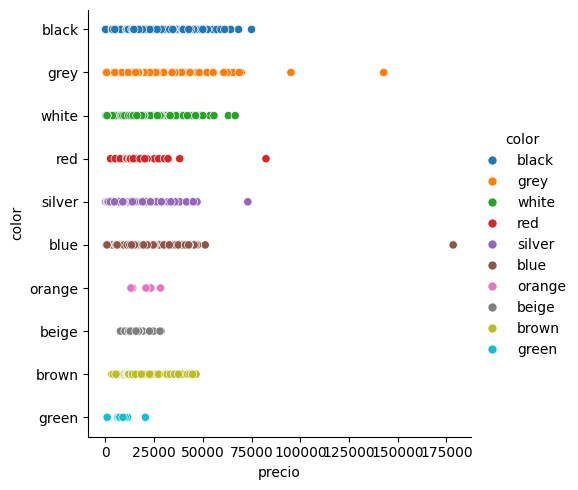

In [53]:
# Visualizamos distribución de colores frente a precio para análisis preliminar
sns.relplot(x="precio", y="color", hue="color", data=bmw)

In [54]:
# Función para crear variable binaria color_estandar

def obtener_color_binario(x):
  if str(x) == 'nan':
    return np.nan
  elif x in ['black','grey','blue','white']:
    return 1
  else:
    return 0

In [55]:
# Aplicamos la función para generar color_estandar en df_bmw y df_antes (dataset para comparación)
df_bmw['color_estandar'] = df_bmw['color'].map(obtener_color_binario)
df_antes['color_estandar'] = df_antes['color'].map(obtener_color_binario)

**Cálculo de modas y creación de tablas auxiliares**

In [56]:
# 1ª tabla: agrupación por modelo, tipo_coche y potencia
COLUMNS_1 = ['modelo', 'tipo_coche', 'potencia']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['color_estandar'])
df_nulls_1.rename(columns={"color_estandar":"color_estandar_1"},inplace=True)

# 2ª tabla: agrupación por modelo y tipo_coche
COLUMNS_2 = ['modelo', 'tipo_coche']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['color_estandar'])
df_nulls_2.rename(columns={"color_estandar":"color_estandar_2"},inplace=True)

# 3ª tabla: agrupación solo por modelo
COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['color_estandar'])
df_nulls_3.rename(columns={"color_estandar":"color_estandar_3"},inplace=True)

# 4ª tabla: agrupación solo por tipo_coche
COLUMNS_4 = ['tipo_coche']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['color_estandar'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['color_estandar'])
df_nulls_4.rename(columns={"color_estandar":"color_estandar_4"},inplace=True)


**Imputación paso a paso y eliminación de registros no imputables**

In [57]:
# Nulos iniciales en 'color_estandar'
nulos_iniciales = df_bmw['color_estandar'].isna().sum()
print(f"Nulos iniciales en 'color_estandar': {nulos_iniciales}")

# MERGE 1: modelo + tipo_coche + potencia
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)
df_bmw['color_estandar'] = df_bmw[['color_estandar', 'color_estandar_1']].bfill(axis=1).iloc[:, 0]
nulos_post_1 = df_bmw['color_estandar'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2: modelo + tipo_coche
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)
df_bmw['color_estandar'] = df_bmw[['color_estandar', 'color_estandar_2']].bfill(axis=1).iloc[:, 0]
nulos_post_2 = df_bmw['color_estandar'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3: modelo 
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)
df_bmw['color_estandar'] = df_bmw[['color_estandar', 'color_estandar_3']].bfill(axis=1).iloc[:, 0]
nulos_post_3 = df_bmw['color_estandar'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# MERGE 4: tipo_coche
df_bmw = df_bmw.merge(df_nulls_4, how='left', left_on=COLUMNS_4, right_on=COLUMNS_4)
df_bmw['color_estandar'] = df_bmw[['color_estandar', 'color_estandar_4']].bfill(axis=1).iloc[:, 0]
nulos_post_4 = df_bmw['color_estandar'].isna().sum()
print(f"Nulos restantes tras merge 4: {nulos_post_4} ({nulos_post_4 / len(df_bmw):.2%})")

# Contamos y los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_4}")
df_bmw = df_bmw[df_bmw['color_estandar'].notna()]

# Eliminación de columnas temporales utilizadas en imputación
df_bmw.drop(columns=['color_estandar_1', 'color_estandar_2', 'color_estandar_3', 'color_estandar_4'], inplace=True)

Nulos iniciales en 'color_estandar': 367
Nulos restantes tras merge 1: 12 (0.31%)
Nulos restantes tras merge 2: 5 (0.13%)
Nulos restantes tras merge 3: 0 (0.00%)
Nulos restantes tras merge 4: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


**Eliminación de columna origen**

In [58]:
# Eliminamos la columna original 'color' tras crear color_estandar
df_bmw.drop(columns='color', inplace=True)

# Confirmamos la eliminación de la columna 'color'
comprobar_columna_eliminada(df_bmw, 'color')

La columna 'color' ha sido eliminada correctamente.


**Visualización: distribución antes y después de la imputación**

In [59]:
# Contamos valores antes y después para comparación
antes_color = df_antes['color_estandar'].value_counts().sort_index()
despues_color = df_bmw['color_estandar'].value_counts().sort_index()

# Etiquetas personalizadas para el gráfico
etiquetas = {0: '0: Otros colores', 1: '1: Black / Grey / Blue / White'}
x_labels = [etiquetas.get(i, str(i)) for i in antes_color.index]

# Gráfico comparativo de barras antes y después de la imputación
fig = go.Figure()

# Barras antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_color.values,
    marker_color='#373485',
    name='Antes',
    text=antes_color.values,
    textposition='outside',
    opacity=1,
))

# Barras después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_color.reindex(antes_color.index, fill_value=0).values,
    marker_color='#c52b30',
    name='Después',
    text=despues_color.reindex(antes_color.index, fill_value=0).values,
    textposition='outside',
    opacity=1,
))

# Configuración del gráfico
fig.update_layout(
    title="Distribución de COLOR antes y después de la imputación",
    xaxis_title="Tipo de color",
    barmode='group',  # Barras lado a lado para facilitar comparación
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **5.5 - EDAD COCHE**

**TRANSFORMACIÓN E IMPUTACIÓN DE NULOS EN LA COLUMNA EDAD_COCHE**

La variable `edad_coche`, calculada a partir de la diferencia entre `fecha_venta` y `fecha_registro`, representa la antigüedad del vehículo en años. Para facilitar la interpretación y mejorar la capacidad predictiva del modelo, se transformó esta variable continua en una categórica ordinal mediante **`pd.cut()`**, agrupando los vehículos en rangos de antigüedad relevantes según criterios de mercado y uso habitual.

**Procedimiento seguido:**

1. **Cálculo de la antigüedad del vehículo:**  
   Se creó la variable `edad_coche` restando `fecha_registro` a `fecha_venta`.

2. **Agrupación en categorías ordinales:**  
   Se definieron intervalos para clasificar la antigüedad en cinco grupos:
   - **1–3 años:** Vehículos muy nuevos  
   - **4–6 años:** Seminuevos  
   - **7–10 años:** Usados en buen estado  
   - **11–15 años:** Vehículos con antigüedad considerable  
   - **16 años o más:** Vehículos antiguos o de colección  

3. **Imputación contextualizada con tablas auxiliares:**  
   Se crearon varias tablas que contenían la moda de `edad_coche`, agrupando por combinaciones de variables:
   - `modelo` + `tipo_coche` + `potencia`  
   - `modelo` + `tipo_coche`  
   - `modelo`  
   - `tipo_coche`

4. **Fusiones y rellenado progresivo:**  
   Se realizaron sucesivos `merge` con estas tablas auxiliares y se aplicó `bfill(axis=1)` para imputar los valores nulos de forma jerárquica, desde la imputación más específica hasta la más general.

5. **Eliminación de columnas auxiliares:**  
   Tras completar la imputación, se eliminaron las columnas generadas durante el proceso.

6. **Validación de la imputación:**  
   Se comparó la distribución de `edad_coche` antes y después de la imputación mediante gráficos, para asegurar que la estructura de los datos se mantenía coherente y no se introducía sesgo significativo.

**Visualización de nulos y distribución inicial**

In [60]:
# Comprobamos los nulos en la columna 'edad_coche'
tabla_nulos(df_bmw).loc[['edad_coche']]

,NULOS,% NULOS,VALORES UNICOS
edad_coche,1940,50.35,23


In [61]:
# Revisamos la distribución de la columna 'edad_coche'
distribuciones['edad_coche'].sort_index()

edad_coche
1.0     0.001037
2.0     0.009542
3.0     0.033603
4.0     0.131301
5.0     0.156399
6.0     0.089815
7.0     0.023854
8.0     0.010579
9.0     0.008090
10.0    0.008712
11.0    0.006015
12.0    0.006015
13.0    0.005808
14.0    0.002074
15.0    0.001659
16.0    0.000830
17.0    0.001659
18.0    0.000622
19.0    0.000622
21.0    0.000830
23.0    0.000207
24.0    0.000207
28.0    0.000207
NaN     0.500311
Name: proportion, dtype: float64

**Creación de variable categórica**

In [62]:
# Definir los rangos de edad y los nuevos valores
rangos = [0, 3, 6, 10, 15, 20, 25, 30]
nuevos_valores = ['1-3', '4-6', '7-10', '11-15', '16-20', '21-25', '>25']

# Aplicar la transformación con pd.cut
df_bmw['edad_coche'] = pd.cut(df_bmw['edad_coche'], bins=rangos, labels=nuevos_valores, right=True)
df_antes['edad_coche'] = pd.cut(df_antes['edad_coche'], bins=rangos, labels=nuevos_valores, right=True)

**Cálculo de modas y creación de tablas auxiliares**

In [63]:
# 1ª tabla: agrupación por modelo, tipo_coche y potencia
COLUMNS_1 = ['modelo', 'tipo_coche', 'potencia']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['edad_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['edad_coche'])
df_nulls_1.rename(columns={"edad_coche":"edad_coche_1"},inplace=True)

# 2ª tabla: agrupación por modelo y tipo_coche
COLUMNS_2 = ['modelo', 'tipo_coche']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['edad_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['edad_coche'])
df_nulls_2.rename(columns={"edad_coche":"edad_coche_2"},inplace=True)

# 3ª tabla: agrupación solo por modelo
COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['edad_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['edad_coche'])
df_nulls_3.rename(columns={"edad_coche":"edad_coche_3"},inplace=True)

# 4ª tabla: agrupación solo por tipo_coche
COLUMNS_4 = ['tipo_coche']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['edad_coche'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['edad_coche'])
df_nulls_4.rename(columns={"edad_coche":"edad_coche_4"},inplace=True)

**Imputación paso a paso y eliminación de registros no imputables**

In [64]:
# Nulos iniciales en 'edad_coche'
nulos_iniciales = df_bmw['edad_coche'].isna().sum()
print(f"Nulos iniciales en 'edad_coche': {nulos_iniciales}")

# MERGE 1: modelo + tipo_coche + potencia
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)
df_bmw['edad_coche'] = df_bmw[['edad_coche', 'edad_coche_1']].bfill(axis=1).iloc[:, 0]
nulos_post_1 = df_bmw['edad_coche'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2: modelo + tipo_coche
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)
df_bmw['edad_coche'] = df_bmw[['edad_coche', 'edad_coche_2']].bfill(axis=1).iloc[:, 0]
nulos_post_2 = df_bmw['edad_coche'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3: modelo 
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)
df_bmw['edad_coche'] = df_bmw[['edad_coche', 'edad_coche_3']].bfill(axis=1).iloc[:, 0]
nulos_post_3 = df_bmw['edad_coche'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# MERGE 4: tipo_coche
df_bmw = df_bmw.merge(df_nulls_4, how='left', left_on=COLUMNS_4, right_on=COLUMNS_4)
df_bmw['edad_coche'] = df_bmw[['edad_coche', 'edad_coche_4']].bfill(axis=1).iloc[:, 0]
nulos_post_4 = df_bmw['edad_coche'].isna().sum()
print(f"Nulos restantes tras merge 4: {nulos_post_4} ({nulos_post_4 / len(df_bmw):.2%})")

# Contamos y los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_4}")
df_bmw = df_bmw[df_bmw['edad_coche'].notna()]

# Eliminación de columnas temporales utilizadas en imputación
df_bmw.drop(columns=['edad_coche_1', 'edad_coche_2', 'edad_coche_3', 'edad_coche_4'], inplace=True)

Nulos iniciales en 'edad_coche': 1940
Nulos restantes tras merge 1: 109 (2.83%)
Nulos restantes tras merge 2: 34 (0.88%)
Nulos restantes tras merge 3: 12 (0.31%)
Nulos restantes tras merge 4: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


**Visualización: distribución antes y después de la imputación**

In [65]:
# Distribución antes y después de la imputación
antes_vals = df_antes['edad_coche'].value_counts().sort_index()
despues_vals = df_bmw['edad_coche'].value_counts().sort_index()

# Convertir índices en cadenas si es necesario (para evitar problemas en el eje X)
x_labels = [str(i) for i in antes_vals.index]

fig = go.Figure()

# Barras antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_vals.values,
    name='Antes',
    marker_color='#373485',
    text=antes_vals.values,
    textposition='outside',
    opacity=1,
))

# Barras después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals.reindex(antes_vals.index, fill_value=0).values,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals.reindex(antes_vals.index, fill_value=0).values,
    textposition='outside',
    opacity=1,
))

# Configuración del gráfico
fig.update_layout(
    title="Distribución de AÑOS DE COCHE antes y después de la imputación",
    xaxis_title="Categorías de edad del coche",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1000,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **5.6 - AIRE ACONDICIONADO**

La presencia de aire acondicionado en un vehículo puede influir directamente en su valoración económica, por lo que es importante conservar esta variable. No obstante, la columna correspondiente presentaba algunos valores nulos que debían ser tratados adecuadamente para no afectar el rendimiento del modelo predictivo.

**Procedimiento seguido:**

1. **Identificación de valores nulos y análisis exploratorio:**  
   Se identificaron los valores nulos en la columna `aire_acondicionado` y se analizó su distribución para evaluar la proporción de datos ausentes y la necesidad de imputarlos.

2. **Generación de tablas auxiliares para imputación contextualizada:**  
   Se crearon varias tablas agrupadas por combinaciones de variables relevantes (`modelo`, `edad_coche`, `potencia`, `tipo_coche`), con el fin de obtener la **moda** (valor más frecuente) de `aire_acondicionado` dentro de cada grupo.

3. **Imputación global como respaldo:**  
   En los casos donde no fue posible obtener un valor representativo a través del agrupamiento, se imputó utilizando la **moda global** de la columna como alternativa.

4. **Fusiones y rellenado progresivo:**  
   Se realizaron varios `merge` con el dataframe original para incorporar las imputaciones y se aplicó `bfill(axis=1)` para rellenar los valores nulos utilizando primero las imputaciones más específicas y, en última instancia, la imputación global.

5. **Limpieza de columnas auxiliares:**  
   Una vez imputados todos los valores, se eliminaron las columnas auxiliares utilizadas durante el proceso.

6. **Validación del resultado:**  
   Se verificó que no quedaran valores nulos en la columna `aire_acondicionado` y se generó un **gráfico de barras comparativo** para visualizar la distribución de la variable antes y después de la imputación.

**Visualización de nulos y distribución inicial**

In [66]:
# Comprobamos los nulos en la columna 'aire_acondicionado'
tabla_nulos(df_bmw).loc[['aire_acondicionado']]

,NULOS,% NULOS,VALORES UNICOS
aire_acondicionado,383,9.94,2


In [67]:
# Revisamos la distribución de la columna 'aire_acondicionado'
distribuciones['aire_acondicionado']

aire_acondicionado
True     0.715619
False    0.184402
<NA>     0.099979
Name: proportion, dtype: Float64

**Cálculo de modas y creación de tablas auxiliares**

In [68]:
# 1ª tabla: agrupación por modelo y edad_coche
COLUMNS_1 = ['modelo','edad_coche']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['aire_acondicionado'])
df_nulls_1.rename(columns={"aire_acondicionado":"aire_acondicionado_1"},inplace=True)

# 2ª tabla: agrupación por modelo y potencia
COLUMNS_2 = ['modelo','potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['aire_acondicionado'])
df_nulls_2.rename(columns={"aire_acondicionado":"aire_acondicionado_2"},inplace=True)

# 3ª tabla: agrupación solo por modelo
COLUMNS_3 = ['modelo']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['aire_acondicionado'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['aire_acondicionado'])
df_nulls_3.rename(columns={"aire_acondicionado":"aire_acondicionado_3"},inplace=True)

# 4ª tabla: agrupación solo por tipo_coche
COLUMNS_4 = ['tipo_coche']
moda_global = df_bmw['aire_acondicionado'].mode().iloc[0]
df_nulls_4 = df_bmw[df_bmw['aire_acondicionado'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_4['aire_acondicionado_4'] = moda_global

**Imputación paso a paso y eliminación de registros no imputables**

In [69]:
# Nulos iniciales en 'aire_acondicionado'
nulos_iniciales = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos iniciales en 'aire_acondicionado': {nulos_iniciales}")

# MERGE 1: modelo + edad_coche
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)
df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado', 'aire_acondicionado_1']].bfill(axis=1).iloc[:, 0]
nulos_post_1 = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2: modelo + potencia
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)
df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado', 'aire_acondicionado_2']].bfill(axis=1).iloc[:, 0]
nulos_post_2 = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3: modelo 
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)
df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado', 'aire_acondicionado_3']].bfill(axis=1).iloc[:, 0]
nulos_post_3 = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# MERGE 4: tipo_coche
df_bmw = df_bmw.merge(df_nulls_4, how='left', left_on=COLUMNS_4, right_on=COLUMNS_4)
df_bmw['aire_acondicionado'] = df_bmw[['aire_acondicionado', 'aire_acondicionado_4']].bfill(axis=1).iloc[:, 0]

nulos_post_4 = df_bmw['aire_acondicionado'].isna().sum()
print(f"Nulos restantes tras merge 4: {nulos_post_4} ({nulos_post_4 / len(df_bmw):.2%})")

# Contamos y los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_4}")
df_bmw = df_bmw[df_bmw['aire_acondicionado'].notna()]

# Eliminación de columnas temporales utilizadas en imputación
df_bmw.drop(columns=[
    'aire_acondicionado_1','aire_acondicionado_2','aire_acondicionado_3','aire_acondicionado_4'], inplace=True)

Nulos iniciales en 'aire_acondicionado': 383
Nulos restantes tras merge 1: 4 (0.10%)
Nulos restantes tras merge 2: 4 (0.10%)
Nulos restantes tras merge 3: 1 (0.03%)
Nulos restantes tras merge 4: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


**Visualización: distribución antes y después de la imputación**

In [70]:
# Conteo antes y después
antes_ac = df_antes['aire_acondicionado'].value_counts().sort_index()
despues_ac = df_bmw['aire_acondicionado'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Etiquetas del eje X ordenadas como en 'antes_ac'
x_labels = [etiquetas.get(i, str(i)) for i in antes_ac.index]

# Asegurar que los valores de después están en el mismo orden
despues_vals = despues_ac.reindex(antes_ac.index, fill_value=0).values

fig = go.Figure()

# Barras Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_ac.values,
    name='Antes',
    marker_color='#373485',
    text=antes_ac.values,
    textposition='outside',
    opacity=1
))

# Barras Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals,
    textposition='outside',
    opacity=1
))

# Configuración del gráfico
fig.update_layout(
    title="Distribución de AIRE ACONDICIONADO antes y después de la imputación",
    xaxis_title="Aire acondicionado",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **5.7 - BLUETOOTH**

**IMPUTACIÓN DE NULOS EN LA COLUMNA BLUETOOTH**

La disponibilidad de conexión Bluetooth en un vehículo es una característica tecnológica valorada por los usuarios, lo que puede influir directamente en el precio final. Sin embargo, esta variable contenía valores nulos que debían ser imputados para no afectar la calidad del modelo predictivo.

**Proceso seguido:**

1. **Análisis inicial:**  
   Se identificaron los valores nulos en la columna `bluetooth` y se analizó su distribución para comprender la magnitud del problema y detectar posibles patrones de ausencia relacionados con otras variables.

2. **Creación de tablas auxiliares:**  
   Se generaron cinco tablas agrupadas por distintas combinaciones de variables potencialmente relacionadas con la presencia de Bluetooth:  
   - `modelo`  
   - `potencia`  
   - `tipo_coche`  
   - `aire_acondicionado`  
   - `asientos_traseros_plegables`  
   - `elevalunas_electrico`  
   - `edad_coche`  
   
   En cada tabla se calculó la **moda** como valor representativo para la imputación.

3. **Imputación con moda global:**  
   En los casos donde las agrupaciones no ofrecían una imputación válida, se utilizó la **moda global** de la columna como valor de respaldo.

4. **Fusión e imputación progresiva:**  
   Las tablas auxiliares se integraron al dataset mediante `merge`. Luego, se aplicó `bfill(axis=1)` para rellenar los valores nulos, priorizando las imputaciones más específicas y recurriendo a la moda global solo cuando fue necesario.

5. **Limpieza del dataset:**  
   Se eliminaron las columnas auxiliares empleadas durante el proceso, dejando únicamente la variable `bluetooth` ya imputada en el dataframe final.

6. **Validación del proceso:**  
   Se verificó que no quedaran valores nulos y se generó un **gráfico de barras comparativo** para visualizar la distribución de la variable `bluetooth` antes y después del tratamiento, asegurando así la coherencia y efectividad del procedimiento.

**Visualización de nulos y distribución inicial**

In [71]:
tabla_nulos(df_bmw).loc[['bluetooth']]

,NULOS,% NULOS,VALORES UNICOS
bluetooth,583,15.13,2


In [72]:
distribuciones['bluetooth']

bluetooth
False    0.644057
True     0.205559
<NA>     0.150384
Name: proportion, dtype: Float64

**Cálculo de modas y creación de tablas auxiliares**

In [73]:
# 1ª tabla: agrupación por edad_coche, tipo_coche, modelo, potencia, asientos_traseros_plegables y aire_acondicionado
COLUMNS_1 = ['edad_coche','tipo_coche','modelo','potencia', 'asientos_traseros_plegables', 'aire_acondicionado']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['bluetooth'])
df_nulls_1.rename(columns={"bluetooth":"bluetooth_1"},inplace=True)

# 2ª tabla: agrupación por modelo, asientos_traseros_plegables y aire_acondicionado
COLUMNS_2 = ['modelo', 'asientos_traseros_plegables', 'aire_acondicionado']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['bluetooth'])
df_nulls_2.rename(columns={"bluetooth":"bluetooth_2"},inplace=True)

# 3ª tabla: agrupación por modelo y elevalunas_electrico
COLUMNS_3 = ['modelo','elevalunas_electrico']
df_nulls_3 = df_bmw.groupby(COLUMNS_3)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_3 = df_nulls_3.dropna(subset=['bluetooth'])
df_nulls_3.rename(columns={"bluetooth":"bluetooth_3"},inplace=True)

# 4ª tabla: agrupación solo por modelo
COLUMNS_4 = ['modelo']
df_nulls_4 = df_bmw.groupby(COLUMNS_4)['bluetooth'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_4 = df_nulls_4.dropna(subset=['bluetooth'])
df_nulls_4.rename(columns={"bluetooth":"bluetooth_4"},inplace=True)

# 5ª tabla: agrupación solo por tipo_coche
COLUMNS_5 = ['tipo_coche']
moda_global = df_bmw['bluetooth'].mode().iloc[0]
df_nulls_5 = df_bmw[df_bmw['bluetooth'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_5['bluetooth_5'] = moda_global

**Imputación paso a paso y eliminación de registros no imputables**

In [74]:
# Nulos iniciales en 'bluetooth'
nulos_iniciales = df_bmw['bluetooth'].isna().sum()
print(f"Nulos iniciales en 'bluetooth': {nulos_iniciales}")

# MERGE 1: modelo + edad_coche + tipo_coche + potencia + asientos_traseros_plegables + aire_acondicionado
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_1']].bfill(axis=1).iloc[:, 0]
nulos_post_1 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2: modelo + asientos_traseros_plegables + aire_acondicionado
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_2']].bfill(axis=1).iloc[:, 0]
nulos_post_2 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3: modelo + elevalunas_electrico
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_3']].bfill(axis=1).iloc[:, 0]
nulos_post_3 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# MERGE 4: modelo
df_bmw = df_bmw.merge(df_nulls_4, how='left', left_on=COLUMNS_4, right_on=COLUMNS_4)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_4']].bfill(axis=1).iloc[:, 0]
nulos_post_4 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 4: {nulos_post_4} ({nulos_post_4 / len(df_bmw):.2%})")

# MERGE 5: tipo_coche
df_bmw = df_bmw.merge(df_nulls_5, how='left', left_on=COLUMNS_5, right_on=COLUMNS_5)
df_bmw['bluetooth'] = df_bmw[['bluetooth', 'bluetooth_5']].bfill(axis=1).iloc[:, 0]
nulos_post_5 = df_bmw['bluetooth'].isna().sum()
print(f"Nulos restantes tras merge 5: {nulos_post_5} ({nulos_post_5 / len(df_bmw):.2%})")

# Contamos y los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_5}")
df_bmw = df_bmw[df_bmw['bluetooth'].notna()]

# Eliminación de columnas temporales utilizadas en imputación
df_bmw.drop(columns=[
    'bluetooth_1','bluetooth_2', 'bluetooth_3', 'bluetooth_4', 'bluetooth_5'], inplace=True)

Nulos iniciales en 'bluetooth': 583
Nulos restantes tras merge 1: 410 (10.64%)
Nulos restantes tras merge 2: 389 (10.10%)
Nulos restantes tras merge 3: 4 (0.10%)
Nulos restantes tras merge 4: 1 (0.03%)
Nulos restantes tras merge 5: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


**Visualización: distribución antes y después de la imputación**

In [75]:
# Conteo antes y después
antes_bt = df_antes['bluetooth'].value_counts().sort_index()
despues_bt = df_bmw['bluetooth'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Etiquetas del eje X ordenadas igual que en antes_bt
x_labels = [etiquetas.get(i, str(i)) for i in antes_bt.index]

# Valores de después en el mismo orden que antes
despues_vals = despues_bt.reindex(antes_bt.index, fill_value=0).values

fig = go.Figure()

# Barras Antes
fig.add_trace(go.Bar(
    x=x_labels,
    y=antes_bt.values,
    name='Antes',
    marker_color='#373485',
    text=antes_bt.values,
    textposition='outside',
    opacity=1
))

# Barras Después
fig.add_trace(go.Bar(
    x=x_labels,
    y=despues_vals,
    name='Después',
    marker_color='#c52b30',
    text=despues_vals,
    textposition='outside',
    opacity=1
))

# Configuración del gráfico
fig.update_layout(
    title="Distribución de BLUETOOTH antes y después de la imputación",
    xaxis_title="Bluetooth",
    yaxis_title="Frecuencia",
    barmode='group',
    template='plotly_white',
    width=1200,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

### **5.8 - ALERTA LIMITE VELOCIDAD**

**IMPUTACIÓN DE NULOS EN LA COLUMNA ALERTA_LIM_VELOCIDAD**

La presencia del sistema de **alerta de límite de velocidad** es una funcionalidad de asistencia a la conducción que puede influir en el precio de un vehículo. Dado que esta variable presenta valores nulos, se optó por imputarlos de manera coherente con el comportamiento general del dataset.

**Procedimiento seguido:**

1. **Análisis exploratorio:**  
   Se revisó el porcentaje de valores ausentes en la columna `alerta_limite_velocidad` y se analizó su distribución para comprender el contexto y detectar posibles patrones.

2. **Imputación por moda en distintos niveles:**  
   Se generaron tres tablas auxiliares con valores de imputación calculados mediante la **moda**, agrupando según distintos criterios:

   - **Primera tabla:** Agrupación por `potencia` y `km`, para captar similitudes en características mecánicas y uso.
   - **Segunda tabla:** Agrupación por `modelo` y `potencia`, considerando la gama del vehículo.
   - **Tercera tabla:** Agrupación por `tipo_coche`, usando la **moda global** como valor de respaldo.

3. **Imputación progresiva:**  
   Las tablas auxiliares se integraron al dataset original mediante `merge`, y se aplicó `bfill(axis=1)` para imputar los valores nulos de forma progresiva, priorizando la imputación más específica.

4. **Limpieza del dataset:**  
   Se eliminaron las columnas auxiliares generadas durante el proceso, dejando únicamente la variable `alerta_limite_velocidad` ya imputada.

5. **Validación final:**  
   Se verificó que no quedaran valores nulos y se generó una visualización comparativa de la distribución de la variable antes y después de la imputación, asegurando que no se introdujeron distorsiones significativas.


**Visualización de nulos y distribución inicial**

In [76]:
tabla_nulos(df_bmw).loc[['alerta_lim_velocidad']]

,NULOS,% NULOS,VALORES UNICOS
alerta_lim_velocidad,586,15.21,2


In [77]:
distribuciones['alerta_lim_velocidad']

alerta_lim_velocidad
True      0.46256
False    0.387264
<NA>     0.150176
Name: proportion, dtype: Float64

**Cálculo de modas y creación de tablas auxiliares**

In [78]:
# 1ª tabla: agrupación por potencia y km
COLUMNS_1 = ['potencia', 'km']
df_nulls_1 = df_bmw.groupby(COLUMNS_1)['alerta_lim_velocidad'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_1 = df_nulls_1.dropna(subset=['alerta_lim_velocidad'])
df_nulls_1.rename(columns={"alerta_lim_velocidad":"alerta_lim_velocidad_1"},inplace=True)

# 2ª tabla: agrupación por modelo y potencia
COLUMNS_2 = ['modelo', 'potencia']
df_nulls_2 = df_bmw.groupby(COLUMNS_2)['alerta_lim_velocidad'].agg(lambda x: pd.Series.mode(x).iloc[0] if not pd.Series.mode(x).empty else np.nan).reset_index()
df_nulls_2 = df_nulls_2.dropna(subset=['alerta_lim_velocidad'])
df_nulls_2.rename(columns={"alerta_lim_velocidad":"alerta_lim_velocidad_2"},inplace=True)

# 3ª tabla: agrupación solo por tipo_coche
COLUMNS_3 = ['tipo_coche']
moda_global = df_bmw['alerta_lim_velocidad'].mode().iloc[0]
df_nulls_3 = df_bmw[df_bmw['alerta_lim_velocidad'].isna()][['tipo_coche']].dropna().drop_duplicates()
df_nulls_3['alerta_lim_velocidad_3'] = moda_global

**Imputación paso a paso y eliminación de registros no imputables**

In [79]:
# Nulos iniciales en 'alerta_lim_velocidad'
nulos_iniciales = df_bmw['alerta_lim_velocidad'].isna().sum()
print(f"Nulos iniciales en 'alerta_lim_velocidad': {nulos_iniciales}")

# MERGE 1: potencia + km
df_bmw = df_bmw.merge(df_nulls_1, how='left', left_on=COLUMNS_1, right_on=COLUMNS_1)
df_bmw['alerta_lim_velocidad'] = df_bmw[['alerta_lim_velocidad', 'alerta_lim_velocidad_1']].bfill(axis=1).iloc[:, 0]
nulos_post_1 = df_bmw['alerta_lim_velocidad'].isna().sum()
print(f"Nulos restantes tras merge 1: {nulos_post_1} ({nulos_post_1 / len(df_bmw):.2%})")

# MERGE 2: modelo + potencia
df_bmw = df_bmw.merge(df_nulls_2, how='left', left_on=COLUMNS_2, right_on=COLUMNS_2)
df_bmw['alerta_lim_velocidad'] = df_bmw[['alerta_lim_velocidad', 'alerta_lim_velocidad_2']].bfill(axis=1).iloc[:, 0]
nulos_post_2 = df_bmw['alerta_lim_velocidad'].isna().sum()
print(f"Nulos restantes tras merge 2: {nulos_post_2} ({nulos_post_2 / len(df_bmw):.2%})")

# MERGE 3: 
df_bmw = df_bmw.merge(df_nulls_3, how='left', left_on=COLUMNS_3, right_on=COLUMNS_3)
df_bmw['alerta_lim_velocidad'] = df_bmw[['alerta_lim_velocidad', 'alerta_lim_velocidad_3']].bfill(axis=1).iloc[:, 0]
nulos_post_3 = df_bmw['alerta_lim_velocidad'].isna().sum()
print(f"Nulos restantes tras merge 3: {nulos_post_3} ({nulos_post_3 / len(df_bmw):.2%})")

# Contamos y los registros eliminados por falta de criterios fiables de imputación
print(f"Registros eliminados por falta de criterios fiables de imputación: {nulos_post_3}")
df_bmw = df_bmw[df_bmw['alerta_lim_velocidad'].notna()]

# Eliminación de columnas temporales utilizadas en imputación
df_bmw.drop(columns=[ 'alerta_lim_velocidad_1','alerta_lim_velocidad_2', 'alerta_lim_velocidad_3'], inplace=True)

Nulos iniciales en 'alerta_lim_velocidad': 586
Nulos restantes tras merge 1: 583 (15.13%)
Nulos restantes tras merge 2: 9 (0.23%)
Nulos restantes tras merge 3: 0 (0.00%)
Registros eliminados por falta de criterios fiables de imputación: 0


**Visualización: distribución antes y después de la imputación**

In [80]:
# Conteo antes y después
antes_alerta = df_antes['alerta_lim_velocidad'].value_counts().sort_index()
despues_alerta = df_bmw['alerta_lim_velocidad'].value_counts().sort_index()

# Diccionario para etiquetas personalizadas
etiquetas = {False: 'No', True: 'Sí'}

# Convertir índices a etiquetas personalizadas
x_labels_antes = [etiquetas.get(i, str(i)) for i in antes_alerta.index]
x_labels_despues = [etiquetas.get(i, str(i)) for i in despues_alerta.index]

fig = go.Figure()

# Barras antes
fig.add_trace(go.Bar(
    x=x_labels_antes,
    y=antes_alerta.values,
    name='Antes',
    marker_color='#373485',
    opacity=1,
    text=antes_alerta.values,
    textposition='outside'
))

# Barras después
fig.add_trace(go.Bar(
    x=x_labels_despues,
    y=despues_alerta.values,
    name='Después',
    marker_color='#c52b30',
    opacity=1,
    text=despues_alerta.values,
    textposition='outside'
))

# Configuración del gráfico
fig.update_layout(
    title="Distribución de ALERTA LÍMITE DE VELOCIDAD antes y después de la imputación",
    xaxis_title="Alerta límite velocidad",
    barmode='group',
    template='plotly_white',
    width=800,
    height=470,
    plot_bgcolor='#e6e6e7', 
    paper_bgcolor='#e6e6e7'
)

fig.show()

### **5.9 - ASIENTOS TRASEROS PLEGABLES**

**REVISIÓN Y ELIMINACIÓN DE LA COLUMNA MARCA**

La columna `asientos_traseros_plegables` presentaba un **alto porcentaje de valores nulos** (aproximadamente un **70 %**), lo que comprometía su fiabilidad como variable predictiva.

Además, se observó que el **80 % de los valores no nulos eran `False`**, por lo que una imputación mediante la **moda** generaría una distribución aún más desbalanceada, con más del **90 %** de los valores concentrados en un único valor. Esto **reduciría su capacidad informativa** y aportaría **escaso valor al modelo**, posiblemente introduciendo ruido o sesgos.

**Proceso seguido:**

1. **Evaluación de calidad:**  
   Se analizó el porcentaje de valores ausentes y la distribución de la variable para determinar su relevancia.

2. **Simulación de imputación:**  
   Se evaluó el efecto de una imputación por moda, y se concluyó que la variable perdería su utilidad analítica debido a la fuerte desproporción resultante.

3. **Eliminación de la variable:**  
   Dada su baja calidad informativa y el alto nivel de valores faltantes, se decidió eliminar la columna `asientos_traseros_plegables` del dataset.

4. **Verificación:**  
   Se comprobó que la columna fue efectivamente eliminada del dataframe, asegurando la limpieza y calidad del conjunto de datos final.

**Visualización de nulos y distribución inicial**

In [81]:
tabla_nulos(df_bmw).loc[['asientos_traseros_plegables']]

,NULOS,% NULOS,VALORES UNICOS
asientos_traseros_plegables,2691,69.84,2


In [82]:
distribuciones['asientos_traseros_plegables']

asientos_traseros_plegables
<NA>      0.70027
False    0.237295
True     0.062435
Name: proportion, dtype: Float64

**DECISIÓN: ELIMINACIÓN DE COLUMNA ASIENTOS_TRASEROS_PLEGABLES**

In [83]:
# Borramos la columna 'asientos_traseros_plegables'
df_bmw.drop(columns='asientos_traseros_plegables', inplace=True)

# Comprobamos que hemos eliminado la columna
comprobar_columna_eliminada(df_bmw, 'asientos_traseros_plegables')

La columna 'asientos_traseros_plegables' ha sido eliminada correctamente.


**VERIFICACIÓN DE IMPUTACIÓN DE NULOS**

In [84]:
tabla_nulos(df_bmw)

,NULOS,% NULOS,VALORES UNICOS
modelo,0,0.0,71
km,0,0.0,3819
potencia,0,0.0,59
tipo_coche,0,0.0,8
volante_regulable,0,0.0,2
aire_acondicionado,0,0.0,2
camara_trasera,0,0.0,2
elevalunas_electrico,0,0.0,2
bluetooth,0,0.0,2
alerta_lim_velocidad,0,0.0,2


## **06 - ANÁLISIS UNIVARIABLE**

En esta sección realizamos un análisis univariable con el objetivo de comprender el comportamiento individual de cada variable del conjunto de datos. Este paso es clave para detectar valores atípicos, distribuciones desequilibradas o posibles problemas de calidad en los datos.

Dividimos las variables en tres grupos, según su tipo:
- **Variables numéricas:** analizaremos su distribución, tendencia central y dispersión mediante estadísticas descriptivas y gráficos como histogramas y boxplots.
- **Variables booleanas:** exploraremos su frecuencia de aparición y su posible relación con otras características mediante gráficos de barras.
- **Variables categóricas:** estudiaremos la cantidad de categorías, su distribución y balance, utilizando tablas de frecuencia y visualizaciones específicas.

Posteriormente, incluimos un apartado adicional en el que examinamos la **correlación inicial** entre variables numéricas para identificar relaciones lineales potenciales. Esta información servirá como base para futuras decisiones durante la etapa de modelado, ayudando a detectar redundancias o posibles variables predictoras clave.

In [85]:
# Comprobamos el tipo de datos de cada columna
df_bmw.dtypes

modelo                    object
km                       float64
potencia                 float64
tipo_coche                object
volante_regulable        boolean
aire_acondicionado          bool
camara_trasera           boolean
elevalunas_electrico     boolean
bluetooth                   bool
alerta_lim_velocidad        bool
precio                   float64
cantidad_extras            int64
edad_coche              category
color_estandar           float64
dtype: object

In [86]:
# Volvemos a ejecutar la función diccionario_distribuciones para obtener las nuevas distribuciones
distribuciones = diccionario_distribuciones(df_bmw)

### **6.1 - VARIABLES NÚMERICAS**


#### **KM**

<p align="center" style="font-size:16px;">
  <b>Media:</b> <span style="color:#e76f51;">140,973 km</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Mediana:</b> <span style="color:#e76f51;">141,084 km</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Rango:</b> <span style="color:#e76f51;">476 km – 1,000,376 km</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable kilometraje (km) representa la distancia total recorrida por cada vehículo registrado. En nuestro análisis, el kilometraje tiene una media de aproximadamente 140,973 km y una mediana muy cercana, 141,084 km, La distribución del kilometraje en el conjunto de datos es asimétrica con sesgo positivo (sesgo a la derecha). Esto significa que la mayoría de los vehículos tienen un kilometraje moderado o bajo, concentrado alrededor de la media y la mediana (~140,000 km), pero existen algunos vehículos con valores mucho más altos que alargan la cola derecha de la distribución.<br><br>
El rango de valores va desde un mínimo negativo que ha sido eliminado en el transcurso de la limpieza y el siguiente es de 476 km hasta un máximo excepcional de más de 1,000,000 km, aunque este último se consideró un valor atípico extremo y se eliminó para preservar la calidad del análisis. La mayoría de los vehículos (75%) tienen menos de 175,239 km, lo que sugiere que el dataset contiene principalmente coches con un kilometraje moderado.<br><br>
Los valores altos (superiores a 400,000 km) son poco frecuentes y hemos considerado no borrarlos porque nos parecen valores razonables.<br><br>
Observamos que los coches deportivos (+250 CV) tienen la media de km (108924 km) inferior a los coches no deportivos (141032 km), así es como confirmamos nuestra hipotesis de que los coches deportivos se usan menos que los no deportivos.
</p>

**ESTADÍSTICAS BÁSICAS**

In [87]:
# Comprobamos las estadísticas descriptivas de la columna 'km'
df_bmw['km'].describe().round()

count       3853.0
mean      140523.0
std        60372.0
min          706.0
25%       102057.0
50%       140904.0
75%       174926.0
max      1000376.0
Name: km, dtype: float64

In [88]:
# Calculamos la media y mediana de la columna 'km'
media_km = df_bmw['km'].mean()
mediana_km = df_bmw['km'].median()

# Imprimimos los resultados
print(f"Media de km: {media_km:.2f}")
print(f"Mediana de km: {mediana_km:.2f}")

Media de km: 140522.89
Mediana de km: 140904.00


**OBSERVACIÓN DE VALORES ATÍPICOS**

In [89]:
# Calculamos los límites para detectar outliers en la columna 'km' utilizando el método del rango intercuartílico (IQR)
Q1 = df_bmw['km'].quantile(0.25)
Q3 = df_bmw['km'].quantile(0.75)
IQR = Q3 - Q1

# Calculamos los límites inferior y superior para detectar outliers, utilizando el metodo del IQR
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificamos los outliers en la columna 'km'
outliers_km = df_bmw[(df_bmw['km'] < limite_inferior) | (df_bmw['km'] > limite_superior)]

# Imprimimos los resultados
print(f"El limite inferior es {limite_inferior} y el limite superior es {limite_superior}")
print(f"Número de outliers en km: {len(outliers_km)}")

El limite inferior es -7246.5 y el limite superior es 284229.5
Número de outliers en km: 76


In [90]:
# Comprobamos cuantos coches tienen más de 400.000 km
df_bmw[df_bmw['km'] > 400000]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,edad_coche,color_estandar
436,520,484615.0,120.0,estate,True,True,False,False,False,False,8300.0,3,7-10,1.0
1242,320,400654.0,110.0,estate,False,False,True,False,False,False,1800.0,2,11-15,1.0
2242,525,439060.0,105.0,estate,False,False,True,False,False,False,100.0,2,21-25,0.0
2544,320,405816.0,100.0,sedan,False,False,False,False,False,False,500.0,1,16-20,1.0
2983,118,1000376.0,90.0,hatchback,True,False,False,False,True,False,1400.0,2,11-15,1.0


**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE KM INICIAL**

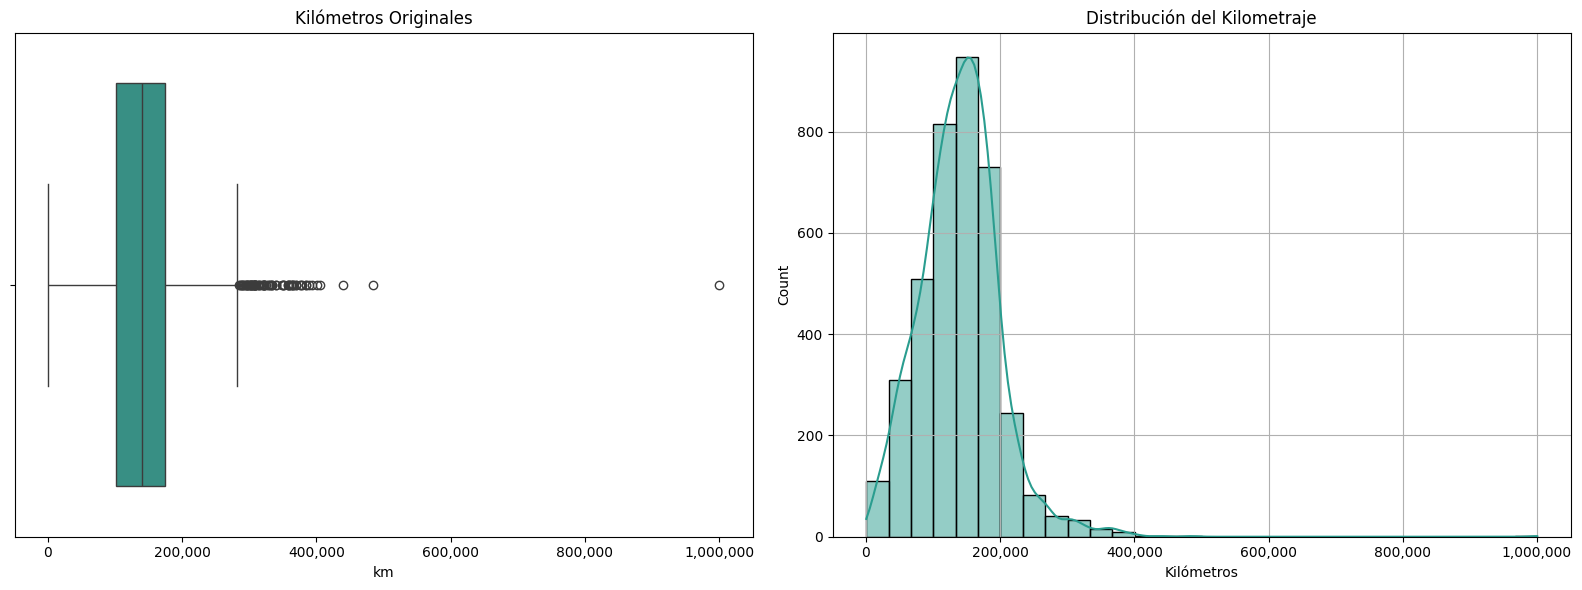

In [91]:
plt.figure(figsize=(16,6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_bmw['km'], color='#2A9D8F')
plt.title('Kilómetros Originales')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Histograma
plt.subplot(1, 2, 2)
sns.histplot(df_bmw['km'], bins=30, kde=True, color='#2A9D8F')
plt.title('Distribución del Kilometraje')
plt.xlabel('Kilómetros')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

**TRATAMIENTO DE OUTLIER SUPERIOR**

In [92]:
# Comprobamos el número de registros de BMW que tienen el modelo '118', para deidir si borrar el outlier
len(df_bmw[df_bmw["modelo"]=="118"])

113

In [93]:
# Buscamos el indice del registro con más de 1.000.000 km
indice_outlier_km = df_bmw[df_bmw['km'] > 1000000].index

# Eliminamos el registro con más de 1.000.000 km
df_bmw = df_bmw.drop(index=indice_outlier_km)

**COMPARATIVA: COCHES DEPORTIVOS VS COCHES NO DEPORTIVOS**

Una hipótesis interesante es que los coches deportivos (definidos como aquellos con más de **250**) recorren, de media, menos kilómetros que los coches convencionales. Esta hipótesis se confirma con los datos: los **deportivos presentan una media de 108,924 km**, frente a los **141,032 km** de los coches no deportivos.


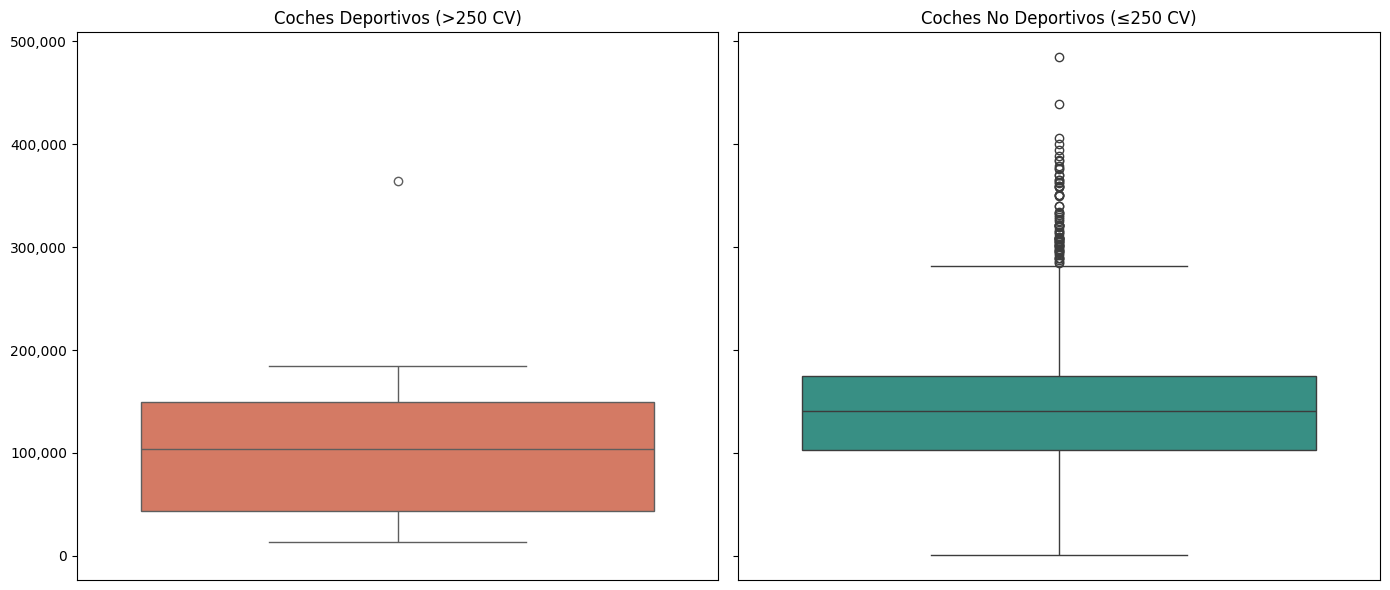

In [94]:
# Filtrar los datos
deportivos = df_bmw[(df_bmw['potencia'] > 250) & (df_bmw['km'].notnull())]
no_deportivos = df_bmw[(df_bmw['potencia'] <= 250) & (df_bmw['km'].notnull())]

# Crear figura con 2 subgráficos horizontales
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Boxplot para deportivos
sns.boxplot(y=deportivos['km'], ax=axes[0], color='#E76F51')
axes[0].set_title('Coches Deportivos (>250 CV)')
axes[0].set_ylabel('')
axes[0].xaxis.set_visible(False)
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Boxplot para no deportivos
sns.boxplot(y=no_deportivos['km'], ax=axes[1], color='#2A9D8F')
axes[1].set_title('Coches No Deportivos (≤250 CV)')
axes[1].set_ylabel('')
axes[1].xaxis.set_visible(False)
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE KM FINAL**

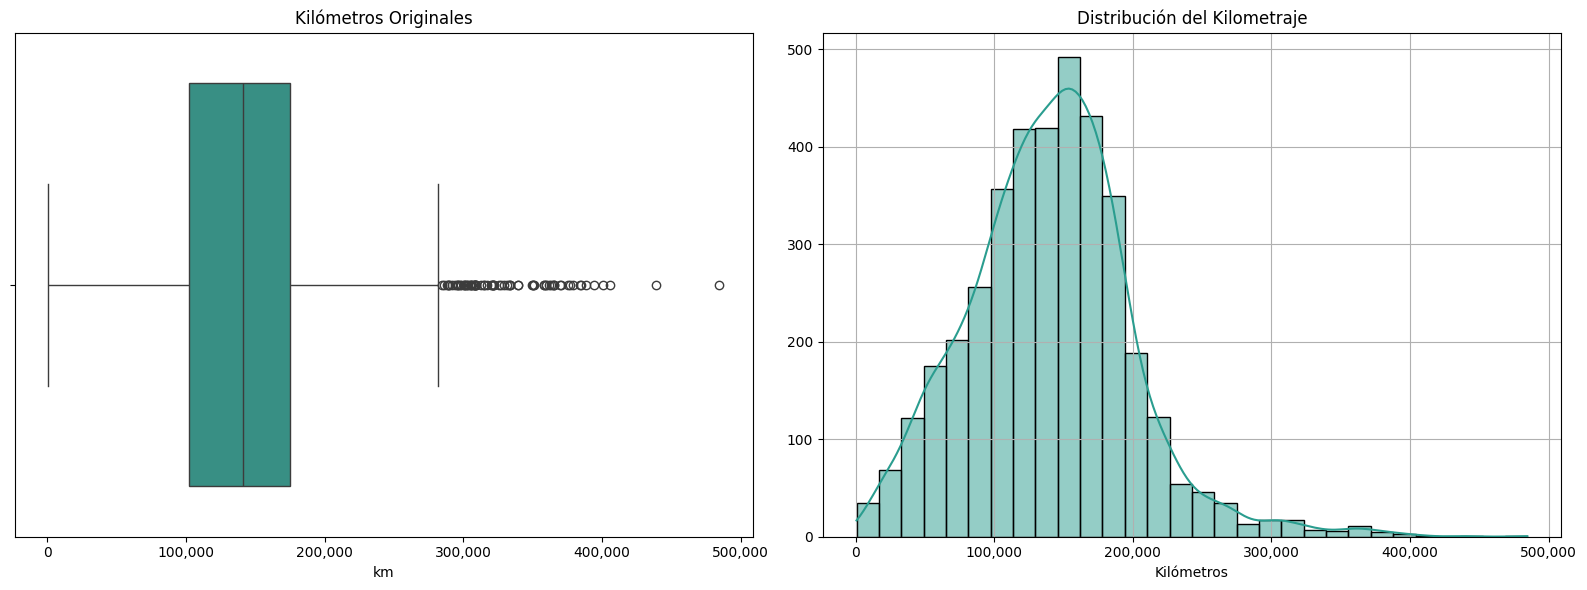

In [95]:
plt.figure(figsize=(16,6))

# Gráfico 1: Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_bmw['km'], color='#2A9D8F')
plt.title('Kilómetros Originales')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Gráfico 2: Histograma
plt.subplot(1, 2, 2)
sns.histplot(df_bmw['km'], bins=30, kde=True, color='#2A9D8F')
plt.title('Distribución del Kilometraje')
plt.xlabel('Kilómetros')
plt.ylabel('')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

#### **POTENCIA**

<p align="center" style="font-size:16px;">
  <b>Media:</b> <span style="color:#e76f51;">129 CV</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Mediana:</b> <span style="color:#e76f51;">120 CV</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Rango:</b> <span style="color:#e76f51;">66 CV – 423 CV</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable potencia refleja la fuerza del motor de cada vehículo. Presenta una media de 129 CV y una mediana de 120 CV, indicando que la distribución es ligeramente asimétrica, hacia valores más altos. El rango es amplio, desde un mínimo de 66 CV hasta un máximo de 423 CV, que podría considerarse un outlier pero hemos decidido no eliminarlo porque creemos que no es un valor de potencia que pudiera ser muy poco común.<br><br>
El 75% de los vehículos tienen una potencia inferior a 135 CV, lo que sugiere que la mayoría se sitúa en un rango de potencia moderado. Los valores muy altos, como aquellos por encima de 200 CV, son relativamente pocos.<br><br>
Hemos eliminado valores que se encontraban por debajo del rango intercuartílico (Q3), consideramos que esos 3 registros no contienen valores correctos.<br><br>
Hemos estudiado si se cumple que cuanto mayor es la potencia, mayor es la proporcion de equipamiento que tienen. Así es, tal y como vemos en el gráfico la proporción es más alta cuanto mayor potencia tiene el coche.
</p>


**ESTADÍSTICAS BÁSICAS**

In [96]:
# Estadísticas descriptivas para potencia
df_bmw['potencia'].describe()

count    3852.000000
mean      128.996885
std        38.826836
min         0.000000
25%       100.000000
50%       120.000000
75%       135.000000
max       412.000000
Name: potencia, dtype: float64

In [97]:
# Media y mediana de la columna 'potencia'
media_potencia = df_bmw['potencia'].mean()
mediana_potencia = df_bmw['potencia'].median()

# Imprimimos los resultados
print(f"Media de potencia: {media_potencia:.2f}")
print(f"Mediana de potencia: {mediana_potencia:.2f}")

Media de potencia: 129.00
Mediana de potencia: 120.00


**LIMPIEZA DE VALORES ATÍPICOS**

In [98]:
# Detectamos posibles outliers usando el método IQR
Q1_pot = df_bmw['potencia'].quantile(0.25)
Q3_pot = df_bmw['potencia'].quantile(0.75)
IQR_pot = Q3_pot - Q1_pot

# Calculamos los límites inferior y superior para detectar outliers
limite_inferior_pot = Q1_pot - 1.5 * IQR_pot
limite_superior_pot = Q3_pot + 1.5 * IQR_pot

# Identificamos los outliers en la columna 'potencia'
outliers_potencia = df_bmw[(df_bmw['potencia'] < limite_inferior_pot) | (df_bmw['potencia'] > limite_superior_pot)]

# Imprimimos los resultados
print(f"Límite inferior potencia: {limite_inferior_pot}")
print(f"Límite superior potencia: {limite_superior_pot}")
print(f"Número de outliers en Potencia: {len(outliers_potencia)}")

Límite inferior potencia: 47.5
Límite superior potencia: 187.5
Número de outliers en Potencia: 473


Al analizar más en detalle esta variable, encontramos varios valores bajos que generan desconfianza. Una búsqueda rápida confirma nuestra sospecha: **ningún modelo de la marca BMW fabricado desde 1990 en adelante tiene una potencia inferior a 95 CV (aprox. 70 kW)**. No obstante, observando los valores y su distribución, **supondremos para fines prácticos del ejercicio que la unidad es kilovatios (kW)**.

En función del contexto del problema, los valores de potencia **inferiores a 70 kW** son considerados **atípicos y no coherentes**, por lo que serán descartados.

> 🔍 **Nota metodológica:** En un entorno profesional, esta duda sobre la unidad de medida habría sido confirmada con el cliente antes de continuar el análisis.

In [99]:
# Hemos visto con .describe valores a 0, también buscamos potencias inferiores a 70 en la columna 'potencia
df_bmw[df_bmw['potencia'] < 70]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,edad_coche,color_estandar
1409,i3,152328.0,25.0,hatchback,False,True,False,False,False,True,20300.0,2,4-6,1.0
1511,i3,152470.0,25.0,hatchback,False,True,False,False,False,True,15500.0,3,4-6,1.0
1884,318,170529.0,66.0,hatchback,False,False,True,False,False,False,1000.0,1,4-6,0.0
2193,316,146951.0,66.0,sedan,False,False,False,False,False,False,1300.0,0,>25,1.0
3008,X1,81770.0,0.0,suv,False,False,False,False,False,True,11700.0,0,4-6,1.0


In [100]:
# Hay cinco registros con potencia 0 o con valores inferiores a 70, guardamos sus índices y eliminamos las filas del dataset.
indice_potencia = df_bmw[df_bmw['potencia'] < 70].index
df_bmw = df_bmw.drop(index=indice_potencia)

# Comprobamos que hemos eliminado las filas
df_bmw[df_bmw['potencia'] < 70]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,edad_coche,color_estandar


**RELACIÓN ENTRE POTENCIA Y EQUIPAMIENTO**

Se realizó un análisis adicional para evaluar si existe una relación entre el **nivel de potencia** y el **equipamiento del vehículo**. Clasificamos los coches en tres rangos:

- **Baja potencia**: < 100 CV  
- **Media potencia**: entre 100 y 200 CV  
- **Alta potencia**: > 200 CV  

La visualización confirma nuestra hipótesis: **cuanto mayor es la potencia, mayor es la proporción de equipamiento incorporado**, destacando especialmente variables como *aire acondicionado*, *cámara trasera* o *bluetooth*.

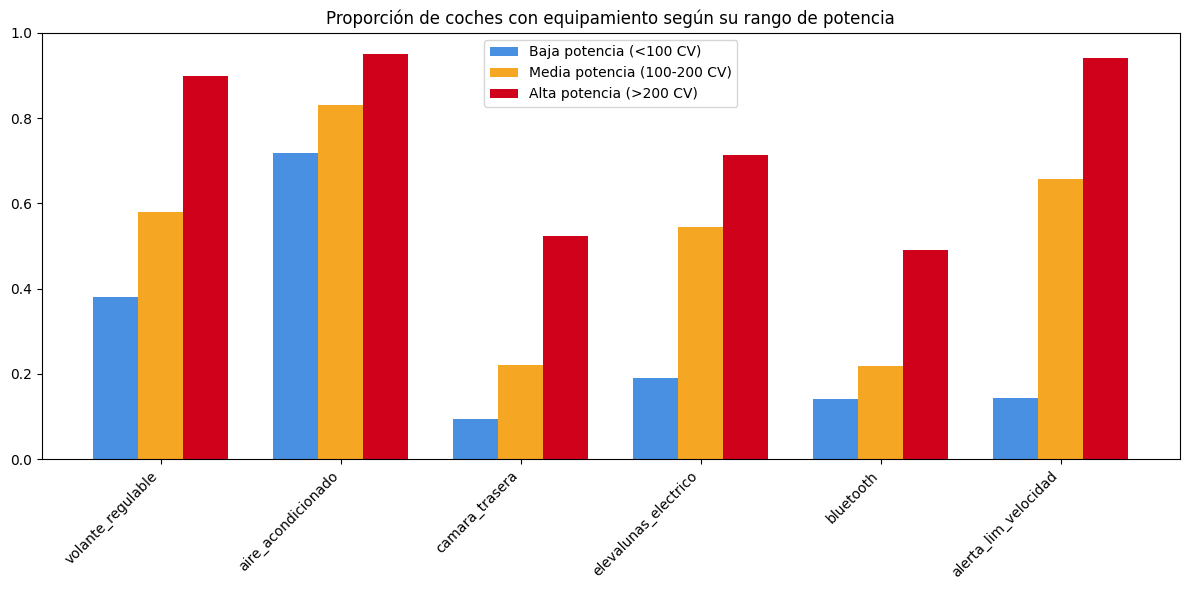

In [101]:
# Definir rangos de potencia
bins = [0, 100, 200, np.inf]
labels = ['Baja potencia (<100 CV)', 'Media potencia (100-200 CV)', 'Alta potencia (>200 CV)']
df_bmw['rango_potencia'] = pd.cut(df_bmw['potencia'], bins=bins, labels=labels)

# Lista de variables booleanas de equipamiento
equipamiento_variables = [
    'volante_regulable',
    'aire_acondicionado',
    'camara_trasera',
    'elevalunas_electrico',
    'bluetooth',
    'alerta_lim_velocidad'
]

# Agrupar por rango de potencia y calcular la media (proporción) de cada equipamiento
equipamiento_por_potencia = df_bmw.groupby('rango_potencia')[equipamiento_variables].mean().T

# Paleta personalizada según rango de potencia
paleta_personalizada = {
    'Baja potencia (<100 CV)': '#4A90E2',
    'Media potencia (100-200 CV)': '#F5A623',
    'Alta potencia (>200 CV)': '#D0021B'  
}

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Configuración de las barras
bar_width = 0.25
indices = np.arange(len(equipamiento_variables))

# Dibujar las barras para cada rango de potencia
for i, rango in enumerate(labels):
    valores = equipamiento_por_potencia[rango].values
    ax.bar(indices + i*bar_width, valores, bar_width, label=rango, color=paleta_personalizada[rango])

# Configuración del gráfico
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(equipamiento_variables, rotation=45, ha='right')
ax.set_ylim(0, 1)
ax.set_ylabel('')
ax.set_title('Proporción de coches con equipamiento según su rango de potencia')
ax.legend(title='')
plt.tight_layout()
plt.show()

# Eliminamos la columna 'rango_potencia' ya que no la vamos a utilizar más
df_bmw.drop(columns='rango_potencia', inplace=True)

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE POTENCIA**

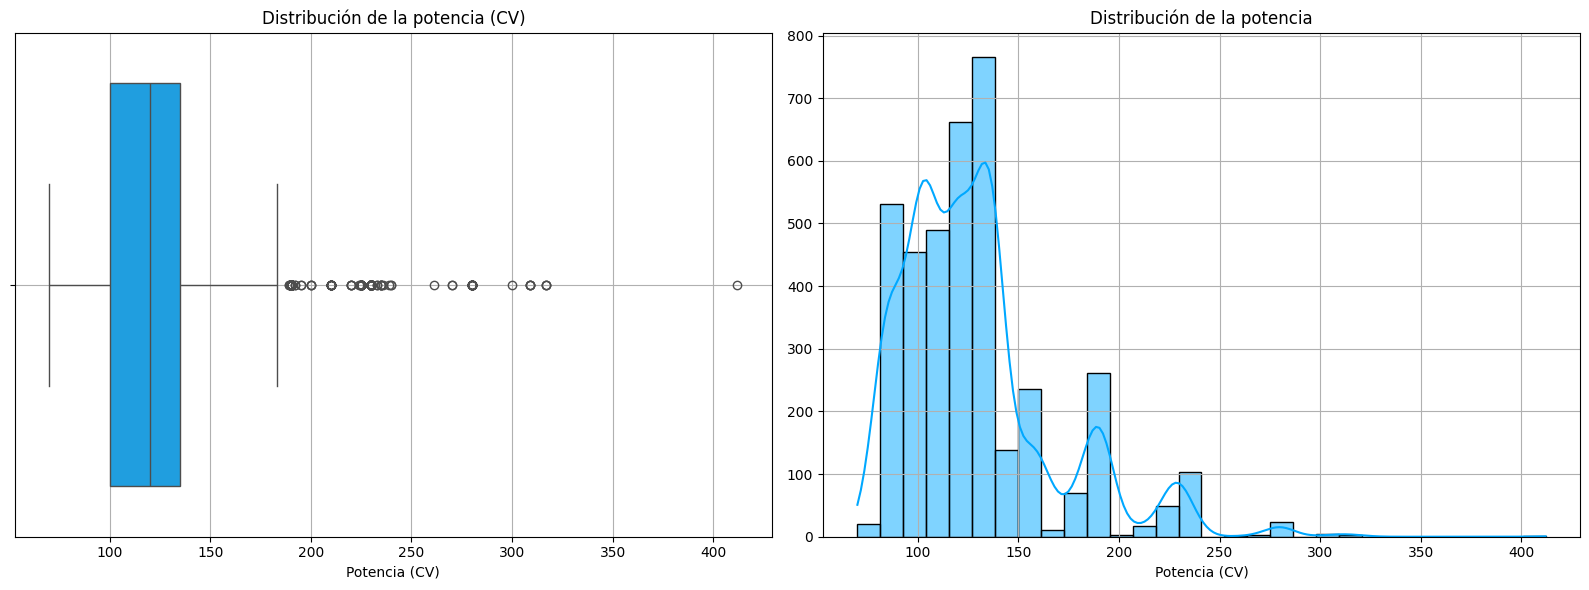

In [102]:
# Creación de la figura con dos subgráficos
plt.figure(figsize=(16,6))

# Gráfico 1: Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_bmw['potencia'], color='#00A8FF')
plt.title('Distribución de la potencia (CV)')
plt.xlabel('Potencia (CV)')
plt.grid(True)

# Gráfico 2: Histograma con KDE
plt.subplot(1, 2, 2)
sns.histplot(df_bmw['potencia'], bins=30, kde=True, color='#00A8FF')
plt.title('Distribución de la potencia')
plt.xlabel('Potencia (CV)')
plt.ylabel('')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.tight_layout()
plt.show()

#### **PRECIO**

<p align="center" style="font-size:16px;">
  <b>Media:</b> <span style="color:#e76f51;">15,832 €</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Mediana:</b> <span style="color:#e76f51;">14,200 €</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Rango:</b> <span style="color:#e76f51;">100 € – 178,500 €</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable precio representa el valor de venta de cada vehículo en euros. La media del precio es de aproximadamente 15,832 €, mientras que la mediana es un poco menor, 14,200 €. Esta diferencia entre media y mediana indica que la distribución de los precios no es completamente simétrica, sino que está influenciada por algunos vehículos con precios muy elevados. La distribución presenta una asimetría hacia la derecha (sesgo positivo), es decir, hay más vehículos con precios bajos o medios y una cola larga hacia precios altos. 
<br><br>
El rango de precios es amplio, desde un mínimo de 100 € hasta un máximo cercano a los 178,500 €. Aunque existen precios muy altos, especialmente en modelos de alta gama como los BMW X3 y X4, que son SUV de lujo y por tanto justifican estos valores elevados, no se consideran como outliers superiores en este análisis.<br><br>
El 75% de los vehículos tienen un precio inferior a 18,600 €, lo que sugiere que la mayoría se sitúa en un rango de precio moderado y accesible.<br><br>
Por otro lado, se detectaron 7 registros con precios anormalmente bajos (100 €) que corresponden a vehículos relativamente nuevos, con menos de 6 años de antigüedad. Estos valores bajos no son coherentes con el mercado y se clasifican como outliers inferiores incorrectos.<br><br>

</p>


**ESTADÍSTICAS BÁSICAS**

In [103]:
# Estadísticas descriptivas para precio
df_bmw['precio'].describe()

count      3847.000000
mean      15842.214713
std        9256.916914
min         100.000000
25%       10900.000000
50%       14200.000000
75%       18700.000000
max      178500.000000
Name: precio, dtype: float64

In [104]:
# Media y mediana de la columna 'precio'
media_precio = df_bmw['precio'].mean()
mediana_precio = df_bmw['precio'].median()

# Imprimimos los resultados
print(f"Media de precio: {media_precio}")
print(f"Mediana de precio: {mediana_precio}")

Media de precio: 15842.214712763192
Mediana de precio: 14200.0


**LIMPIEZA DE VALORES ATÍPICOS**

In [105]:
# Cálculo del rango intercuartílico (IQR)
Q1_precio = df_bmw['precio'].quantile(0.25)
Q3_precio = df_bmw['precio'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

# Cálculo de los límites inferior y superior para detectar outliers
limite_inferior_precio = Q1_precio - 1.5 * IQR_precio
limite_superior_precio = Q3_precio + 1.5 * IQR_precio

# Identificación de outliers en la columna 'precio'
outliers_precio = df_bmw[(df_bmw['precio'] < limite_inferior_precio) | (df_bmw['precio'] > limite_superior_precio)]

# Imprimimos los resultados
print(f"Límite inferior precio: {limite_inferior_precio}")
print(f"Límite superior precio: {limite_superior_precio}")
print(f"Número de outliers en Precio: {len(outliers_precio)}")


Límite inferior precio: -800.0
Límite superior precio: 30400.0
Número de outliers en Precio: 241


In [106]:
# Comprobamos los registros con precio superior al limite superior calculado
df_bmw[df_bmw["precio"]>limite_superior_precio].sort_values(by="precio")

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,edad_coche,color_estandar
3128,X5,76677.0,190.0,suv,True,True,False,True,False,True,30500.0,5,4-6,1.0
3305,X4,103064.0,140.0,suv,True,True,False,False,False,True,30500.0,4,1-3,1.0
50,435,26062.0,225.0,coupe,True,True,False,True,True,True,30500.0,7,4-6,1.0
3399,X5,100943.0,190.0,suv,False,True,True,False,False,True,30500.0,3,4-6,1.0
2128,535,108675.0,230.0,estate,False,True,False,False,True,True,30600.0,4,4-6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,M4,13929.0,317.0,convertible,True,True,False,False,True,True,69700.0,5,7-10,1.0
3762,X5 M,4530.0,230.0,suv,True,True,False,False,False,True,73100.0,2,1-3,0.0
68,i8,12402.0,170.0,coupe,True,True,False,False,False,True,95200.0,3,4-6,1.0
3722,X4,103222.0,140.0,suv,True,True,False,True,False,True,142800.0,5,4-6,1.0


In [107]:
# Observamos los registros con precio superior a 100.000 euros
df_bmw[df_bmw["precio"]>100000].sort_values(by="precio")

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,edad_coche,color_estandar
3722,X4,103222.0,140.0,suv,True,True,False,True,False,True,142800.0,5,4-6,1.0
3781,X3,72515.0,135.0,suv,False,False,True,False,False,True,178500.0,2,4-6,1.0


In [108]:
# Listamos los registros con precio inferior a 500 euros
df_bmw[df_bmw["precio"]<500]

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,edad_coche,color_estandar
490,318,147558.0,105.0,estate,False,True,False,False,False,True,100.0,1,4-6,1.0
703,318,134156.0,105.0,estate,False,True,False,False,False,True,100.0,2,4-6,1.0
994,320,170381.0,135.0,estate,True,True,False,False,False,False,100.0,3,4-6,0.0
1195,520,358332.0,100.0,estate,False,False,False,True,False,False,400.0,2,16-20,1.0
1231,520,358333.0,100.0,estate,False,False,False,True,False,False,400.0,2,16-20,1.0
1436,116,174524.0,85.0,hatchback,False,True,False,False,False,False,100.0,2,4-6,1.0
1952,525,230578.0,85.0,sedan,False,False,False,False,False,False,200.0,1,21-25,1.0
2035,525,229880.0,85.0,sedan,False,False,False,False,False,False,200.0,1,21-25,1.0
2068,525,230264.0,85.0,sedan,False,False,False,False,False,False,200.0,1,21-25,1.0
2242,525,439060.0,105.0,estate,False,False,True,False,False,False,100.0,2,21-25,0.0


In [109]:
# Consideramos que los registros con precio inferior a 500 euros y menos de '4-6' años de coche son incorrectos y no serían representativos para predecir, guardamos sus índices y eliminamos las filas del dataset.
indice_precio = df_bmw[(df_bmw['precio'] < 500) & (df_bmw['edad_coche'] == '4-6')].index
df_bmw = df_bmw.drop(index=indice_precio)

# Comprobamos que hemos eliminado las filas
df_bmw[(df_bmw['precio'] < 500) & (df_bmw['edad_coche'] == '4-6')].index

Index([], dtype='int64')

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE PRECIO**

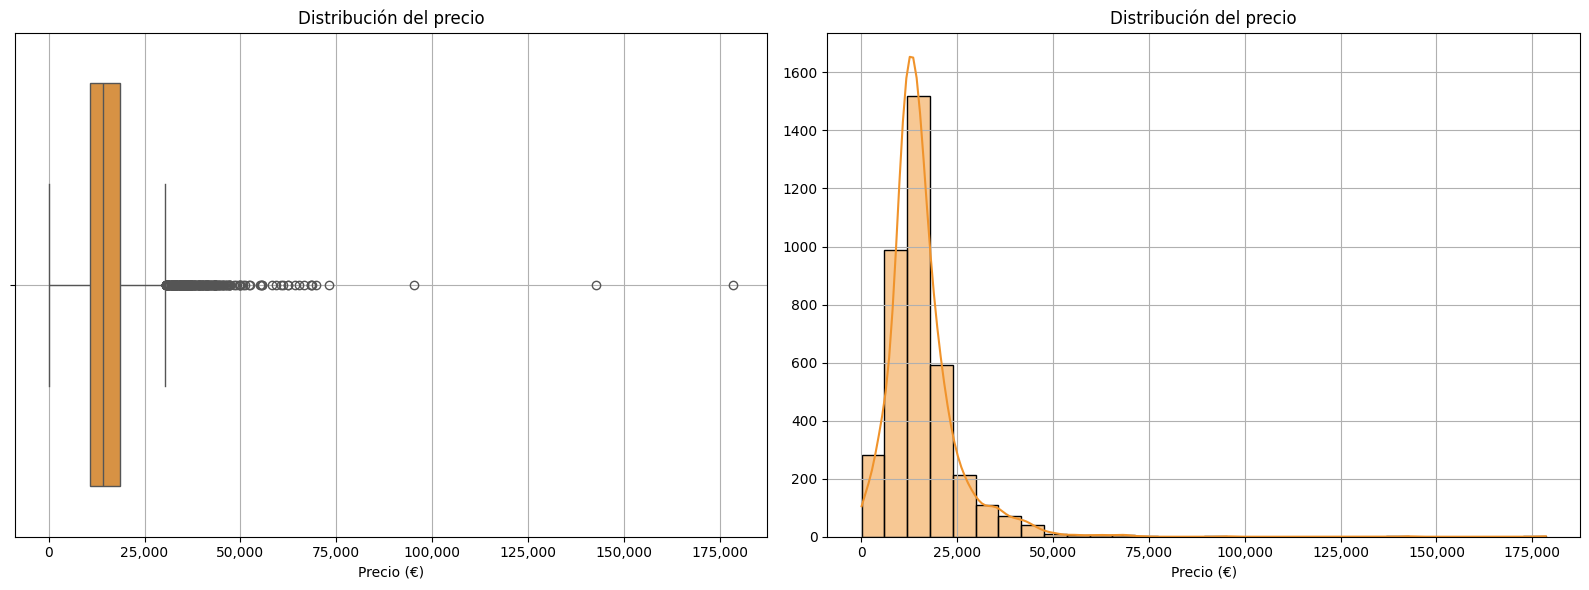

In [110]:
plt.figure(figsize=(16,6))

# Gráfico 1: Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_bmw['precio'], color='#F0932B')
plt.title('Distribución del precio')
plt.xlabel('Precio (€)')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Gráfico 2: Histograma con KDE
plt.subplot(1, 2, 2)
sns.histplot(df_bmw['precio'], bins=30, kde=True, color='#F0932B')
plt.title('Distribución del precio')
plt.xlabel('Precio (€)')
plt.ylabel('')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

### **6.2 - VARIABLES BOOLEANAS**

#### **VOLANTE REGULABLE**

<p align="center" style="font-size:16px;">
  <b>Presente:</b> <span style="color:#7FB765;">2.639 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>No presente:</b> <span style="color:#CD4343;">2.149 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">55% con volante regulable</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>volante_regulable</b> indica si el vehículo dispone de volante ajustable, una característica de confort cada vez más habitual. De los 4.788 registros disponibles, un total de <b>2.639 vehículos (55%)</b> cuentan con esta funcionalidad, mientras que el <b>44.9%</b> restante no la incluye. <br><br>
Esto sugiere que más de la mitad del conjunto de vehículos ofertados incluye esta mejora ergonómica, aunque aún hay una proporción significativa que no la incorpora, como se observa en el gráfico, la proporción de coches que cuentan con volante regulable disminuye de forma notable en vehículos con más de 20 años. <br><br>
</p>


**ESTADÍSTICAS BÁSICAS**

In [111]:
# Estadísticas descriptivas para volante_regulable
df_bmw['volante_regulable'].describe()

count     3841
unique       2
top       True
freq      2091
Name: volante_regulable, dtype: object

In [112]:
# Distribución de la columna 'volante_regulable'
distribuciones['volante_regulable']

volante_regulable
True     0.543213
False    0.456787
Name: proportion, dtype: Float64

**VISUALIZACIÓN DE LA PROPORCIÓN DE COCHES QUE TIENEN VOLANTE REGULABLE SEGÚN LA EDAD**

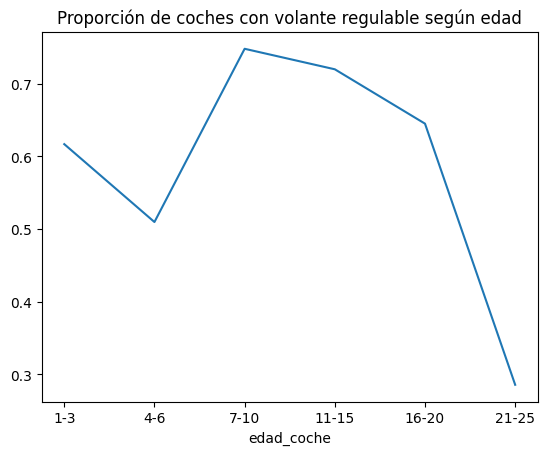

In [113]:
# Calculamos la proporción de coches con volante regulable según la edad del coche
proporcion_por_edad = df_bmw.groupby('edad_coche')['volante_regulable'].mean()

# Graficamos la proporción de coches con volante regulable según la edad del coche
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con volante regulable según edad')
plt.ylabel('')
plt.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE VOLANTE REGULABLE**

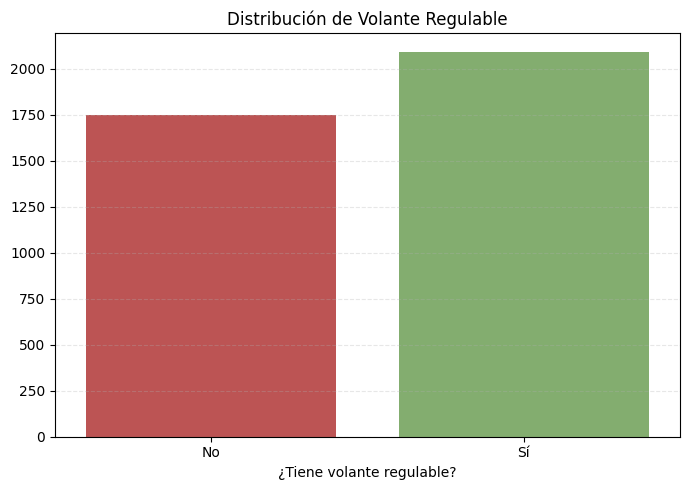

In [114]:
# Crear figura
plt.figure(figsize=(7, 5))

# Gráfico de barras
ax = sns.countplot(x='volante_regulable', data=df_bmw, palette=["#CD4343", "#7FB765"])

# Títulos y etiquetas
plt.title('Distribución de Volante Regulable')
plt.xlabel('¿Tiene volante regulable?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### **AIRE ACONDICIONADO**

<p align="center" style="font-size:16px;">
  <b>Presente:</b> <span style="color:#7FB765;">3.875 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>No presente:</b> <span style="color:#CD4343;">913 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">80.9% con aire acondicionado</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>aire_acondicionado</b> indica si el vehículo está equipado con sistema de climatización. Según los datos disponibles, el <b>80.9%</b> de los vehículos (3.875 de 4.788) disponen de aire acondicionado, mientras que el <b>19.1%</b> no lo incorporan.<br><br>
Esto refleja que se trata de una característica ampliamente extendida en el parque de vehículos analizado, especialmente en modelos recientes o de gama media-alta. La presencia de este equipamiento como vemos en el gráfico disminuye notablemente en coches de más de 10 años..<br><br>
</p>


**ESTADÍSTICAS BÁSICAS**

In [115]:
# Estadísticas descriptivas para aire_acondicionado
df_bmw['aire_acondicionado'].describe()

count     3841
unique       2
top       True
freq      3106
Name: aire_acondicionado, dtype: object

In [116]:
# Revisamos la distribución de la columna 'aire_acondicionado'
distribuciones['aire_acondicionado']

aire_acondicionado
True     0.807682
False    0.192318
Name: proportion, dtype: float64

**VISUALIZACIÓN DE LA PROPORCIÓN DE COCHES QUE TIENEN AIRE ACONDICIONADO SEGÚN LA EDAD**

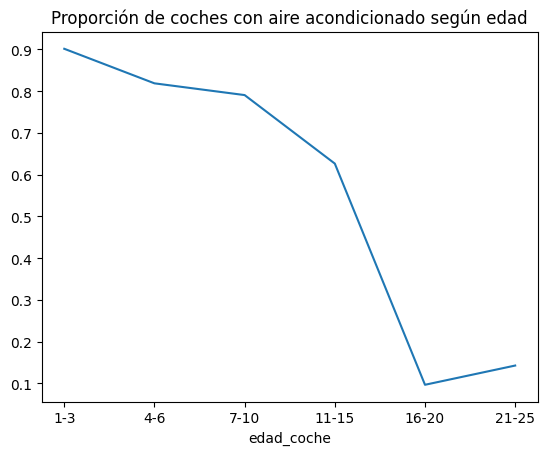

In [117]:
# Calculamos la proporción de coches con aire acondicionado según la edad del coche
proporcion_por_edad = df_bmw.groupby('edad_coche')['aire_acondicionado'].mean()

# Graficamos la proporción de coches con aire acondicionado según la edad del coche
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con aire acondicionado según edad')
plt.ylabel('')
plt.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE AIRE ACONDICIONADO**

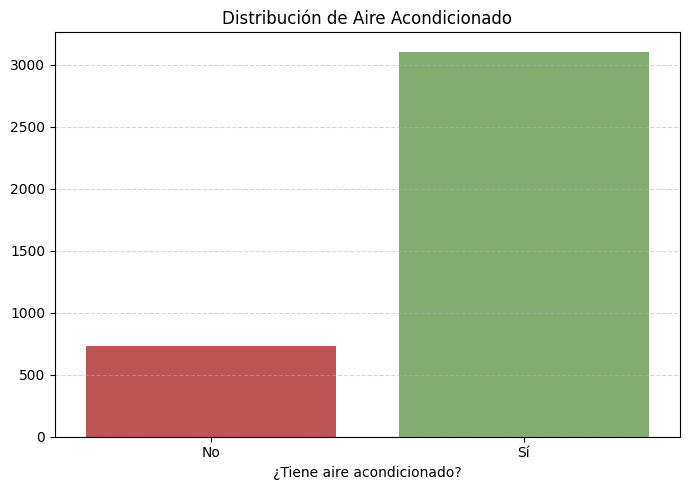

In [118]:
# Crear figura
plt.figure(figsize=(7,5))

# Gráfico de barras
sns.countplot(x='aire_acondicionado', data=df_bmw, palette=['#CD4343', '#7FB765'])
plt.title('Distribución de Aire Acondicionado')

# Títulos y etiquetas
plt.xlabel('¿Tiene aire acondicionado?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **CAMARA TRASERA**

<p align="center" style="font-size:16px;">
  <b>Presente:</b> <span style="color:#7FB765;">965 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>No presente:</b> <span style="color:#CD4343;">3.823 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">20.1% con cámara trasera</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>camara_trasera</b> indica si el vehículo está equipado con cámara trasera para facilitar el estacionamiento y mejorar la seguridad.<br><br>
En el conjunto de datos, solo un <b>20.1%</b> de los vehículos (965 de 4.788) disponen de esta tecnología, mientras que la mayoría, un <b>79.8%</b>, no la tienen.<br><br>
Esto puede estar relacionado con el rango de antigüedad y gama de los coches, ya que la cámara trasera es una característica que se ha ido popularizando en los últimos años y suele encontrarse en modelos más modernos o de gama más alta, es por eso que en el gráico vemos cómo ha ido creciendo la proporción de coches con camara trasera durante los años.<br><br>
</p>


**ESTADÍSTICAS BÁSICAS**

In [119]:
# Estadísticas descriptivas para camara_trasera
df_bmw['camara_trasera'].describe()

count      3841
unique        2
top       False
freq       3057
Name: camara_trasera, dtype: object

In [120]:
# Distribución de la columna 'camara_trasera'
distribuciones['camara_trasera']

camara_trasera
False    0.796263
True     0.203737
Name: proportion, dtype: Float64

**VISUALIZACIÓN DE LA PROPORCIÓN DE COCHES QUE TIENEN CAMARA TRASERA SEGÚN LA EDAD**

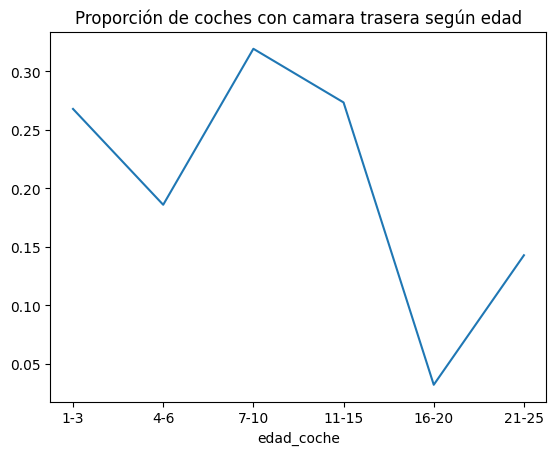

In [121]:
# Calculamos la proporción de coches con cámara trasera según la edad del coche
proporcion_por_edad = df_bmw.groupby('edad_coche')['camara_trasera'].mean()

# Graficamos la proporción de coches con cámara trasera según la edad del coche
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con camara trasera según edad')
plt.ylabel('')
plt.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE CAMARA TRASERA**

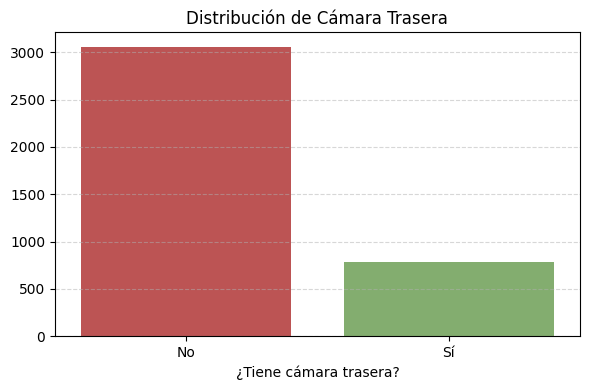

In [122]:
# Crear figura
plt.figure(figsize=(6,4))

# Gráfico de barras
sns.countplot(x='camara_trasera', data=df_bmw, palette=['#CD4343', '#7FB765'])
plt.title('Distribución de Cámara Trasera')
plt.xlabel('¿Tiene cámara trasera?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### **ELEVALUNAS ELECTRICO**

<p align="center" style="font-size:16px;">
  <b>Con elevalunas eléctrico:</b> <span style="color:#7FB765;">2.213 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Sin elevalunas eléctrico:</b> <span style="color:#CD4343;">2.575 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">46.2% con elevalunas eléctrico</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>elevalunas_electrico</b> indica si el vehículo cuenta con elevalunas eléctricos, una característica común en vehículos modernos que aporta comodidad y funcionalidad.<br><br>
En la muestra de datos, aproximadamente el <b>46.1%</b> de los vehículos disponen de esta característica, mientras que un 53.8% no la tienen.<br><br>
Este equilibrio puede reflejar la diversidad del parque de vehículos en cuanto a antigüedad y equipamiento, desde modelos más básicos hasta otros más completos, es por eso cómo vemos que los coches de más de 10 años se reduce notablemente la proporción de coches con elevalunas electrico hasta llegar a los coches de hace más de 20 años que no disponen de este equipamiento. <br><br>
</p>

**ESTADÍSTICAS BÁSICAS**

In [123]:
# Estadísticas descriptivas para elevalunas_electrico
df_bmw['elevalunas_electrico'].describe()

count      3841
unique        2
top       False
freq       2067
Name: elevalunas_electrico, dtype: object

In [124]:
# Distribución de la columna 'elevalunas_electrico'
distribuciones['elevalunas_electrico']

elevalunas_electrico
False    0.53958
True     0.46042
Name: proportion, dtype: Float64

**VISUALIZACIÓN DE LA PROPORCIÓN DE COCHES QUE TIENEN CAMARA TRASERA SEGÚN LA EDAD**

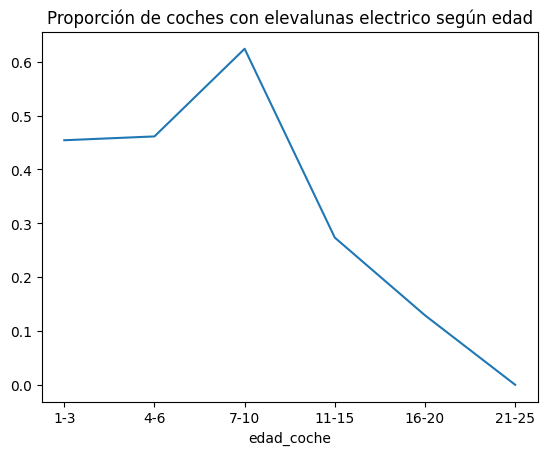

In [125]:
# Calculamos la proporción de coches con elevalunas eléctrico según la edad del coche
proporcion_por_edad = df_bmw.groupby('edad_coche')['elevalunas_electrico'].mean()

# Graficamos la proporción de coches con elevalunas eléctrico según la edad del coche
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con elevalunas electrico según edad')
plt.ylabel('')
plt.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE ELEVALUNAS_ELECTRICO**

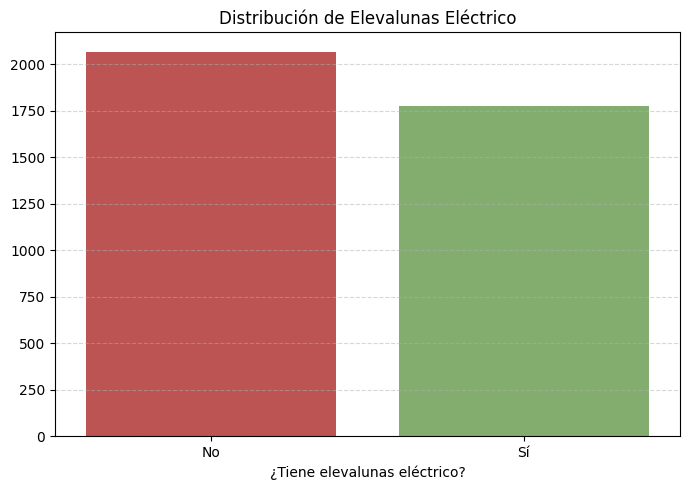

In [126]:
# Crear figura
plt.figure(figsize=(7,5))

# Gráfico de barras
sns.countplot(x='elevalunas_electrico', data=df_bmw, palette=['#CD4343', '#7FB765'])

# Títulos y etiquetas
plt.title('Distribución de Elevalunas Eléctrico')
plt.xlabel('¿Tiene elevalunas eléctrico?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **BLUETOOTH**

<p align="center" style="font-size:16px;">
  <b>Con Bluetooth:</b> <span style="color:#7FB765;">1,040 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Sin Bluetooth:</b> <span style="color:#CD4343;">3,748 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">21.6% con Bluetooth</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>bluetooth</b> indica si el vehículo está equipado con conectividad Bluetooth, una característica cada vez más habitual para facilitar la conexión inalámbrica con dispositivos móviles.<br><br>
En el conjunto de datos, aproximadamente un 21.6% de los vehículos disponen de Bluetooth, mientras que la mayoría, un 78.3%, no cuentan con esta funcionalidad.<br><br>
Este porcentaje relfeja la baja proporción de coches con bluetooth en las ventas registradas, como vemos en el gráfico ha ido aumentando con los coches más modernos, y los coches de más de 20 años vemos cómo este equipamiento no estaba disponible.<br><br>
</p>


**ESTADÍSTICAS BÁSICAS**

In [127]:
# Estadísticas descriptivas para bluetooth
df_bmw['bluetooth'].describe()

count      3841
unique        2
top       False
freq       3022
Name: bluetooth, dtype: object

In [128]:
# Distribución de la columna 'bluetooth'
distribuciones['bluetooth']

bluetooth
False    0.787179
True     0.212821
Name: proportion, dtype: float64

**VISUALIZACIÓN DE LA PROPORCIÓN DE COCHES QUE TIENEN CAMARA TRASERA SEGÚN LA EDAD**

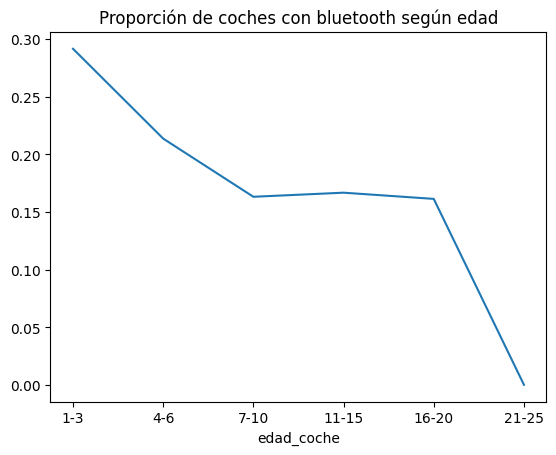

In [129]:
# Calculamos la proporción de coches con bluetooth según la edad del coche
proporcion_por_edad = df_bmw.groupby('edad_coche')['bluetooth'].mean()

# Graficamos la proporción de coches con bluetooth según la edad del coche
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con bluetooth según edad')
plt.ylabel('')
plt.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE CAMARA TRASERA**

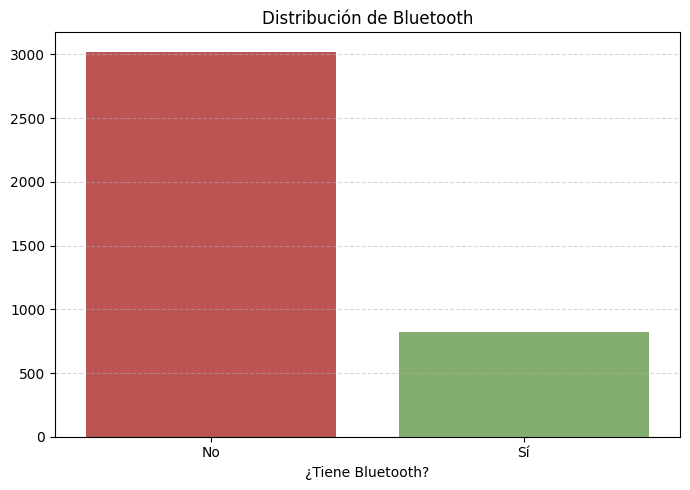

In [130]:
# Crear figura
plt.figure(figsize=(7,5))

# Gráfico de barras
sns.countplot(x='bluetooth', data=df_bmw, palette=['#CD4343', '#7FB765'])

# Títulos y etiquetas
plt.title('Distribución de Bluetooth')
plt.xlabel('¿Tiene Bluetooth?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **ALERTA LIMITE DE VELOCIDAD**

<p align="center" style="font-size:16px;">
  <b>Con alerta activada:</b> <span style="color:#7FB765;">2,578 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Sin alerta:</b> <span style="color:#CD4343;">2,210 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">53.8% con alerta</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>alerta_lim_velocidad</b> indica si el vehículo cuenta con un sistema que avisa al conductor cuando se supera el límite de velocidad.<br><br>
En el dataset, un 53.8% de los vehículos están equipados con esta función, lo que refleja la creciente importancia de la seguridad vial y las tecnologías asistidas en los coches modernos.<br><br>
El 46.1% restante no dispone de esta alerta, lo que puede corresponder a vehículos más antiguos o modelos con menos equipamiento tecnológico, vemos como la proporcion de coches con este equipamiento ha ido aumentando en los coches más modernos..<br><br>
</p>


**ESTADÍSTICAS BÁSICAS**

In [131]:
# Estadísticas descriptivas para alerta_lim_velocidad
df_bmw['alerta_lim_velocidad'].describe()

count     3841
unique       2
top       True
freq      2065
Name: alerta_lim_velocidad, dtype: object

In [132]:
distribuciones['alerta_lim_velocidad']

alerta_lim_velocidad
True     0.537503
False    0.462497
Name: proportion, dtype: float64

**VISUALIZACIÓN DE LA PROPORCIÓN DE COCHES QUE TIENEN CAMARA TRASERA SEGÚN LA EDAD**

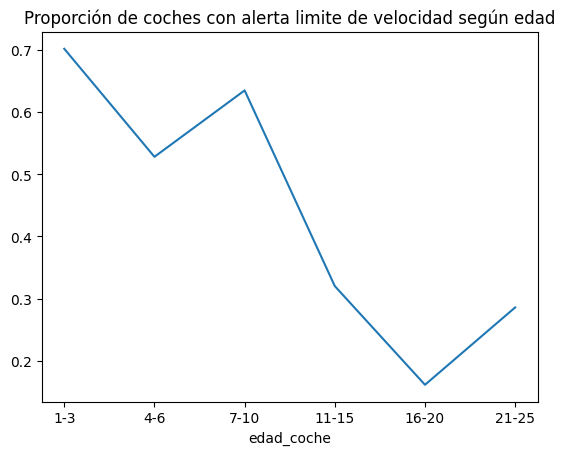

In [133]:
# Calculamos la proporción de coches con alerta límite de velocidad según la edad del coche
proporcion_por_edad = df_bmw.groupby('edad_coche')['alerta_lim_velocidad'].mean()

# Graficamos la proporción de coches con alerta límite de velocidad según la edad del coche
proporcion_por_edad.plot()
plt.title(f'Proporción de coches con alerta limite de velocidad según edad')
plt.ylabel('')
plt.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE ALERTA LIMITE DE VELOCIDAD**

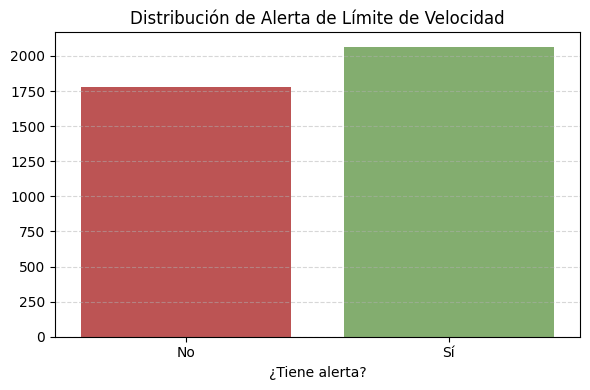

In [134]:
# Crear figura
plt.figure(figsize=(6,4))

# Gráfico de barras
sns.countplot(x='alerta_lim_velocidad', data=df_bmw, palette=['#CD4343', '#7FB765'])

# Títulos y etiquetas
plt.title('Distribución de Alerta de Límite de Velocidad')
plt.xlabel('¿Tiene alerta?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **COLOR ESTANDAR**

<p align="center" style="font-size:16px;">
  <b>Color estándar:</b> <span style="color:#7FB765;">4,087 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Color no estándar:</b> <span style="color:#CD4343;">701 vehículos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Proporción:</b> <span style="color:#f4a261;">85.3% con colores comunes</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>color_estandar</b> clasifica los vehículos según si su color pertenece a una gama de colores comunes: <b>negro, gris, azul o blanco</b></span>.<br><br>
En este conjunto de datos, el 85.3% de los coches presentan uno de estos colores estándar, lo que sugiere una clara preferencia de los compradores por tonalidades neutras y tradicionales. El 14.6% restante utiliza colores menos frecuentes (como rojo, marrón, plateado, naranja, etc.), lo que puede indicar modelos más personalizados. <br><br>
Observamos que el color más usado es el color negro, tanto en los coches deportivos (+250 CV), como en el total de coches.
</p>


**ESTADÍSTICAS BÁSICAS**

In [135]:
# Vemos la distribución original de la columna 'color'
bmw['color'].value_counts()

color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int64

In [136]:
# Estadísticas descriptivas para color_estandar
df_bmw['color_estandar'].describe()

count    3841.000000
mean        0.854986
std         0.352161
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: color_estandar, dtype: float64

In [137]:
# Vemos la cantidad de valores en la columna 'color_estandar'
df_bmw['color_estandar'].value_counts()

color_estandar
1.0    3284
0.0     557
Name: count, dtype: int64

In [138]:
# Comprobamos la distribución de la columna 'color_estandar'
distribuciones['color_estandar']

color_estandar
1.0    0.854918
0.0    0.145082
Name: proportion, dtype: float64

**TRANSFORMACIÓN DE TIPO DE VARIABLE**

In [139]:
# Transformamos la columna 'color_estandar' a tipo boolean
df_bmw['color_estandar'] = df_bmw['color_estandar'].astype(bool)

# Comprobamos el tipo de dato
print(df_bmw['color_estandar'].dtype)

bool


**VISUALIZACIÓN DE LOS TRES COLORES MÁS USADOS: DEPORTIVOS VS NO DEPORTIVOS**

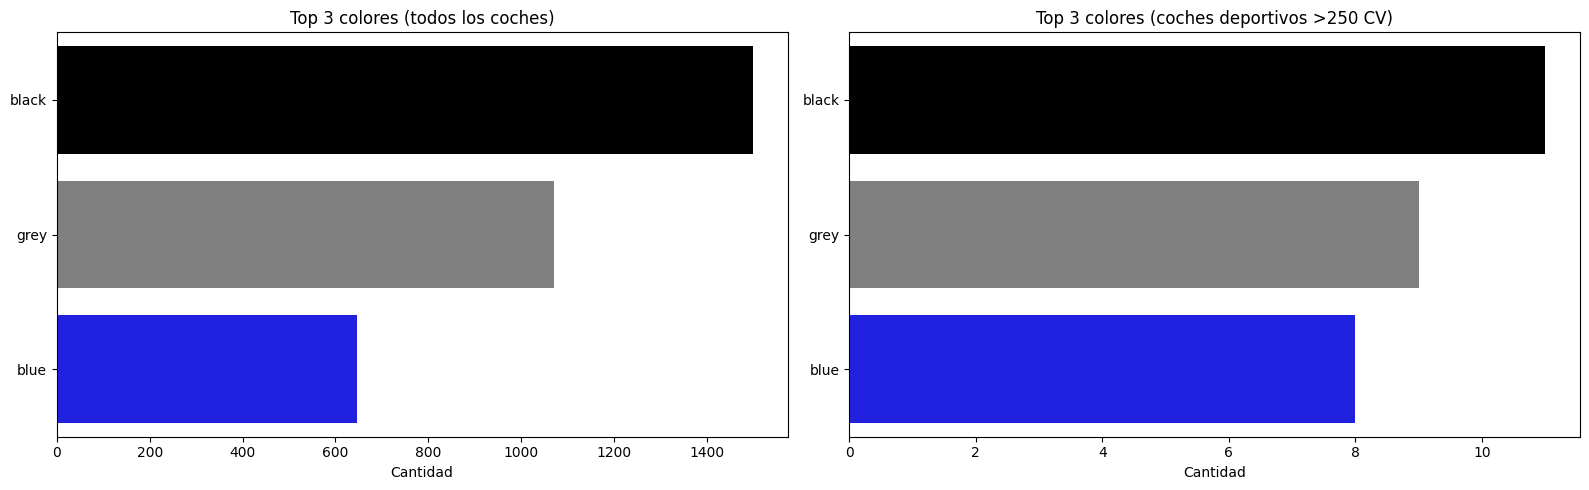

In [140]:
# Seleccionamos los 3 colores más comunes en cada grupo
colores_totales = bmw['color'].value_counts(ascending=False).head(3)
colores_deportivos = bmw[bmw['potencia'] > 250]['color'].value_counts(ascending=False).head(3)

# Creamos las paletas personalizadas a partir de los nombres de color
paleta_totales = colores_totales.index.tolist()
paleta_deportivos = colores_deportivos.index.tolist()

# --- Gráficos lado a lado ---
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico 1: Todos los coches
sns.barplot(
    x=colores_totales.values,
    y=colores_totales.index,
    ax=axes[0],
    palette=paleta_totales 
)
axes[0].set_title('Top 3 colores (todos los coches)')
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('')

# Gráfico 2: Coches deportivos
sns.barplot(
    x=colores_deportivos.values,
    y=colores_deportivos.index,
    ax=axes[1],
    palette=paleta_deportivos
)
axes[1].set_title('Top 3 colores (coches deportivos >250 CV)')
axes[1].set_xlabel('Cantidad')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE COLOR ESTANDAR**

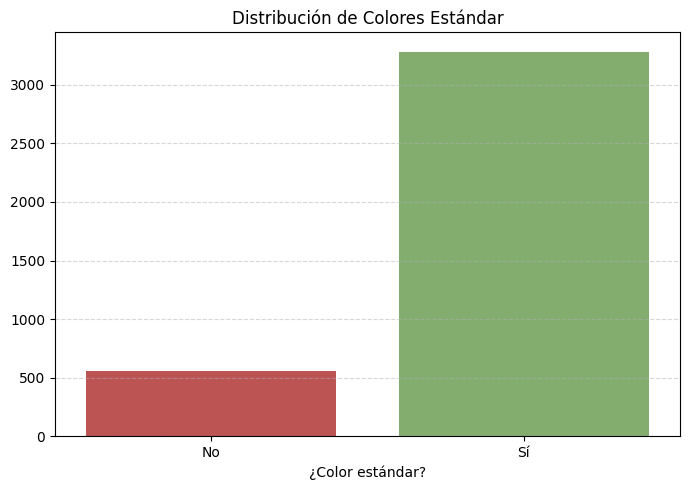

In [141]:
# Crear figura
plt.figure(figsize=(7,5))

# Gráfico de barras
sns.countplot(x='color_estandar', data=df_bmw, palette=['#CD4343', '#7FB765'])

# Títulos y etiquetas
plt.title('Distribución de Colores Estándar')
plt.xlabel('¿Color estándar?')
plt.ylabel('')
plt.xticks([0, 1], ['No', 'Sí'])

# Estética
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **6.3 - VARIABLES CATEGORICAS**

##### **MODELO**

<p align="center" style="font-size:16px;">
  <b>Total de modelos:</b> <span style="color:#7FB765;">76 únicos</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Modelo más frecuente:</b> <span style="color:#3A86FF;">320</span> &nbsp;&nbsp;|&nbsp;&nbsp; 
  <b>Frecuencia:</b> <span style="color:#f4a261;">739 vehículos</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>modelo</b> es de tipo categórico y representa la versión específica de cada vehículo (por ejemplo, <i>320d, X5 xDrive30d, M3 Competition</i>). El dataset contiene <b>76 modelos distintos</b>, siendo el más habitual el <b>320</b> con un total de <b>739 unidades</b>.<br><br>
Este dato refleja la popularidad del modelo <b>BMW Serie 3 (320)</b>, seguido por otros modelos de gama media como los <i>118, X1</i> o <i>520</i>.<br><br>
La variedad de modelos permite analizar diferencias de precio, como vemos en el gráfico vemos que los modelos más caros son <i>i8</i>, <i>M4</i> y <i>X6 M</i>.
</p>


##ESTADÍSTICAS BÁSICAS**

In [142]:
# Comprobamos la estadística descriptiva de la columna 'modelo'
df_bmw['modelo'].describe()

count     3841
unique      71
top        320
freq       605
Name: modelo, dtype: object

In [143]:
# Vemos la distribución de la columna 'modelo'
df_bmw['modelo'].value_counts()

modelo
320                605
520                507
318                447
X3                 331
116                279
                  ... 
M135                 1
635                  1
i8                   1
225                  1
214 Gran Tourer      1
Name: count, Length: 71, dtype: int64

In [144]:
# Comprobamos la distribución de la columna 'modelo'
distribuciones['modelo']

modelo
320                0.157280
520                0.131586
318                0.116792
X3                 0.086167
116                0.072671
                     ...   
M135               0.000260
635                0.000260
i8                 0.000260
225                0.000260
214 Gran Tourer    0.000260
Name: proportion, Length: 71, dtype: float64

**VISUALIZACIÓN DE LOS MODELOS MÁS USADOS (TOP 10)**

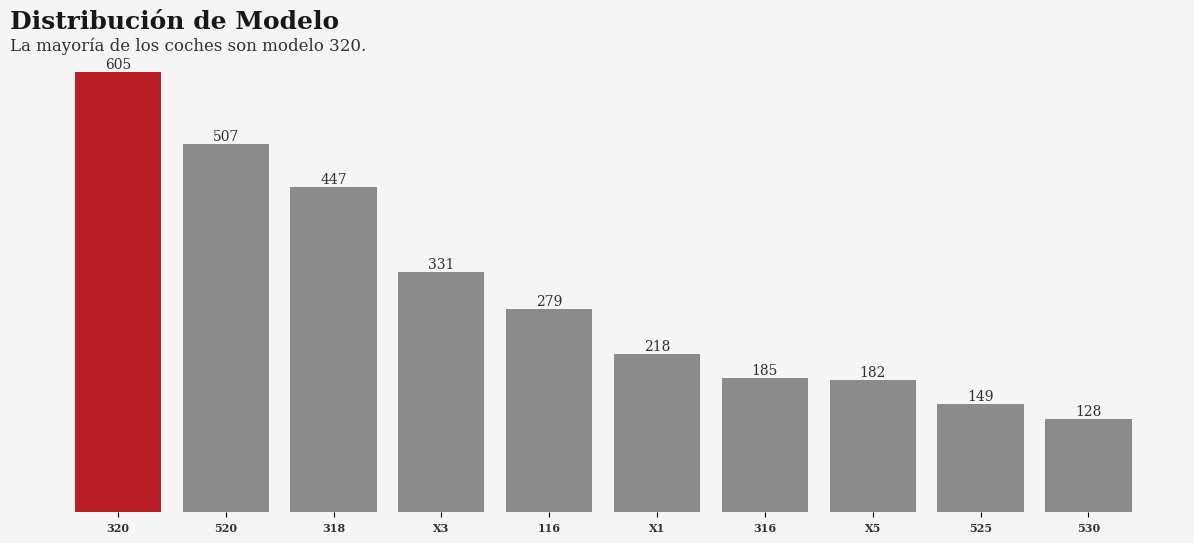

In [145]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

# Seleccionar los 10 modelos más comunes
a = df_bmw['modelo'].value_counts().head(10)

colors = ['#b20710'] + ['grey']*(len(a)-1)
ax.bar(x=a.index, height=a.values, color=colors, alpha=0.9)

# Añadir texto con el valor encima de cada barra
for i, v in enumerate(a.values):
    ax.text(i, v + 5, str(v), ha='center', fontdict={'font': 'serif', 'weight': 'normal', 'color': 'black', 'fontsize': 10}, alpha=0.8)

ax.text(-1, max(a.values) + max(a.values)*0.1, 'Distribución de Modelo', 
        fontdict={'font': 'serif', 'color': 'black', 'fontsize': 18, 'weight':'bold'}, alpha=0.9)
ax.text(-1, max(a.values) + max(a.values)*0.05, 'La mayoría de los coches son modelo 320.', 
        fontdict={'font': 'serif', 'color': 'black', 'fontsize': 12}, alpha=0.8)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)

ax.set_xticklabels(a.index, fontdict={'font': 'serif', 'color': 'black', 'fontsize': 8, 'weight':'bold'}, alpha=0.8)
ax.axes.get_yaxis().set_visible(False)

plt.show()

**VISUALIZACIÓN DE LOS MODELOS CON MAYOR PRECIO MEDIO (TOP 10)**

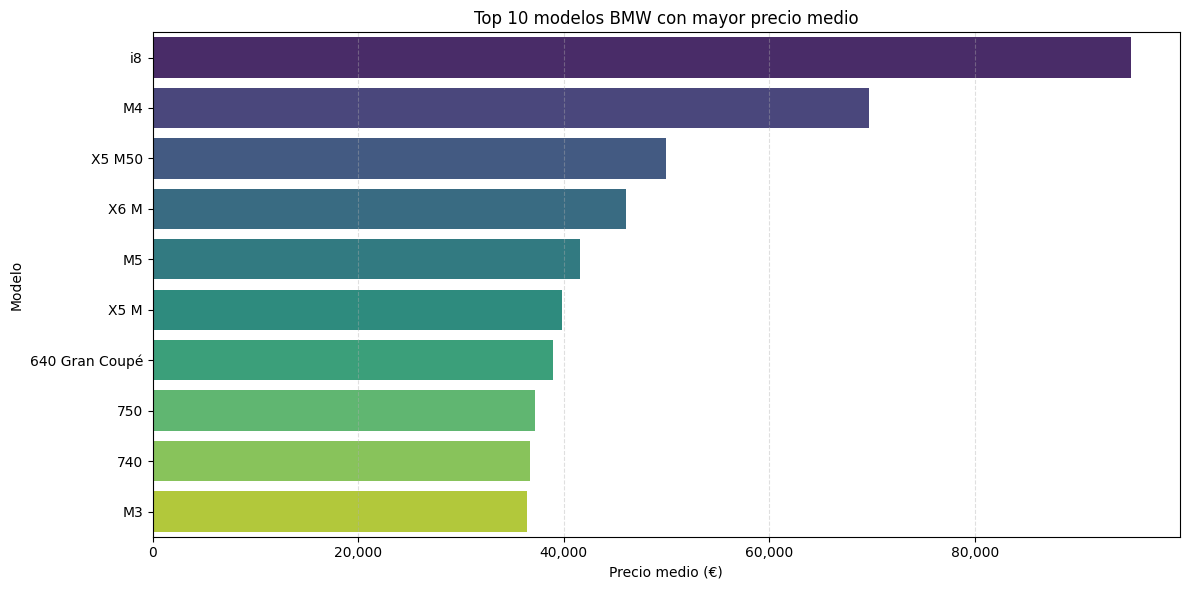

In [146]:
# Agrupar por modelo y calcular el precio medio
top_modelos = df_bmw.groupby('modelo')['precio'].mean().sort_values(ascending=False).head(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_modelos.values, y=top_modelos.index, palette='viridis')
plt.xlabel('Precio medio (€)')
plt.ylabel('Modelo')
plt.title('Top 10 modelos BMW con mayor precio medio')
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Formatear eje X con separadores de miles
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE MODELO**

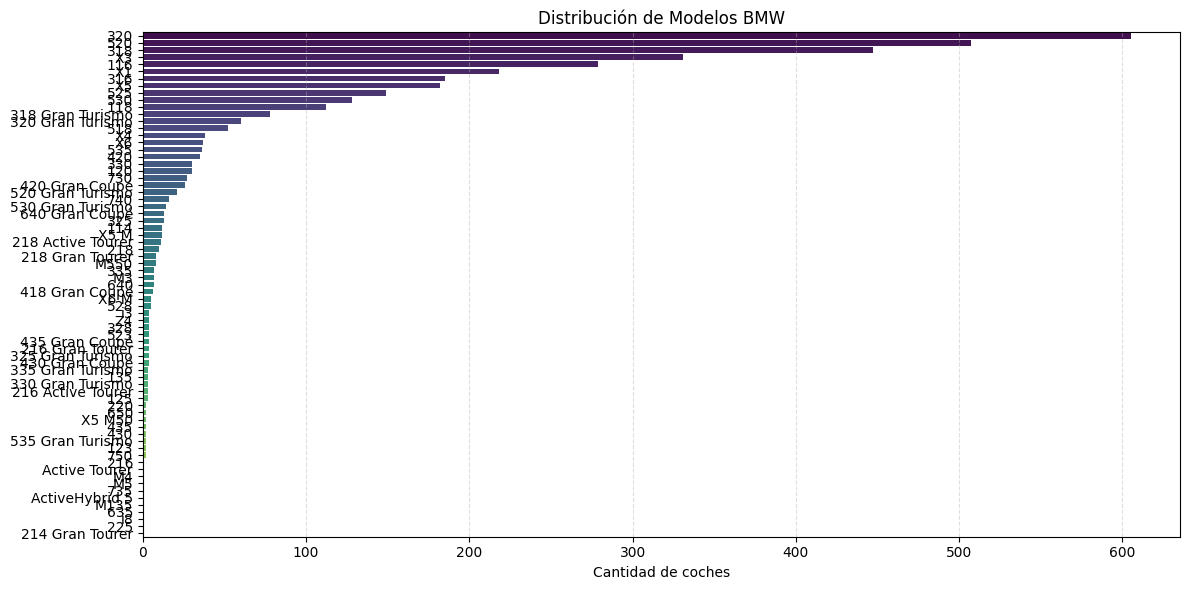

In [147]:
# Visualizar la distribución de los modelos
plt.figure(figsize=(12, 6))

# Gráfico de barras
sns.countplot(data=df_bmw, y='modelo', order=df_bmw['modelo'].value_counts().index, palette='viridis')
plt.title('Distribución de Modelos BMW')
plt.xlabel('Cantidad de coches')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


##### **TIPO COCHE**

<p align="center" style="font-size:16px;">
  <b>Total de categorías:</b> <span style="color:#7FB765;">8 tipos</span> &nbsp;&nbsp;|&nbsp;&nbsp;
  <b>Más frecuente:</b> <span style="color:#3A86FF;">Estate</span> &nbsp;&nbsp;|&nbsp;&nbsp;
  <b>Frecuencia:</b> <span style="color:#f4a261;">1720 vehículos</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>tipo_coche</b> clasifica los vehículos según su carrocería. Se identifican <b>8 categorías</b> diferentes, siendo la más común el formato <b>Estate (tipo familiar)</b> con <b>1.732 vehículos</b>, es decir, aproximadamente un <b>36%</b> del total.<br><br>

</p> 

**ESTADÍSTICA BÁSICA**

In [148]:
# Comprobamos la estadística descriptiva de la columna 'tipo_coche'
df_bmw['tipo_coche'].describe()

count       3841
unique         8
top       estate
freq        1371
Name: tipo_coche, dtype: object

In [149]:
# Vemos la distribución de la columna 'tipo_coche'
df_bmw['tipo_coche'].value_counts()

tipo_coche
estate         1371
sedan           856
suv             821
hatchback       582
coupe            82
subcompact       62
van              36
convertible      31
Name: count, dtype: int64

In [150]:
# Comprobamos la distribución de la columna 'tipo_coche'
distribuciones['tipo_coche']

tipo_coche
estate         0.356605
sedan          0.222684
suv            0.213600
hatchback      0.152349
coupe          0.021282
subcompact     0.016091
van            0.009343
convertible    0.008046
Name: proportion, dtype: float64

**VISUALIZACIÓN DE LA DISTRIBUCIÓN PORCENTUAL DE TIPO DE COCHE**

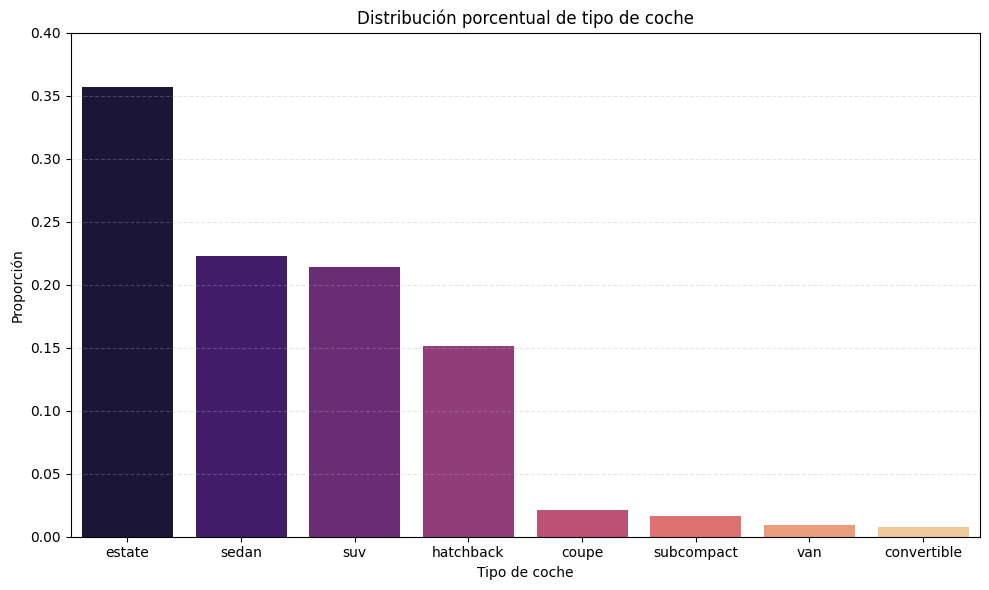

In [151]:
# Visualización
plt.figure(figsize=(10,6))

# Gráfico de barras
sns.barplot(
    x=df_bmw['tipo_coche'].value_counts(normalize=True).index,
    y=df_bmw['tipo_coche'].value_counts(normalize=True).values,
    palette='magma'
)

# Configuración del gráfico
plt.title('Distribución porcentual de tipo de coche')
plt.ylabel('Proporción')
plt.xlabel('Tipo de coche')
plt.ylim(0, 0.4)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**VISUALIZACIÓN DE LOS PRECIOS POR TIPO DE COCHE**

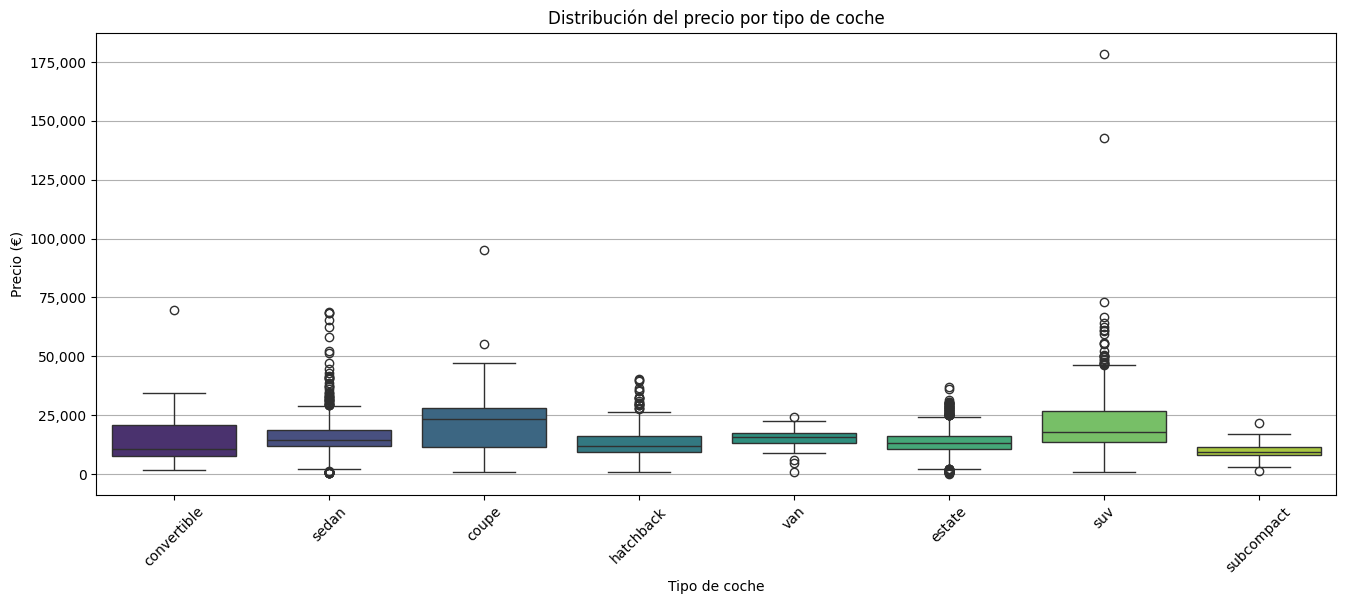

In [152]:
# Boxplot de precios por tipo de coche
plt.figure(figsize=(16,6))

# Boxplot por tipo de coche
sns.boxplot(data=df_bmw, x='tipo_coche', y='precio', palette='viridis')

# Configuración del gráfico
plt.title('Distribución del precio por tipo de coche')
plt.xlabel('Tipo de coche')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.show()

##### **AÑOS DEL COCHE**

<p align="center" style="font-size:16px;">
  <b>Total de categorías:</b> <span style="color:#7FB765;">7 rangos</span> &nbsp;&nbsp;|&nbsp;&nbsp;
  <b>Más frecuente:</b> <span style="color:#3A86FF;">4-6 años</span> &nbsp;&nbsp;|&nbsp;&nbsp;
  <b>Frecuencia:</b> <span style="color:#f4a261;">3868 vehículos</span>
</p>

---

<p style="max-width:1200px; margin:auto; line-height:1.5; text-align: justify;">
La variable <b>años_coche</b> agrupa los vehículos según su antigüedad, permitiendo analizar patrones de uso y desgaste. El rango más común es <b>de 4 a 6 años</b>, que concentra la mayoría de los vehículos del conjunto de datos, con un total de <b>3.868 coches</b>, lo que representa aproximadamente un <b>80.8%</b> del total. <br><br>
Los vehículos más nuevos (1-3 años) representan un <b>7.25%</b>, mientras que los más antiguos (mayores de 10 años) son casos mucho más escasos, destacando la categoría <b>>25 años</b> con tan solo <b>1 unidad</b> registrada.
</p>

**ESTADÍSTICA BÁSICA**

In [153]:
# Comprobamos la estadística descriptiva de la columna 'edad_coche'
df_bmw['edad_coche'].describe()

count     3841
unique       6
top        4-6
freq      3076
Name: edad_coche, dtype: object

In [154]:
# Vemos la distribución de la columna 'tipo_coche'
df_bmw['edad_coche'].value_counts()

edad_coche
4-6      3076
1-3       295
7-10      282
11-15     150
16-20      31
21-25       7
>25         0
Name: count, dtype: int64

In [155]:
# Comprobamos la distribución de la columna 'edad_coche'
distribuciones['edad_coche']

edad_coche
4-6      0.800934
1-3      0.076564
7-10     0.073190
11-15    0.039190
16-20    0.008046
21-25    0.001817
>25      0.000260
Name: proportion, dtype: float64

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DE EDAD COCHE**

In [156]:
# Datos de distribución
labels = ['1-3', '4-6', '7-10', '11-15', '16-20', '21-25', '>25']
valores = [347, 3868, 336, 189, 40, 7, 1]

# Asegurar orden correcto
x_labels = labels
y_vals = valores

# Crear figura
fig = go.Figure()

# Línea de tendencia con marcadores
fig.add_trace(go.Scatter(
    x=x_labels,
    y=y_vals,
    mode='lines+markers',
    name='Distribución',
    line=dict(color='#3A86FF', width=3),
    marker=dict(symbol='circle', size=10, color='#3A86FF'),
    text=[f'{v:,}' for v in y_vals],
    textposition='top center'
))

# Configuración del gráfico
fig.update_layout(
    title="Distribución de la variable EDAD COCHE",
    xaxis_title="Rango de años del coche",
    yaxis_title="",
    template='plotly_white',
    width=1000,
    height=470,
    plot_bgcolor='#e6e6e7',
    paper_bgcolor='#e6e6e7',
    xaxis=dict(
        tickfont=dict(color='black'),
        title_standoff=20
    )
)

fig.show()

**VISUALIZACIÓN DE LA DISTRIBUCIÓN DEL PRECIO SEGÜN LA EDAD DEL COCHE**

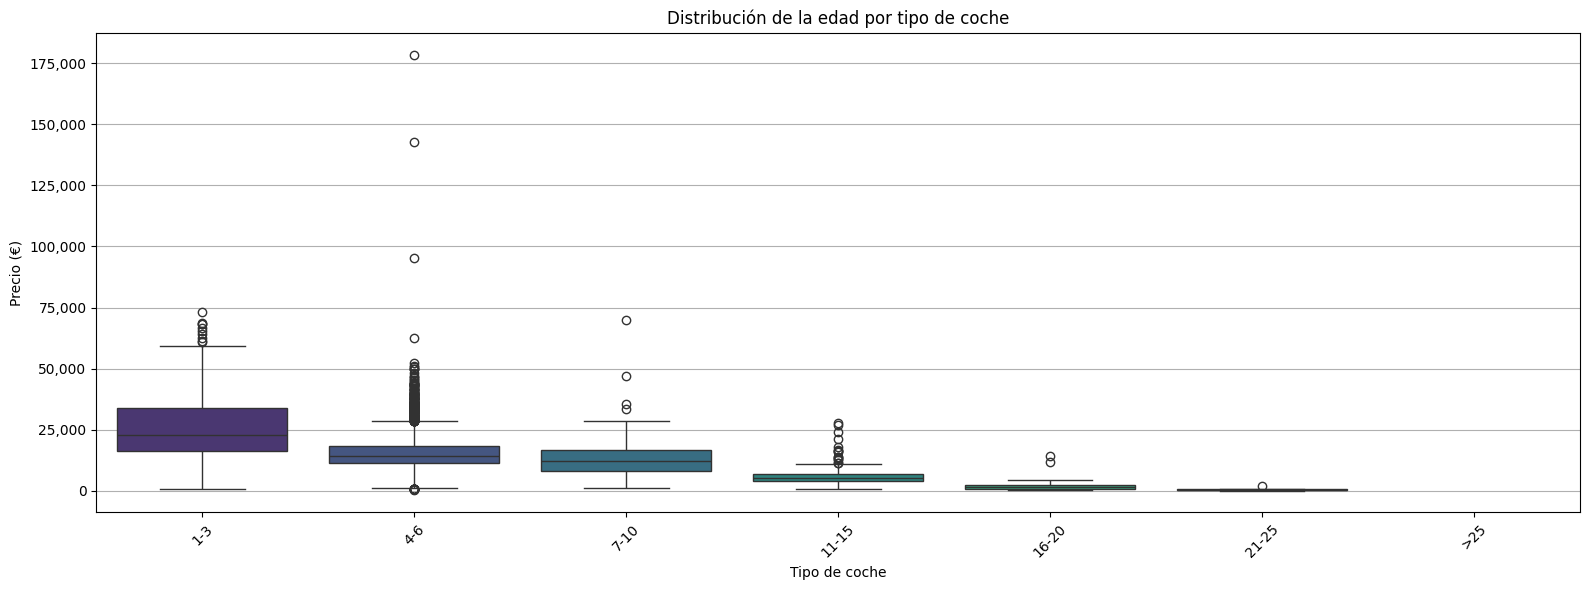

In [157]:
# Crear figura
plt.figure(figsize=(16,6))

# Boxplot por edad del coche
sns.boxplot(data=df_bmw, x='edad_coche', y='precio', palette='viridis')
plt.title('Distribución de la edad por tipo de coche')
plt.xlabel('Tipo de coche')
plt.ylabel('Precio (€)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

### **6.4 - CORRELACIÓN INCIAL**

**Análisis de la matriz de correlación:**

- `Potencia` tiene correlación positiva con el precio (**0.64**). Esto nos indica que, los vehículos con mayor potencia tienden a tener precios más altos.
- `Cantidad_extras` también está correlacionada positivamente con el precio (**0.45**), lo que sugiere que los coches con más equipamiento suelen ser más caros.
- Otras variables como `alerta_lim_velocidad` (**0.45**), `elevalunas_electrico` (**0.26**), `volante_regulable` (**0.27**), `camara_trasera` (**0.25**) y `aire_acondicionado` (**0.24**) también tienen correlaciones moderadas con el precio, lo que refuerza la relación entre el equipamiento y el precio del vehículo.
- Por el contrario, los **kilómetros** (`km`) presentan una correlación negativa significativa con el precio (**-0.41**), lo que implica que los vehículos más usados tienden a ser más baratos.


**Otras observaciones:**

- `Potencia` se relaciona de forma positiva con `cantidad_extras` (**0.51**), esto nos sugiere que los vehículos más potentes suelen estar mejor equipados.
- La variable `color_estandar` no presenta correlaciones destacables con ninguna otra variable, por lo que según lo que sospechabamos podría aportar muy baja utilidad al modelo.
- La variable `cantidad_extras` tiene alta correlación con las variables de equipamiento, lo cual es lógico al haber sido calculada con estas.

En una casuistica real, eliminariamos la columna de `cantidad_extras` y estudiariamos si eliminar `color_estandar` realizando comprobaciones con el resultado del modelo. En este caso de ejercicio, dejaremos esta variables ya que nos parecen representativas.

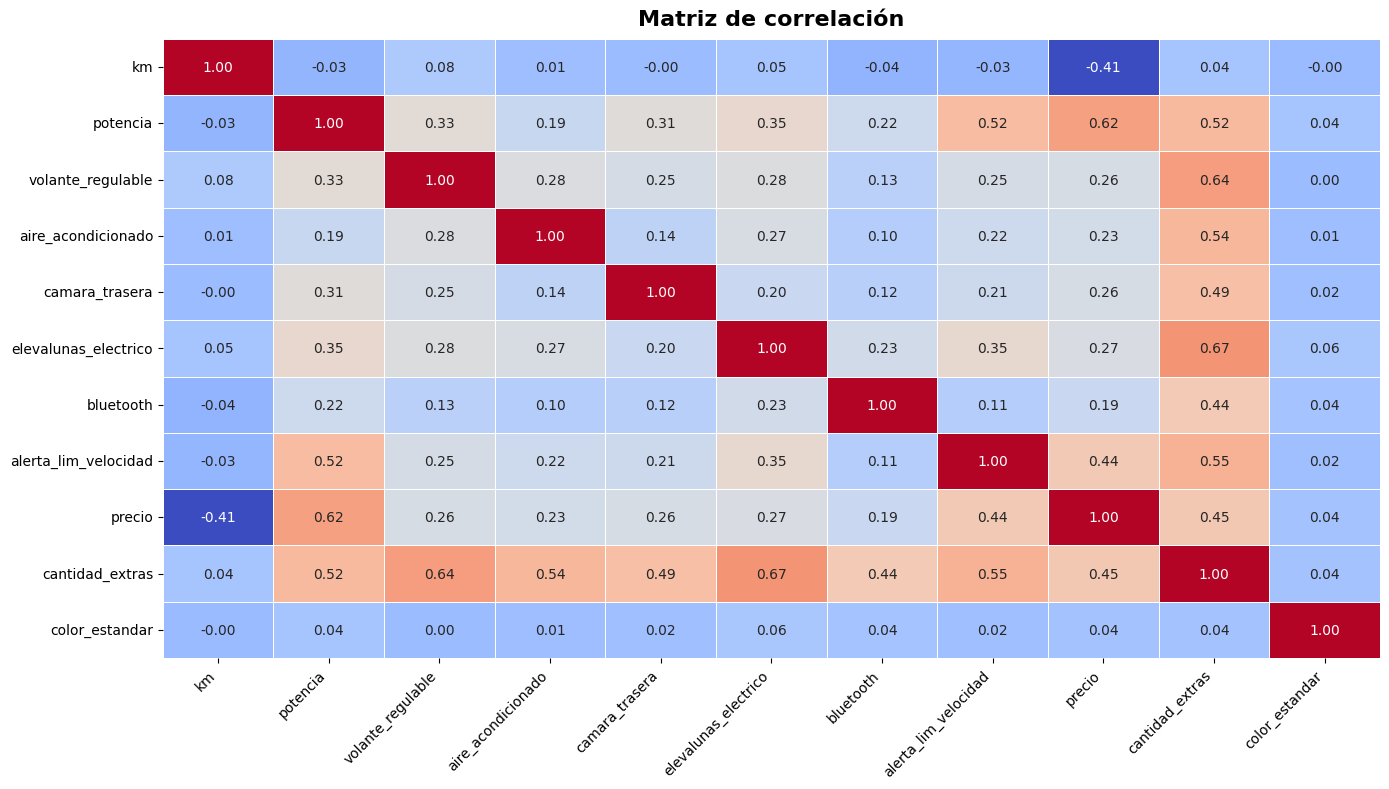

In [158]:
# Crear figura
plt.figure(figsize=(14, 8))
# Correlación entre variables numéricas
corr = df_bmw.corr(numeric_only=True)

# Mapa de calor para visualizar la correlación
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=False )
plt.title("Matriz de correlación", fontsize=16, weight='bold', pad=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **6.5 - VARIABLES VS TARGET (PRECIO)**

La función `analizar_variable_vs_target()` nos permite visualizar y entender cómo se relacionan las distintas variables del dataset con la variable target, que en este caso es **precio**. A continuación, se resumen algunas observaciones sobre los gráficos:

**1. Variables Numéricas vs Precio**

- **Kilómetros:** Existe una clara relación inversa entre el kilometraje y el precio. Los vehículos con menos kilómetros tienden a tener precios más altos.

- **Potencia:** Se observa una correlación positiva, los coches con mayor potencia suelen tener precios más elevados.

- **Cantidad de extras:** Observamos una correlación positiva, los coches que tienen mayor cantidad de extras suelen tener mayor precio.

**2. Variables Categóricas vs Precio**

- **Tipo de coche:** Los boxplots muestran diferencias notables de precio según el tipo. Por ejemplo, los modelos deportivos y SUV suelen tener precios medios superiores a los compactos o familiares.

- **Años del coche:** Los vehículos más nuevos (menos años) presentan precios más altos, mientras que los más antiguos tienden a ser más económicos.

**3. Variables Booleanas vs Precio**

- **Equipamiento (aire acondicionado, bluetooth, cámara trasera, etc.):** Los coches que disponen de equipamientos suelen tener precios más altos. La diferencia de precio es especialmente visible en variables como aire acondicionado, cámara trasera y volante regulable.

- **Color estándar:** La diferencia no es tan marcada como en otras variables, por lo que no podemos extraer unas conclusiones claras.

In [159]:
# Función para analizar la relación entre variables y el target 'precio', según el tipo de variable

def analizar_variable_vs_target(df):
    target = 'precio'
    plt.rcParams['figure.figsize'] = (10, 6)
    
    # Detectar variables numéricas (int y float) excluyendo el target
    variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    if target in variables_numericas:
        variables_numericas.remove(target)
    
    # Detectar variables categóricas (objetos o categorías)
    variables_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Detectar variables booleanas
    variables_booleans = df.select_dtypes(include=['bool']).columns.tolist()
    
    print(f"Variables numéricas: {variables_numericas}")
    print(f"Variables categóricas: {variables_categoricas}")
    print(f"Variables booleanas: {variables_booleans}")
    
    # 1. Análisis Numérico vs Target
    for var in variables_numericas:
        plt.figure()
        sns.scatterplot(data=df, x=var, y=target, alpha=0.5)
        sns.regplot(data=df, x=var, y=target, scatter=False, color='red')
        plt.title(f'Relación entre {var} y {target}')
        plt.xlabel(var)
        plt.ylabel(target)
        plt.show()
    
    # 2. Análisis Categórico vs Target
    for var in variables_categoricas:
        plt.figure()
        sns.boxplot(data=df, x=var, y=target)
        plt.title(f'Precio según la categoría de {var}')
        plt.xlabel(var)
        plt.ylabel(target)
        plt.xticks(rotation=45)
        plt.show()
        
    
    # 3. Análisis Boolean vs Target
    for var in variables_booleans:
        plt.figure()
        sns.boxplot(data=df, x=var, y=target)
        plt.title(f'Precio según presencia de {var}')
        plt.xlabel(var)
        plt.ylabel(target)
        plt.xticks([0,1], ['No', 'Sí'])
        plt.show()

Variables numéricas: ['km', 'potencia', 'cantidad_extras']
Variables categóricas: ['modelo', 'tipo_coche', 'edad_coche']
Variables booleanas: ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad', 'color_estandar']


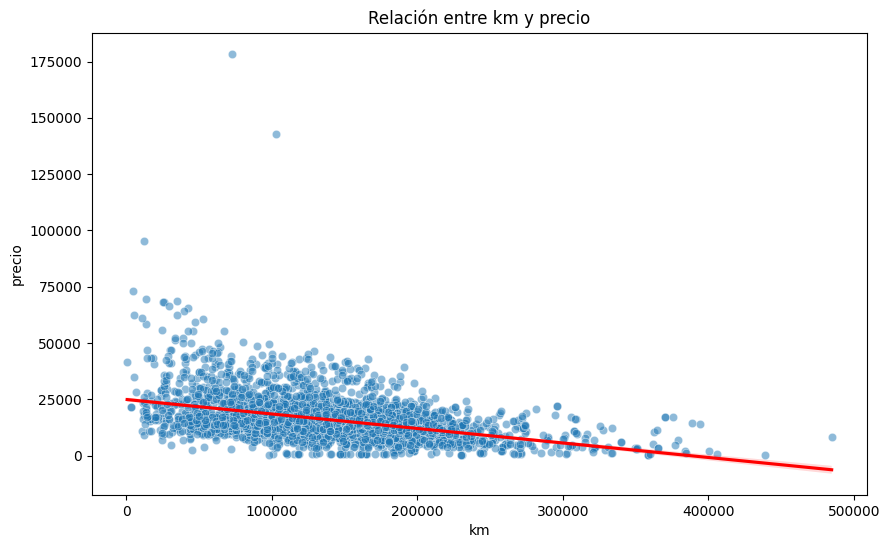

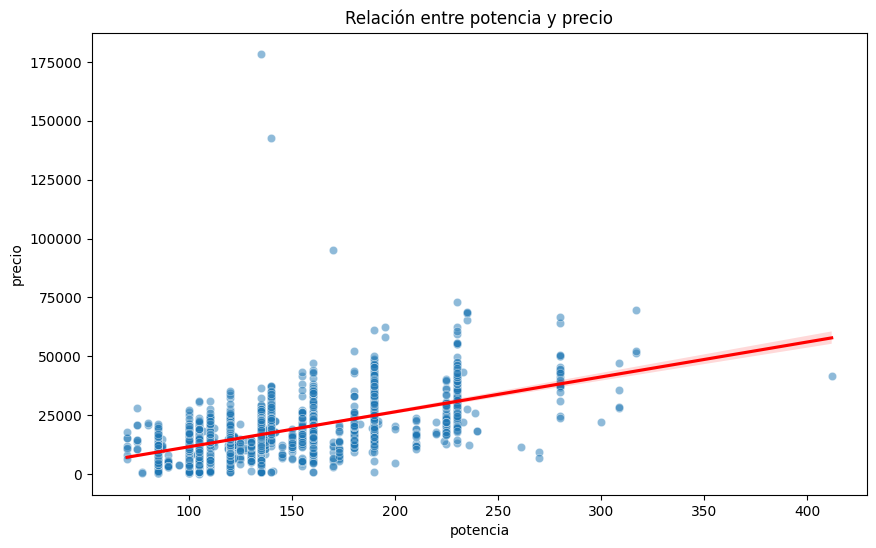

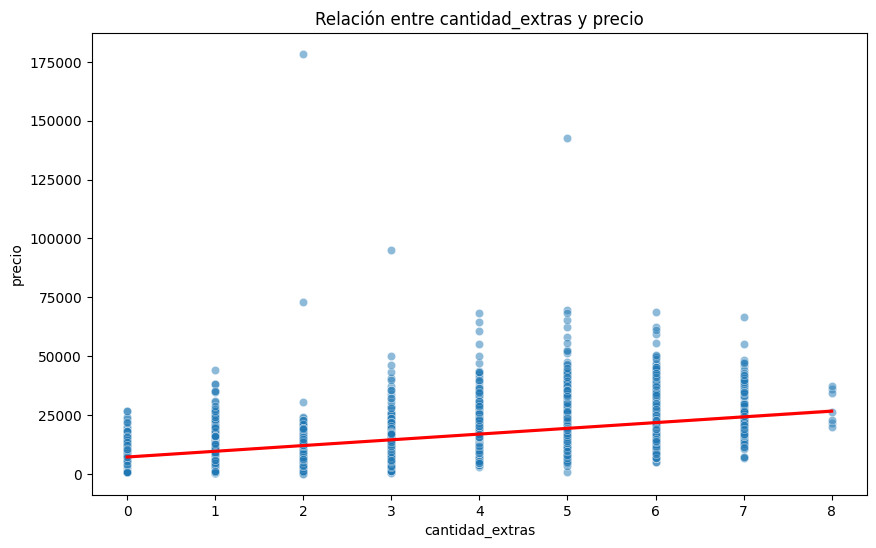

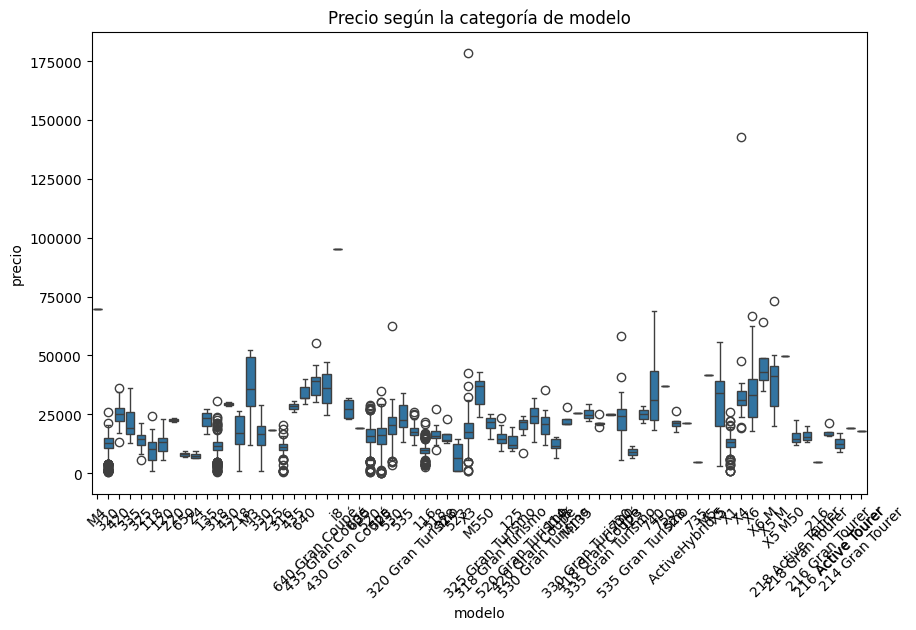

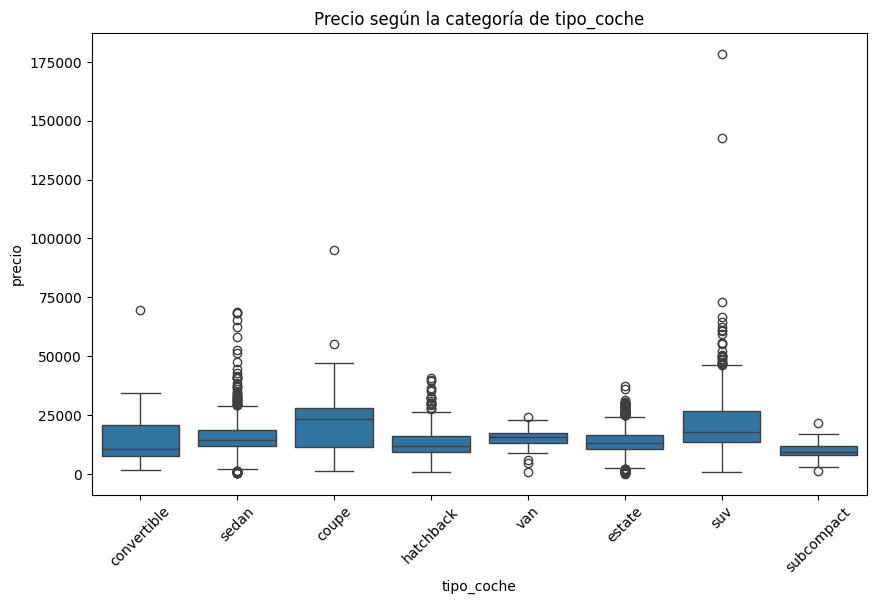

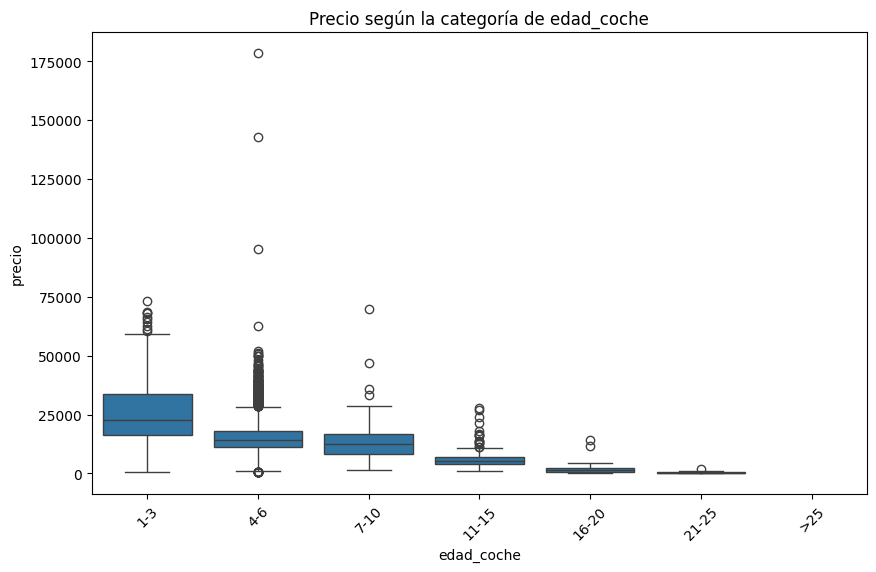

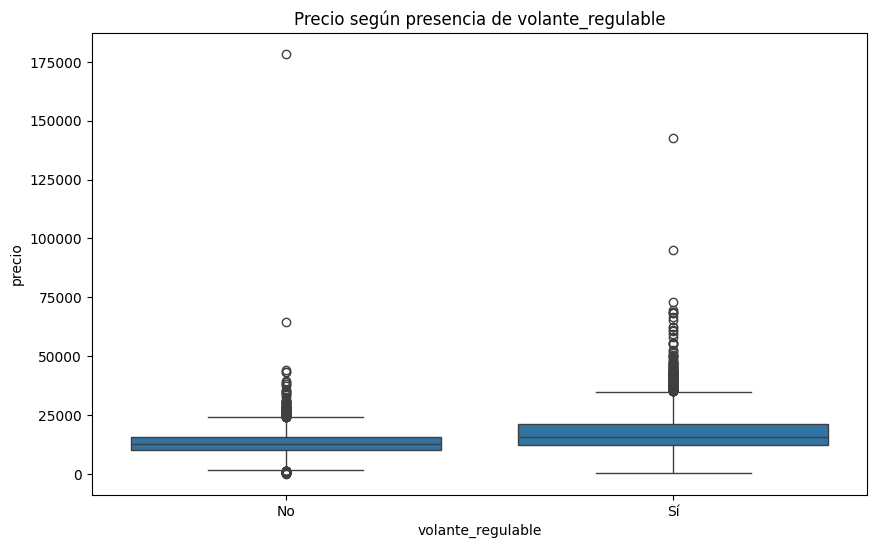

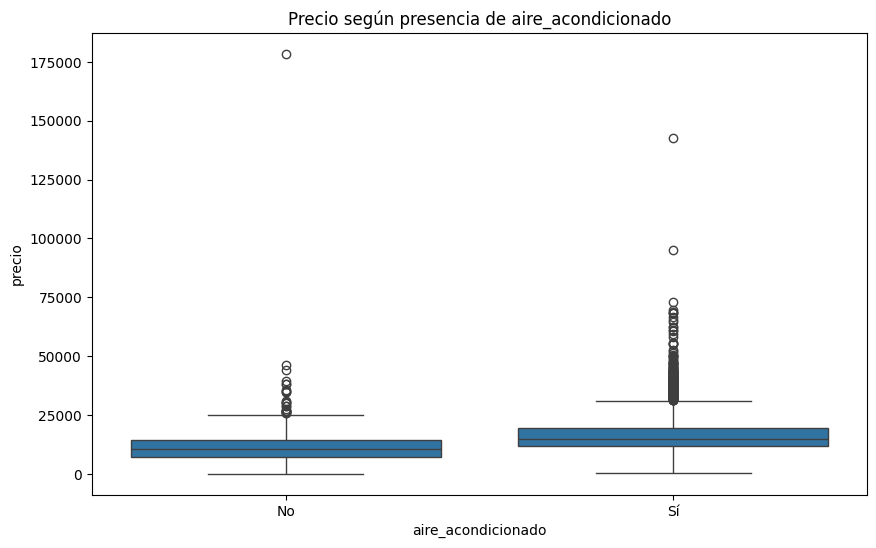

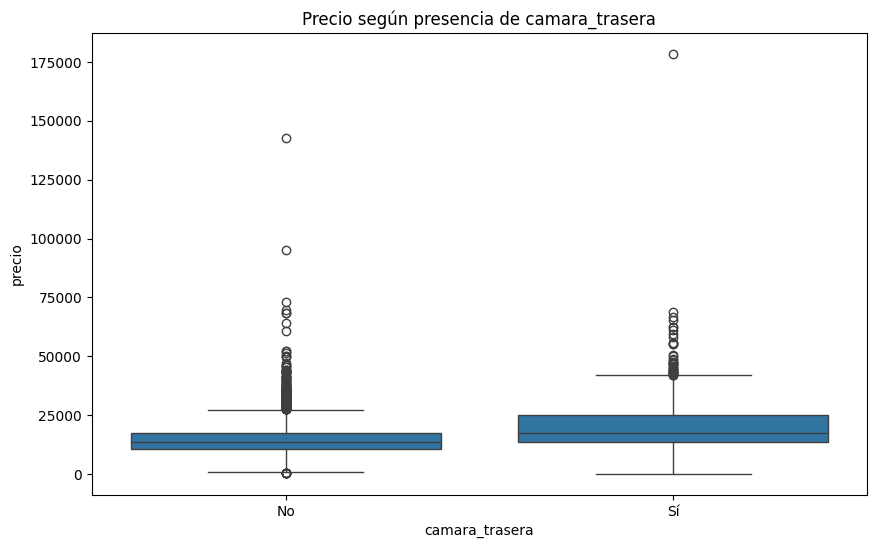

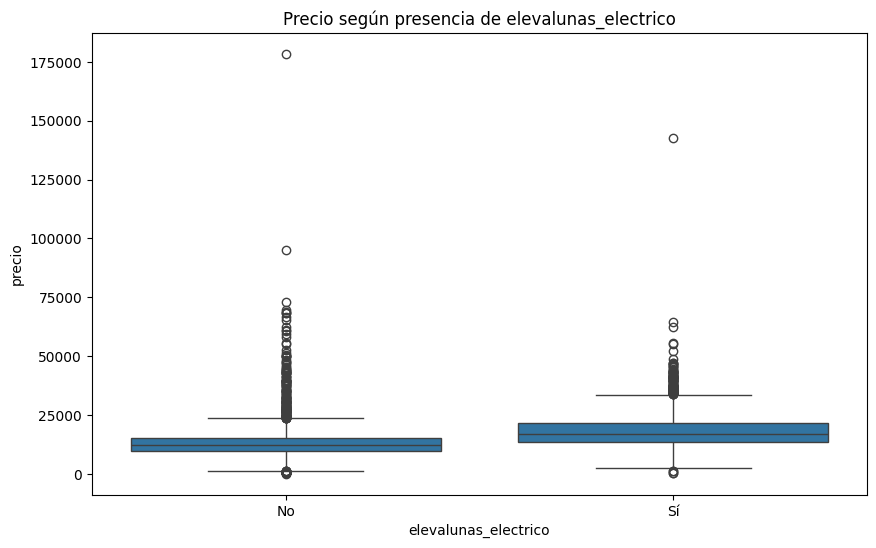

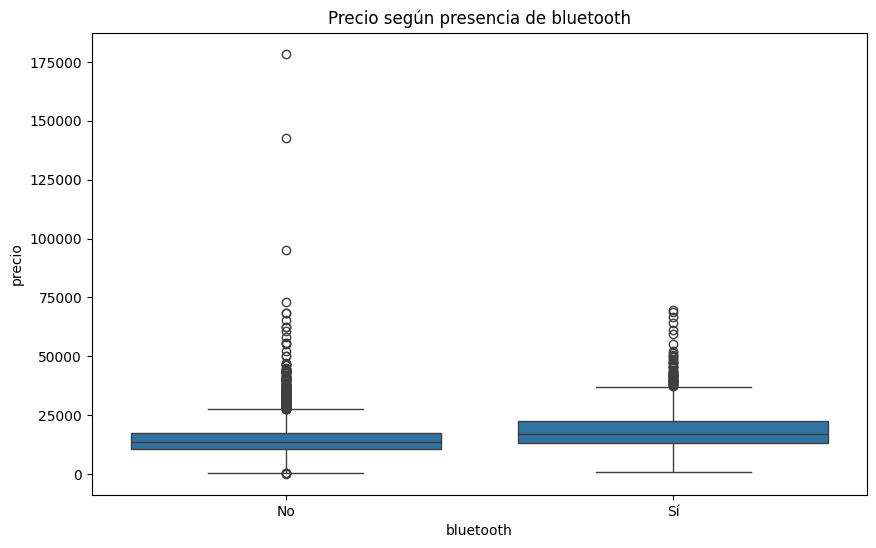

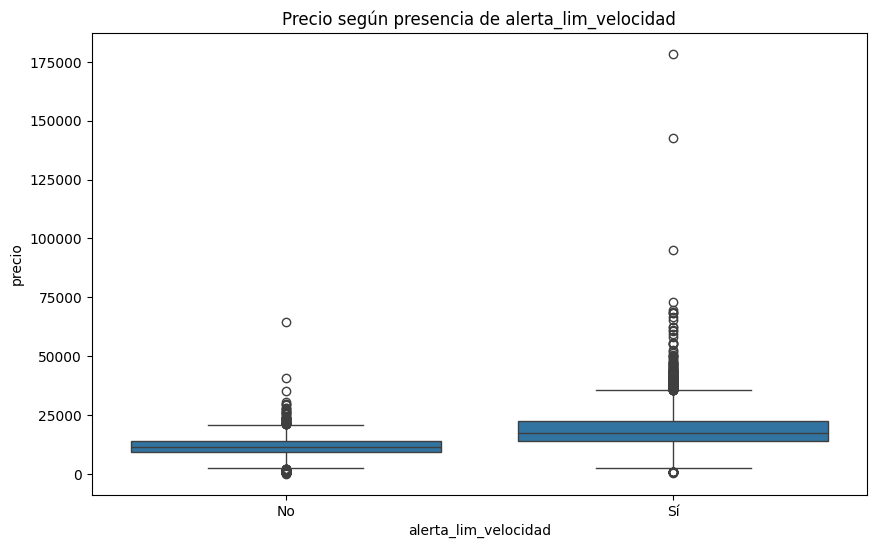

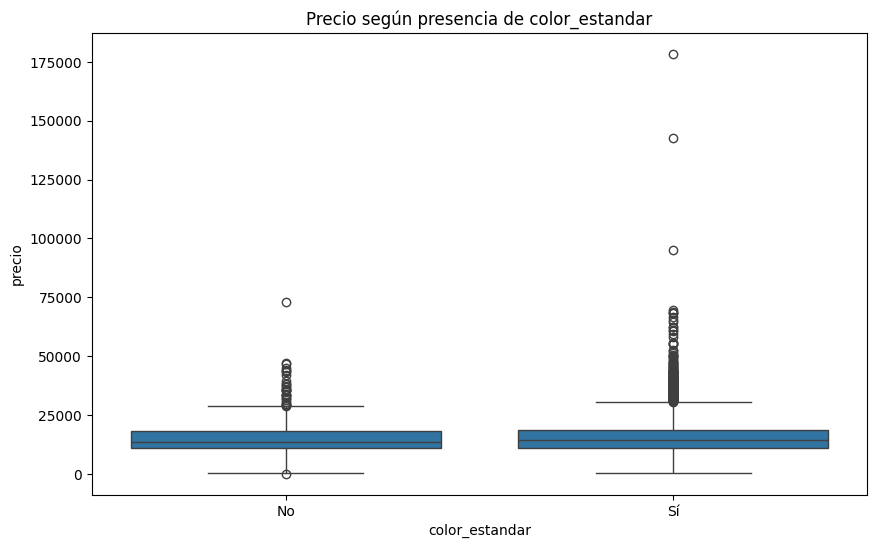

In [160]:
analizar_variable_vs_target(df_bmw)

## **07 - TRANSFORMACIÓN DE VARIABLES**

In [161]:
# Observación de la información del DataFrame
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3841 entries, 0 to 3852
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   modelo                3841 non-null   object  
 1   km                    3841 non-null   float64 
 2   potencia              3841 non-null   float64 
 3   tipo_coche            3841 non-null   object  
 4   volante_regulable     3841 non-null   boolean 
 5   aire_acondicionado    3841 non-null   bool    
 6   camara_trasera        3841 non-null   boolean 
 7   elevalunas_electrico  3841 non-null   boolean 
 8   bluetooth             3841 non-null   bool    
 9   alerta_lim_velocidad  3841 non-null   bool    
 10  precio                3841 non-null   float64 
 11  cantidad_extras       3841 non-null   int64   
 12  edad_coche            3841 non-null   category
 13  color_estandar        3841 non-null   bool    
dtypes: bool(4), boolean(3), category(1), float64(3), int64(1), ob

In [162]:
# Definimos la variable objetivo
target = 'precio'

In [163]:
# Función para obtener listas de variables numéricas, booleanas y categóricas

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i","b")) and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

# Ejecutar la función para obtener las listas de variables
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_bmw)


In [164]:
print("La variables numericas son: ", lista_numericas)
print("La variables booleanas son: ", lista_boolean)
print("La variables categoricas son: ", lista_categoricas)
print("La variable target es: ", target)

La variables numericas son:  ['km', 'potencia', 'cantidad_extras']
La variables booleanas son:  ['volante_regulable', 'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico', 'bluetooth', 'alerta_lim_velocidad', 'color_estandar']
La variables categoricas son:  ['modelo', 'tipo_coche', 'edad_coche']
La variable target es:  precio


In [165]:
# Convertimos todas las columnas de lista_boolen a tipo int
for col in lista_boolean:
    df_bmw[col] = df_bmw[col].astype(int)

# Comprobamos que se han convertido correctamente
print(df_bmw[lista_boolean].dtypes)

volante_regulable       int64
aire_acondicionado      int64
camara_trasera          int64
elevalunas_electrico    int64
bluetooth               int64
alerta_lim_velocidad    int64
color_estandar          int64
dtype: object


### **7.1 - CODIFICACIÓN DE VARIABLES**

**TRANSFORMACIÓN DE LA VARIABLE MODELO**

Vamos a dividir los modelos en serie, subseries o subcategorías, para facilitar el analisis

In [166]:
# Comprobamos los valores únicos de la columna 'modelo'
valores_unicos = sorted(df_bmw["modelo"].unique())

# Imprimimos los valores únicos de la columna 'modelo'
print(valores_unicos)

['114', '116', '118', '120', '123', '125', '135', '214 Gran Tourer', '216', '216 Active Tourer', '216 Gran Tourer', '218', '218 Active Tourer', '218 Gran Tourer', '220', '225', '316', '318', '318 Gran Turismo', '320', '320 Gran Turismo', '325', '325 Gran Turismo', '328', '330', '330 Gran Turismo', '335', '335 Gran Turismo', '418 Gran Coupé', '420', '420 Gran Coupé', '430', '430 Gran Coupé', '435', '435 Gran Coupé', '518', '520', '520 Gran Turismo', '523', '525', '528', '530', '530 Gran Turismo', '535', '535 Gran Turismo', '635', '640', '640 Gran Coupé', '650', '730', '735', '740', '750', 'Active Tourer', 'ActiveHybrid 5', 'M135', 'M3', 'M4', 'M5', 'M550', 'X1', 'X3', 'X4', 'X5', 'X5 M', 'X5 M50', 'X6', 'X6 M', 'Z4', 'i3', 'i8']


In [167]:
# Realizamos una transformación de la columna 'modelo' agrupando los modelos haciendo algo parecido a un OneHotEncoding, pero de maner manual

# Patrones base por serie
df_bmw["modelo_serie_1"] = ((df_bmw["modelo"].str.contains(r'1\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]1'))).astype(int)
df_bmw["modelo_serie_2"] = ((df_bmw["modelo"].str.contains(r'2\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]2'))).astype(int)
df_bmw["modelo_serie_3"] = ((df_bmw["modelo"].str.contains(r'3\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]3'))).astype(int)
df_bmw["modelo_serie_4"] = ((df_bmw["modelo"].str.contains(r'4\d{2}\b') | df_bmw["modelo"].str.match(r'^[a-zA-Z]4')) & ~df_bmw["modelo"].str.contains("Z")).astype(int)
df_bmw["modelo_serie_5"] = ((df_bmw["modelo"].str.contains(r'5\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]5'))).astype(int)
df_bmw["modelo_serie_6"] = ((df_bmw["modelo"].str.contains(r'6\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]6'))).astype(int)
df_bmw["modelo_serie_7"] = ((df_bmw["modelo"].str.contains(r'7\d{2}\b')) | (df_bmw["modelo"].str.match(r'^[a-zA-Z]7'))).astype(int)

# Líneas especiales o subseries
df_bmw["modelo_X"] = df_bmw["modelo"].str.contains("X").astype(int)
df_bmw["modelo_M"] = df_bmw["modelo"].str.contains("M").astype(int)
df_bmw["modelo_Z"] = df_bmw["modelo"].str.contains("Z").astype(int)
df_bmw["modelo_i"] = df_bmw["modelo"].str.contains(r'^i\d\b').astype(int)

# Subcategorías por nombre
df_bmw["modelo_Gran_Coupe"] = df_bmw["modelo"].str.contains("Gran Coupé").astype(int)
df_bmw["modelo_Active_Tourer"] = df_bmw["modelo"].str.contains("Active Tourer|^Active Tourer$").astype(int)
df_bmw["modelo_Gran_Tourer"] = df_bmw["modelo"].str.contains("Gran Tourer").astype(int)
df_bmw["modelo_Gran_Turismo"] = df_bmw["modelo"].str.contains("Gran Turismo").astype(int)
df_bmw["modelo_ActiveHybrid"] = df_bmw["modelo"].str.contains("ActiveHybrid").astype(int)

In [168]:
# Eliminamos la columna 'modelo' original
df_bmw.drop(columns='modelo', inplace=True)

# Comprobamos que se han creado las nuevas columnas correctamente
print(df_bmw.columns)

Index(['km', 'potencia', 'tipo_coche', 'volante_regulable',
       'aire_acondicionado', 'camara_trasera', 'elevalunas_electrico',
       'bluetooth', 'alerta_lim_velocidad', 'precio', 'cantidad_extras',
       'edad_coche', 'color_estandar', 'modelo_serie_1', 'modelo_serie_2',
       'modelo_serie_3', 'modelo_serie_4', 'modelo_serie_5', 'modelo_serie_6',
       'modelo_serie_7', 'modelo_X', 'modelo_M', 'modelo_Z', 'modelo_i',
       'modelo_Gran_Coupe', 'modelo_Active_Tourer', 'modelo_Gran_Tourer',
       'modelo_Gran_Turismo', 'modelo_ActiveHybrid'],
      dtype='object')


In [169]:
# Listado de columnas con sus values counts

for col in df_bmw.columns:
    if col.startswith('modelo_'):
        print(df_bmw[col].value_counts())
        print("------")

modelo_serie_1
0    3181
1     660
Name: count, dtype: int64
------
modelo_serie_2
0    3800
1      41
Name: count, dtype: int64
------
modelo_serie_3
0    2060
1    1781
Name: count, dtype: int64
------
modelo_serie_4
0    3723
1     118
Name: count, dtype: int64
------
modelo_serie_5
0    2718
1    1123
Name: count, dtype: int64
------
modelo_serie_6
0    3776
1      65
Name: count, dtype: int64
------
modelo_serie_7
0    3795
1      46
Name: count, dtype: int64
------
modelo_X
0    3016
1     825
Name: count, dtype: int64
------
modelo_M
0    3804
1      37
Name: count, dtype: int64
------
modelo_Z
0    3837
1       4
Name: count, dtype: int64
------
modelo_i
0    3836
1       5
Name: count, dtype: int64
------
modelo_Gran_Coupe
0    3788
1      53
Name: count, dtype: int64
------
modelo_Active_Tourer
0    3826
1      15
Name: count, dtype: int64
------
modelo_Gran_Tourer
0    3828
1      13
Name: count, dtype: int64
------
modelo_Gran_Turismo
0    3656
1     185
Name: count, dtype:

**TRANSFORMACIÓN VARIABLE EDAD_COCHE**

Para evitar utilizar OneHotEncoder en todas las variables categóricas, en el caso de la variable edad_coche optamos por usar OrdinalEncoder, ya que tiene una lógica de orden natural. Cuanto menor es el número de años, más nuevo es el coche, y por tanto, mejor debería ser su estado y mayor su valor.

In [170]:
# Definimos el orden lógico de las categorías para los rangos de años del coche.Cuanto menor es el rango, más nuevo es el coche.
orden = [['1-3', '4-6', '7-10', '11-15', '16-20', '21-25', '>25']] 

# Creamos el encoder
encoder_1 = OrdinalEncoder(categories=orden)

# Aplicamos el encoder a la columna 'edad_coche' y guardamos el resultado en una nueva columna
df_bmw["edad_coche_ordinal"] = encoder_1.fit_transform(df_bmw[["edad_coche"]])

In [171]:
# Listamos la relación de valores entre la columna 'edad_coche' y su versión ordinal
print(df_bmw[["edad_coche", "edad_coche_ordinal"]].drop_duplicates().sort_values("edad_coche_ordinal"))

# Eliminamos la columna original 'edad_coche' ya que ahora tenemos su versión numérica
df_bmw.drop(columns='edad_coche', inplace=True)

   edad_coche  edad_coche_ordinal
9         1-3                 0.0
1         4-6                 1.0
0        7-10                 2.0
14      11-15                 3.0
27      16-20                 4.0
18      21-25                 5.0


**TRANSFORMACIÓN RESTO DE VARIABLES CATEGORICAS**

Para el resto de variables categoricas vamos usar OneHotEncoder:

In [172]:
# Volvemos a obtener las listas de variables
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_bmw)

# Creamos el encoder
encoder_2 = OneHotEncoder(sparse_output=False)

# Aplicamos one-hot encoding a las columnas categóricas
data_encoded = encoder_2.fit_transform(df_bmw[lista_categoricas])

# Creamos un DataFrame con las columnas codificadas
df_encoded = pd.DataFrame(data_encoded, columns=encoder_2.get_feature_names_out(lista_categoricas), index=df_bmw.index)

# Hacemos merge con el df original
df_bmw = df_bmw.merge(df_encoded, left_index=True, right_index=True)

# Eliminamos las columnas categóricas originales
df_bmw.drop(columns=lista_categoricas, inplace=True)

df_bmw

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,...,modelo_ActiveHybrid,edad_coche_ordinal,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,13929.0,317.0,1,1,0,0,1,1,69700.0,5,...,0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,183297.0,120.0,0,0,0,1,0,0,10200.0,2,...,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,128035.0,135.0,1,1,0,1,1,1,25100.0,5,...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,152352.0,225.0,1,1,0,1,1,1,17100.0,6,...,0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,205219.0,145.0,1,1,0,1,1,1,12400.0,6,...,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3848,39743.0,110.0,0,1,0,0,0,0,14600.0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3849,49832.0,100.0,0,1,0,0,0,1,17500.0,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3850,19633.0,110.0,0,1,0,0,0,1,17000.0,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3851,27920.0,110.0,1,1,0,0,0,1,22700.0,4,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### **7.2 - ESCALADO (MINMAXSCALER)**

In [173]:
# Normalizamos las variables numéricas para que estén en el rango [0, 1] usando MinMaxScaler
escalado = MinMaxScaler(feature_range=(0,1))

# Aplicamos el escalado a las columnas numéricas
df_bmw.loc[:, lista_numericas] = escalado.fit_transform(df_bmw[lista_numericas])

In [174]:
# Comprobamos que las columnas numéricas han sido normalizadas
df_bmw[lista_numericas].head()

,km,potencia,cantidad_extras,edad_coche_ordinal
0,0.027325,0.722222,0.625,0.4
1,0.377325,0.146199,0.250,0.2
2,0.263126,0.190058,0.625,0.2
3,0.313377,0.453216,0.750,0.4
4,0.422627,0.219298,0.750,0.2


### **7.3 - CORRELACIÓN FINAL**

Al analizar la matriz de correlación , se observa que existen varias variables con correlaciones absolutas superiores a **0.60**. Las más destacadas son:

- `precio` y `potencia`: presentan una correlación positiva alta (superior a 0.60), lo que indica que los vehículos con mayor potencia suelen tener un precio más elevado.
- `kilometros` y `edad_coche`: muestran también una correlación positiva significativa (mayor a 0.60), lo cual es esperable, ya que los coches más antiguos suelen haber recorrido más kilómetros.
- `modelo_X` y `tipo_coche_suv`: presentan una correlación extremadamente alta, lo que indica que prácticamente todos los vehículos del modelo X pertenecen al tipo SUV/sub, o viceversa.

**Decisión sobre variables redundantes**

Debido a la altísima correlación entre `modelo_X` y `tipo_coche_suv`, se considera que ambas variables aportan información redundante al modelo. Para evitar problemas de multicolinealidad y simplificar la interpretación, se decide eliminar la columna `tipo_coche_suv` y mantener `modelo_X`. De este modo, conservamos información que es más especifica y que nos puede dar más utilidad en el modelo.

In [175]:
# Calculamos de nuevo la matriz de correlación entre las variables numéricas
corr = df_bmw.corr(numeric_only=True)  

# Visualizamos la matriz de correlación con un mapa de calor, sin filtrar
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,alerta_lim_velocidad,precio,cantidad_extras,color_estandar,modelo_serie_1,modelo_serie_2,modelo_serie_3,modelo_serie_4,modelo_serie_5,modelo_serie_6,modelo_serie_7,modelo_X,modelo_M,modelo_Z,modelo_i,modelo_Gran_Coupe,modelo_Active_Tourer,modelo_Gran_Tourer,modelo_Gran_Turismo,modelo_ActiveHybrid,edad_coche_ordinal,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
km,1.000000,-0.032140,0.076476,0.010260,-0.001369,0.046687,-0.036845,-0.026129,-0.409433,0.043362,-0.003670,-0.140198,-0.133783,0.066851,-0.174540,0.161048,-0.070261,0.007822,-0.116274,-0.054705,-0.013876,-0.065251,-0.101139,-0.051421,-0.096093,0.005281,-0.012606,0.453722,-0.022792,-0.066301,0.171239,-0.127020,0.087716,-0.022729,-0.116069,-0.113440
potencia,-0.032140,1.000000,0.325614,0.190387,0.308800,0.354023,0.217574,0.515319,0.620671,0.517525,0.042576,-0.341036,-0.067621,-0.244389,0.087769,0.392509,0.318198,0.205361,0.235057,0.321458,-0.009712,-0.023458,0.108488,-0.045322,-0.049103,-0.010796,0.039984,-0.073465,0.034124,0.124753,-0.045131,-0.236138,0.028845,-0.133044,0.235416,-0.067879
volante_regulable,0.076476,0.325614,1.000000,0.283231,0.251877,0.284430,0.127817,0.251467,0.259029,0.635633,0.003303,-0.266482,-0.067759,-0.168311,0.081074,0.331746,0.111922,0.095914,0.094043,0.068816,0.029538,0.018530,0.076843,-0.034917,-0.027697,-0.013946,0.014763,0.075414,0.047465,0.048319,-0.017849,-0.165966,0.082909,-0.086085,0.094435,-0.057497
aire_acondicionado,0.010260,0.190387,0.283231,1.000000,0.141257,0.267458,0.104582,0.217902,0.234976,0.535002,0.012057,-0.257389,-0.000994,-0.040074,0.029073,0.225381,0.043299,0.053557,0.001401,0.027648,-0.066373,0.017563,0.040520,0.019847,-0.005839,0.047606,0.007850,-0.180607,-0.059679,-0.038045,0.084751,-0.119298,0.061707,-0.111003,0.003396,-0.000764
camara_trasera,-0.001369,0.308800,0.251877,0.141257,1.000000,0.195519,0.116436,0.207944,0.257304,0.494371,0.017778,-0.105676,-0.014889,-0.131508,-0.007806,0.170102,0.133877,0.134267,0.123638,0.055868,-0.016351,-0.000368,0.050843,-0.010996,-0.007268,0.024856,-0.008172,0.017144,-0.038461,-0.003295,-0.034838,-0.055476,-0.007328,-0.044363,0.125144,-0.022444
elevalunas_electrico,0.046687,0.354023,0.284430,0.267458,0.195519,1.000000,0.234264,0.346966,0.272725,0.668061,0.056736,-0.217102,-0.070820,-0.158726,0.113488,0.295445,0.072794,0.056431,0.033019,0.020912,-0.029912,-0.033447,0.091868,-0.058007,-0.053987,0.037941,0.017419,-0.043465,0.003983,0.094396,0.040103,-0.087098,0.005833,-0.093799,0.035431,-0.073853
bluetooth,-0.036845,0.217574,0.127817,0.104582,0.116436,0.234264,1.000000,0.105419,0.191037,0.440163,0.039293,-0.061889,-0.016962,0.015608,0.091497,-0.007620,0.054901,-0.033941,0.006329,0.104845,0.042314,-0.018795,0.047401,-0.032596,0.002496,0.055079,0.030998,-0.062548,0.045396,0.121001,-0.016362,0.019328,-0.037453,-0.051549,0.009213,-0.024250
alerta_lim_velocidad,-0.026129,0.515319,0.251467,0.217902,0.207944,0.346966,0.105419,1.000000,0.444637,0.554560,0.019953,-0.313985,-0.025622,-0.155500,0.086426,0.352731,0.101433,0.102102,0.156985,0.086116,-0.034816,0.004517,0.060458,-0.017283,-0.035865,0.054971,0.014966,-0.106377,-0.015560,0.035819,0.021714,-0.190626,0.019821,-0.125686,0.157454,-0.029016
precio,-0.409433,0.620671,0.259029,0.234976,0.257304,0.272725,0.191037,0.444637,1.000000,0.449995,0.035422,-0.239500,0.002128,-0.234250,0.241314,0.244399,0.281097,0.150338,0.321695,0.256606,-0.029229,0.083414,0.162074,-0.005240,0.004284,0.036201,0.009138,-0.374304,-0.007168,0.105167,-0.197895,-0.112546,-0.001890,-0.085152,0.324475,-0.009297
cantidad_extras,0.043362,0.517525,0.635633,0.535002,0.494371,0.668061,0.440163,0.554560,0.449995,1.000000,0.036116,-0.328809,-0.065208,-0.181753,0.099890,0.381743,0.148963,0.108096,0.126969,0.094252,-0.015773,-0.008123,0.101987,-0.043421,-0.035687,0.049785,0.022829,-0.054776,-

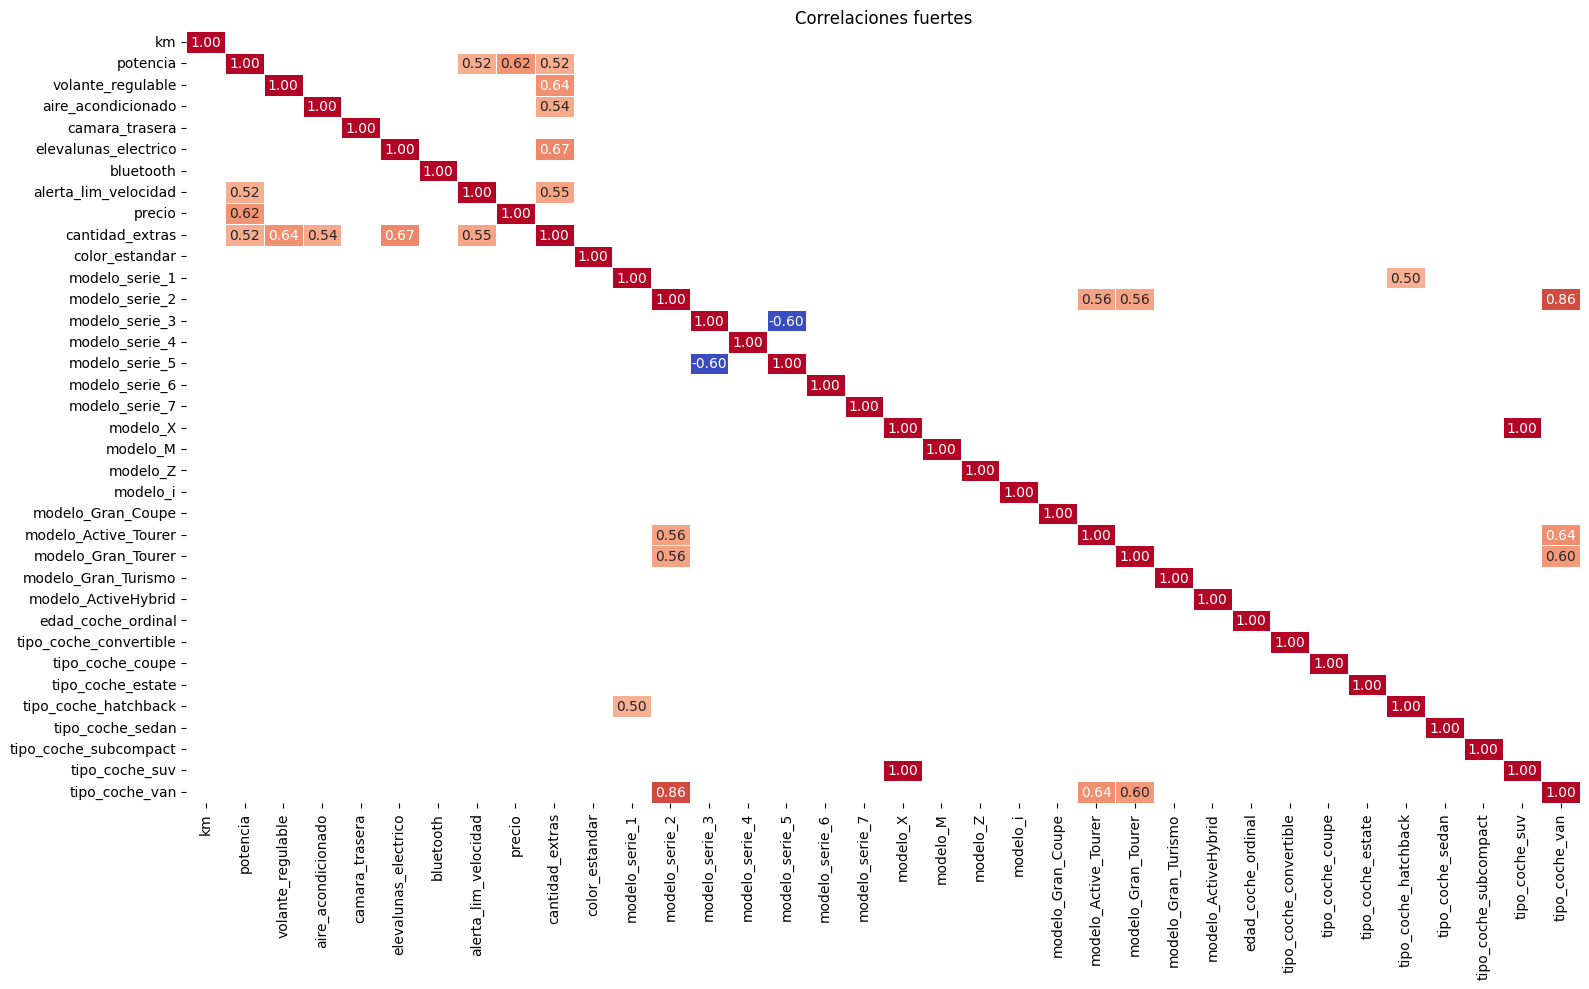

In [176]:
# Calculamos la matriz de correlación
corr = df_bmw.corr(numeric_only=True)

# Creamos una máscara para quedarnos con correlaciones fuertes (>|0.5|)
mask = np.abs(corr) > 0.5
filtered_corr = corr[mask]

# Visualizamos la matriz de correlación con un mapa de calor, filtrando las correlaciones fuertes
plt.figure(figsize=(16, 10))
sns.heatmap(filtered_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, cbar=False)
plt.title("Correlaciones fuertes")
plt.tight_layout()
plt.savefig("correlaciones.png", dpi=300) # Guardamos la figura para GitHub
plt.show()

In [177]:
# Eliminamos la columna tipo_coche_suv debido a su alta correlación con la columna modelo_X
df_bmw.drop(columns='tipo_coche_suv', inplace=True)

# Verificamos que la columna ha sido eliminada correctamente
comprobar_columna_eliminada(df_bmw, 'tipo_coche_suv')

La columna 'tipo_coche_suv' ha sido eliminada correctamente.


## **08 - DATASET FINAL**

### **8.1 - INFO()**

In [178]:
# Extraemos la información del DataFrame a un archivo de texto
with open("info_completo.txt", "w") as f:
    df_bmw.info(verbose=True, max_cols=None, buf=f)

In [179]:
# Visualizamos la información del DataFrame final
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3841 entries, 0 to 3852
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   km                      3841 non-null   float64
 1   potencia                3841 non-null   float64
 2   volante_regulable       3841 non-null   int64  
 3   aire_acondicionado      3841 non-null   int64  
 4   camara_trasera          3841 non-null   int64  
 5   elevalunas_electrico    3841 non-null   int64  
 6   bluetooth               3841 non-null   int64  
 7   alerta_lim_velocidad    3841 non-null   int64  
 8   precio                  3841 non-null   float64
 9   cantidad_extras         3841 non-null   float64
 10  color_estandar          3841 non-null   int64  
 11  modelo_serie_1          3841 non-null   int64  
 12  modelo_serie_2          3841 non-null   int64  
 13  modelo_serie_3          3841 non-null   int64  
 14  modelo_serie_4          3841 non-null   int64

### **8.2 - EXPORTACIÓN DE PRIMERAS 50 FILAS A EXCEL**

In [180]:
# Seleccionamos las primeras 50 filas del DataFrame
df_bmw_50 = df_bmw.head(50)

In [181]:
# Guardamos el DataFrame con las primeras 50 filas en un archivo Excel
df_bmw_50.to_excel('/Users/davidlarre/Desktop/PROYECTOS/M10 - ENTREGABLES/ENTREGABLE 1/data/processed/E01_G04_bmw_50_filas.xlsx')